In [2]:
library(Signac)
library(Seurat)
library(GenomeInfoDb)
library(EnsDb.Hsapiens.v86)
library(ggplot2)
library(patchwork)
library(BSgenome.Hsapiens.UCSC.hg38)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.4.1 but the current version is
4.4.2; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, 

In [59]:
plan('multicore')

Warning message in getCGroupsRoot(controller = controller):
"Mixed CGroups versions are not supported: 'cgroup2', 'cgroup'"


In [70]:
library(Signac)

In [991]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-conda-linux-gnu
Running under: Ubuntu 20.04.4 LTS

Matrix products: default
BLAS/LAPACK: /home/rgalimullina/miniconda3/envs/rozalina_is_the_best/lib/libopenblasp-r0.3.28.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Vienna
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggdendro_0.2.0                    plotly_4.10.4                    
 [3] svglite_2.1.3                     dplyr_1.1.4                      
 [5] ggrepel_0.9.6                     BSgenome.Hsapi

## Read and make objects with available human data containing both ATAC and RNA assays

In [177]:
# Read ATAC counts mstrix with  file path.
counts <- read.csv("GSM7384919_control_3_rpe_only_ATAC_normalized.csv", row.names = 1)
head(counts)

In [81]:
metadata=counts[,(1:2)]


In [86]:
counts=subset(counts, select = -c(1,2))

In [195]:
counts_matrix <- t(as.matrix(counts))


In [198]:
counts_matrix 

AAACCAACACAAAGGT-1_4 AAACGCGCACATTGCA-1_4
chr1.180606.181661         0                    0.000000            
chr1.186532.187426         0                    0.000000            
chr1.191042.191932         0                    0.000000            
chr1.267559.268459         0                    0.000000            
chr1.778221.779310         0                    2.989006            
chr1.816780.817769         0                    0.000000            
chr1.818559.819443         0                    0.000000            
chr1.822738.823751         0                    0.000000            
chr1.827045.827977         0                    0.000000            
chr1.869462.870443         0                    0.000000            
chr1.876462.877264         0                    0.000000            
chr1.878577.879752         0                    0.000000            
chr1.890414.891303         0                    0.000000            
chr1.904278.905195         0                    0.000000            
chr1.906143.906976         0                    0.000000            
chr1.909803.910883         0                    0.000000            
chr1.913251.914213         0                    0.000000            
chr1.920742.921704         0                    0.000000            
chr1.923101.924466         0                    0.000000            
chr1.925423.925981         0                    0.000000            
chr1.933281.934163         0                    0.000000            
chr1.935292.936092         0                    0.000000            
chr1.937900.938770         0                    0.000000            
chr1.939892.940868         0                    0.000000            
chr1.941064.942371         0                    0.000000            
chr1.958590.959922         0                    0.000000            
chr1.960273.961132         0                    0.000000            
chr1.966192.967589         0                    0.000000            
chr1.975775.976721         0                    0.000000            
chr1.983757.984808         0                    0.000000            
⋮                          ⋮                    ⋮                   
chrY.56863000.56863894     0                    0                   
chrY.56869554.56870358     0                    0                   
chrY.56870658.56871865     0                    0                   
chrY.56873489.56874360     0                    0                   
chrY.56879441.56880757     0                    0                   
chrY.56881239.56882079     0                    0                   
chrY.56885137.56886147     0                    0                   
chrY.56886578.56887526     0                    0                   
KI270711.1.7930.9505       0                    0                   
KI270713.1.4000.4924       0                    0                   
KI270713.1.16843.17683     0                    0                   
KI270713.1.21351.22434     0                    0                   
KI270713.1.25824.26871     0                    0                   
KI270713.1.28245.29063     0                    0                   
KI270713.1.29542.30548     0                    0                   
KI270713.1.31270.32197     0                    0                   
KI270713.1.32439.33719     0                    0                   
KI270713.1.34021.35044     0                    0                   
KI270727.1.2381.3290       0                    0                   
KI270727.1.52049.52982     0                    0                   
KI270728.1.232271.233207   0                    0                   
KI270728.1.1457798.1458869 0                    0                   
KI270728.1.1459563.1460436 0                    0                   
KI270728.1.1464733.1465197 0                    0                   
KI270728.1.1791214.1791993 0                    0                   
KI270728.1.1792007.1792703 0                    0                   
KI270734.1.116811.117745 

In [197]:
counts_matrix <- counts_matrix[!grepl("^GL", rownames(counts_matrix)), ]


In [199]:
counts_matrix <- counts_matrix[!grepl("^KI", rownames(counts_matrix)), ]

In [191]:
granges(atac_obj_10)

GRanges object with 175363 ranges and 0 metadata columns:
           seqnames        ranges strand
              <Rle>     <IRanges>  <Rle>
       [1]     chr1    9762-10683      *
       [2]     chr1 104534-105431      *
       [3]     chr1 180528-181778      *
       [4]     chr1 190953-191935      *
       [5]     chr1 267558-268590      *
       ...      ...           ...    ...
  [175359] KI270734      1-120993      *
  [175360] KI270734      1-163719      *
  [175361] KI270721        1-2082      *
  [175362] KI270726       1-41514      *
  [175363] KI270731        1-4507      *
  -------
  seqinfo: 32 sequences from an unspecified genome; no seqlengths

In [206]:
head(colnames(counts_matrix))

[1] "AAACCAACACAAAGGT-1" "AAACGCGCACATTGCA-1" "AAACGGATCACGAATC-1"
[4] "AAACGGATCCATCAGG-1" "AAAGCACCAAATACCT-1" "AAAGCCCGTTCACTGT-1"

In [207]:
# Also update the metadata row names if needed
rownames(metadata) <- new_names

In [208]:
chrom_assay <- CreateChromatinAssay(
  counts = counts_matrix,
  sep = c("\\.", "\\."),
  fragments = "GSM7384919_control_3_rpe_only_ATAC_atac_fragments.tsv.gz",
)


Computing hash



In [209]:

atac_obj_3 <- CreateSeuratObject(
  counts = chrom_assay,
  assay = "peaks",
  meta.data = metadata
)

In [210]:
atac_obj_3

An object of class Seurat 
221019 features across 471 samples within 1 assay 
Active assay: peaks (221019 features, 0 variable features)
 2 layers present: counts, data

In [211]:
saveRDS(atac_obj_3, "atac_obj_3.rds")

In [216]:
# Read RNA counts mstrix with  file path.
counts <- read.csv("GSM7384921_control_3_rpe_only_GEX_normalized.csv.gz", row.names = 1)
counts_rna=subset(counts_rna, select = -c(1,2))
counts_matrix_rna <- t(as.matrix(counts_rna))
head(counts_matrix_rna)

AAACCAACACAAAGGT-1_4 AAACGCGCACATTGCA-1_4 AAACGGATCACGAATC-1_4
MIR1302.2HG 0                    0                    0                   
FAM138A     0                    0                    0                   
OR4F5       0                    0                    0                   
AL627309.1  0                    0                    0                   
AL627309.3  0                    0                    0                   
AL627309.2  0                    0                    0                   
            AAACGGATCCATCAGG-1_4 AAAGCACCAAATACCT-1_4 AAAGCCCGTTCACTGT-1_4
MIR1302.2HG 0                    0                    0                   
FAM138A     0                    0                    0                   
OR4F5       0                    0                    0                   
AL627309.1  0                    0                    0                   
AL627309.3  0                    0                    0                   
AL627309.2  0                    0                    0                   
            AAAGGAGCACAGAAAC-1_4 AAAGGAGCAGGCATCT-1_4 AACAGGATCACAGACT-1_4
MIR1302.2HG 0                    0                    0                   
FAM138A     0                    0                    0                   
OR4F5       0                    0                    0                   
AL627309.1  0                    0                    0                   
AL627309.3  0                    0                    0                   
AL627309.2  0                    0                    0                   
            AACAGGATCCTCAGTC-1_4 ⋯ TTTAACCTCGAGGTGG-1_4 TTTAGCAAGCAATAGG-1_4
MIR1302.2HG 0                    ⋯ 0                    0                   
FAM138A     0                    ⋯ 0                    0                   
OR4F5       0                    ⋯ 0                    0                   
AL627309.1  0                    ⋯ 0                    0                   
AL627309.3  0                    ⋯ 0                    0                   
AL627309.2  0                    ⋯ 0                    0                   
            TTTAGCAAGGCTGGCT-1_4 TTTCCACCAACCCTCC-1_4 TTTCCGGGTACTTAGG-1_4
MIR1302.2HG 0                    0                    0                   
FAM138A     0                    0                    0                   
OR4F5       0                    0                    0                   
AL627309.1  0                    0                    0                   
AL627309.3  0                    0                    0                   
AL627309.2  0                    0                    0                   
            TTTCGTCCATCATGGC-1_4 TTTGAGTCAGTTTACG-1_4 TTTGGTGCAAACTCAT-1_4
MIR1302.2HG 0                    0                    0                   
FAM138A     0                    0                    0                   
OR4F5       0                    0                    0                   
AL627309.1  0                    0                    0                   
AL627309.3  0                    0                    0                   
AL627309.2  0                    0                    0                   
            TTTGTTGGTACTGATG-1_4 TTTGTTGGTCCTAAGA-1_4
MIR1302.2HG 0                    0                   
FAM138A     0                    0                   
OR4F5       0                    0                   
AL627309.1  0                    0                   
AL627309.3  0                    0                   
AL627309.2  0                    0

In [213]:

# Create an assay object with the normalized counts in the data slot.
rna_assay <- CreateAssayObject(data = counts_matrix_rna)


In [223]:
# Extract the cell names as a character vector
old_names <- colnames(rna_assay)

# Remove the last two characters from each cell name
new_names <- substr(old_names, 1, nchar(old_names) - 2)

# Update the Seurat object with the new cell names
colnames(rna_assay) <- new_names


In [224]:
atac_obj_3[['RNA']] <- rna_assay

Warning message:
"Layer counts isn't present in the assay object; returning NULL"


In [228]:
atac_obj_3

An object of class Seurat 
257620 features across 471 samples within 2 assays 
Active assay: peaks (221019 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: RNA

In [229]:
saveRDS(atac_obj_3, "atac_obj_3.rds")

In [ ]:
# Check that the metadata has been added
head(atac_obj@meta.data)

In [126]:
atac_obj_2=readRDS('atac_obj_2.rds')

In [127]:
# Extract the cell names as a character vector
old_names <- colnames(atac_obj_2)

# Remove the last two characters from each cell name
new_names <- substr(old_names, 1, nchar(old_names) - 2)

# Update the Seurat object with the new cell names
colnames(atac_obj_2) <- new_names

# Also update the metadata row names if needed
rownames(atac_obj_2@meta.data) <- new_names
## create fragment object
fragments <- CreateFragmentObject(
  path = 'GSM7384915_control_2_rpe_choroid_ATAC_atac_fragments.tsv.gz',
  cells = colnames(atac_obj_2)
)

## add fragments
Fragments(atac_obj_2) <- fragments

In [249]:
atac_obj_2

An object of class Seurat 
221041 features across 1749 samples within 1 assay 
Active assay: peaks (221041 features, 0 variable features)
 1 layer present: data

In [250]:
counts <- read.csv("GSM7384907_control_2_rpe_choroid_GEX_normalized.csv.gz", row.names = 1)
head(counts)

draft_celltype library               MIR1302.2HG FAM138A
AAACAGCCAGCAAATA-1_1 Endothelial    control_2_rpe_choroid 0           0      
AAACCAACAGCTAATT-1_1 Melanocyte     control_2_rpe_choroid 0           0      
AAACCAACATGTTTGG-1_1 Melanocyte     control_2_rpe_choroid 0           0      
AAACCGCGTCCCGGAA-1_1 Fibroblast     control_2_rpe_choroid 0           0      
AAACCGCGTTAGCATG-1_1 RPE            control_2_rpe_choroid 0           0      
AAACCGGCAGAAACGT-1_1 Fibroblast     control_2_rpe_choroid 0           0      
                     OR4F5 AL627309.1 AL627309.3 AL627309.2 AL627309.5
AAACAGCCAGCAAATA-1_1 0     0          0          0          0         
AAACCAACAGCTAATT-1_1 0     0          0          0          0         
AAACCAACATGTTTGG-1_1 0     0          0          0          0         
AAACCGCGTCCCGGAA-1_1 0     0          0          0          0         
AAACCGCGTTAGCATG-1_1 0     0          0          0          1         
AAACCGGCAGAAACGT-1_1 0     0          0          0          0         
                     AL627309.4 ⋯ AC133551.1 AC136612.1 AC136616.1 AC136616.3
AAACAGCCAGCAAATA-1_1 0          ⋯ 0          0          0          0         
AAACCAACAGCTAATT-1_1 0          ⋯ 0          0          0          0         
AAACCAACATGTTTGG-1_1 0          ⋯ 0          0          0          0         
AAACCGCGTCCCGGAA-1_1 0          ⋯ 0          0          0          0         
AAACCGCGTTAGCATG-1_1 0          ⋯ 0          0          0          0         
AAACCGGCAGAAACGT-1_1 0          ⋯ 0          0          0          0         
                     AC136616.2 AC141272.1 AC023491.2 AC007325.1 AC007325.4
AAACAGCCAGCAAATA-1_1 0          0          0          0          0         
AAACCAACAGCTAATT-1_1 0          0          0          0          0         
AAACCAACATGTTTGG-1_1 0          0          0          0          0         
AAACCGCGTCCCGGAA-1_1 0          0          0          0          0         
AAACCGCGTTAGCATG-1_1 0          0          0          0          0         
AAACCGGCAGAAACGT-1_1 0          0          0          0          0         
                     AC007325.2
AAACAGCCAGCAAATA-1_1 0         
AAACCAACAGCTAATT-1_1 0         
AAACCAACATGTTTGG-1_1 0         
AAACCGCGTCCCGGAA-1_1 0         
AAACCGCGTTAGCATG-1_1 0         
AAACCGGCAGAAACGT-1_1 0

In [251]:
counts_rna=subset(counts, select = -c(1,2))
counts_matrix_rna <- t(as.matrix(counts_rna))
# Create an assay object with the normalized counts in the data slot.
rna_assay <- CreateAssayObject(data = counts_matrix_rna)
# Extract the cell names as a character vector
old_names <- colnames(rna_assay)

# Remove the last two characters from each cell name
new_names <- substr(old_names, 1, nchar(old_names) - 2)

# Update the Seurat object with the new cell names
colnames(rna_assay) <- new_names


In [252]:
atac_obj_2[['RNA']] <- rna_assay

Warning message:
"Layer counts isn't present in the assay object; returning NULL"


In [253]:
atac_obj_2

An object of class Seurat 
257642 features across 1749 samples within 2 assays 
Active assay: peaks (221041 features, 0 variable features)
 1 layer present: data
 1 other assay present: RNA

In [254]:
saveRDS(atac_obj_2, 'atac_obj_2.rds')

In [142]:
atac_obj_9=readRDS('atac_obj_9.rds')


In [143]:
head(colnames(atac_obj_9))

[1] "AAACAGCCAGTAAGTA-1_2" "AAACAGCCATCCTGAA-1_2" "AAACATGCAAGGTCCT-1_2"
[4] "AAACATGCAAGTCGCT-1_2" "AAACATGCAGCAAGTG-1_2" "AAACATGCATAGCTGC-1_2"

In [144]:
# Extract the cell names as a character vector
old_names <- colnames(atac_obj_9)

# Remove the last two characters from each cell name
new_names <- substr(old_names, 1, nchar(old_names) - 2)

# Update the Seurat object with the new cell names
colnames(atac_obj_9) <- new_names

# Also update the metadata row names if needed
rownames(atac_obj_9@meta.data) <- new_names

In [146]:

## create fragment object
fragments <- CreateFragmentObject(
  path = 'GSM7384911_control_9_retina_ATAC_atac_fragments.tsv.gz',
  cells = colnames(atac_obj_9)
)

## add fragments
Fragments(atac_obj_9) <- fragments

Computing hash



In [234]:
counts <- read.csv("GSM7384903_control_9_retina_GEX_normalized.csv.gz", row.names = 1)
head(counts)

draft_celltype library          MIR1302.2HG FAM138A OR4F5
AAACAGCCAGTAAGTA-1_2 NA             control_9_retina 0           0       0    
AAACAGCCATCCTGAA-1_2 Muller         control_9_retina 0           0       0    
AAACATGCAAGGTCCT-1_2 Muller         control_9_retina 0           0       0    
AAACATGCAAGTCGCT-1_2 Rod            control_9_retina 0           0       0    
AAACATGCAGCAAGTG-1_2 Muller         control_9_retina 0           0       0    
AAACATGCATAGCTGC-1_2 Rod            control_9_retina 0           0       0    
                     AL627309.1 AL627309.3 AL627309.2 AL627309.5 AL627309.4 ⋯
AAACAGCCAGTAAGTA-1_2 0          0          0          0          0          ⋯
AAACAGCCATCCTGAA-1_2 0          0          0          0          0          ⋯
AAACATGCAAGGTCCT-1_2 0          0          0          0          0          ⋯
AAACATGCAAGTCGCT-1_2 0          0          0          0          0          ⋯
AAACATGCAGCAAGTG-1_2 0          0          0          0          0          ⋯
AAACATGCATAGCTGC-1_2 0          0          0          0          0          ⋯
                     AC133551.1 AC136612.1 AC136616.1 AC136616.3 AC136616.2
AAACAGCCAGTAAGTA-1_2 0          0          0          0          0         
AAACAGCCATCCTGAA-1_2 0          0          0          0          0         
AAACATGCAAGGTCCT-1_2 0          0          0          0          0         
AAACATGCAAGTCGCT-1_2 0          0          0          0          0         
AAACATGCAGCAAGTG-1_2 0          0          0          0          0         
AAACATGCATAGCTGC-1_2 0          0          0          0          0         
                     AC141272.1 AC023491.2 AC007325.1 AC007325.4 AC007325.2
AAACAGCCAGTAAGTA-1_2 0          0          0          0          0         
AAACAGCCATCCTGAA-1_2 0          0          0          0          0         
AAACATGCAAGGTCCT-1_2 0          0          0          0          0         
AAACATGCAAGTCGCT-1_2 0          0          0          0          0         
AAACATGCAGCAAGTG-1_2 0          0          0          0          0         
AAACATGCATAGCTGC-1_2 0          0          0          0          0

In [235]:
counts_rna=subset(counts, select = -c(1,2))
counts_matrix_rna <- t(as.matrix(counts_rna))
# Create an assay object with the normalized counts in the data slot.
rna_assay <- CreateAssayObject(data = counts_matrix_rna)

In [236]:
# Extract the cell names as a character vector
old_names <- colnames(rna_assay)

# Remove the last two characters from each cell name
new_names <- substr(old_names, 1, nchar(old_names) - 2)

# Update the Seurat object with the new cell names
colnames(rna_assay) <- new_names


In [237]:
atac_obj_9[['RNA']] <- rna_assay

Warning message:
"Layer counts isn't present in the assay object; returning NULL"


In [243]:
saveRDS(atac_obj_9, 'atac_obj_9.rds')

In [157]:
atac_obj_10=readRDS('atac_obj_10_retina.rds')

In [163]:
# Extract the cell names as a character vector
old_names <- colnames(atac_obj_10)

# Remove the last two characters from each cell name
new_names <- substr(old_names, 1, nchar(old_names) - 2)

# Update the Seurat object with the new cell names
colnames(atac_obj_10) <- new_names

# Also update the metadata row names if needed
rownames(atac_obj_10@meta.data) <- new_names


In [164]:
## create fragment object
fragments <- CreateFragmentObject(
  path = 'GSM7384912_control_10_retina_ATAC_atac_fragments.tsv.gz',
  cells = colnames(atac_obj_10)
)

## add fragments
Fragments(atac_obj_10) <- fragments

Computing hash



In [241]:
counts <- read.csv("GSM7384904_control_10_retina_GEX_normalized.csv.gz", row.names = 1)
head(counts)

draft_celltype library           MIR1302.2HG FAM138A OR4F5
AAACAGCCAAGACTCC-1_3 NA             control_10_retina 0           0       0    
AAACAGCCACTTGTTC-1_3 Muller         control_10_retina 0           0       0    
AAACAGCCATTGGGAG-1_3 Rod            control_10_retina 0           0       0    
AAACATGCACTAAGAA-1_3 Rod            control_10_retina 0           0       0    
AAACATGCAGAAATGC-1_3 Rod            control_10_retina 0           0       0    
AAACATGCATCATGTG-1_3 Rod            control_10_retina 0           0       0    
                     AL627309.1 AL627309.3 AL627309.2 AL627309.5 AL627309.4 ⋯
AAACAGCCAAGACTCC-1_3 0          0          0          0          0          ⋯
AAACAGCCACTTGTTC-1_3 0          0          0          0          0          ⋯
AAACAGCCATTGGGAG-1_3 0          0          0          0          0          ⋯
AAACATGCACTAAGAA-1_3 0          0          0          0          0          ⋯
AAACATGCAGAAATGC-1_3 0          0          0          0          0          ⋯
AAACATGCATCATGTG-1_3 0          0          0          0          0          ⋯
                     AC133551.1 AC136612.1 AC136616.1 AC136616.3 AC136616.2
AAACAGCCAAGACTCC-1_3 0          0          0          0          0         
AAACAGCCACTTGTTC-1_3 0          0          0          0          0         
AAACAGCCATTGGGAG-1_3 0          0          0          0          0         
AAACATGCACTAAGAA-1_3 0          0          0          0          0         
AAACATGCAGAAATGC-1_3 0          0          0          0          0         
AAACATGCATCATGTG-1_3 0          0          0          0          0         
                     AC141272.1 AC023491.2 AC007325.1 AC007325.4 AC007325.2
AAACAGCCAAGACTCC-1_3 0          0          0          0          0         
AAACAGCCACTTGTTC-1_3 0          0          0          0          0         
AAACAGCCATTGGGAG-1_3 0          0          0          0          0         
AAACATGCACTAAGAA-1_3 0          0          0          0          0         
AAACATGCAGAAATGC-1_3 0          0          0          0          0         
AAACATGCATCATGTG-1_3 0          0          0          0          0

In [242]:
counts_rna=subset(counts, select = -c(1,2))
counts_matrix_rna <- t(as.matrix(counts_rna))
# Create an assay object with the normalized counts in the data slot.
rna_assay <- CreateAssayObject(data = counts_matrix_rna)
# Extract the cell names as a character vector
old_names <- colnames(rna_assay)

# Remove the last two characters from each cell name
new_names <- substr(old_names, 1, nchar(old_names) - 2)

# Update the Seurat object with the new cell names
colnames(rna_assay) <- new_names


In [246]:
atac_obj_10[['RNA']] <- rna_assay

Warning message:
"Layer counts isn't present in the assay object; returning NULL"


In [247]:
atac_obj_10

An object of class Seurat 
211964 features across 9418 samples within 2 assays 
Active assay: peaks (175363 features, 0 variable features)
 1 layer present: data
 1 other assay present: RNA

In [248]:
saveRDS(atac_obj_10, "atac_obj_10_retina.rds")

In [166]:
##read rds object with ATAC-seq data
atac_obj_10rpe_ch=readRDS('atac_obj_10rpe_ch.rds')

In [167]:
## ADJUST THE CELL NAMES SO THEY MATCH WITH CELL NAMES in FRAGMENT FILE

# Extract the cell names as a character vector
old_names <- colnames(atac_obj_10rpe_ch)

# Remove the last two characters from each cell name
new_names <- substr(old_names, 1, nchar(old_names) - 2)

# Update the Seurat object with the new cell names
colnames(atac_obj_10rpe_ch) <- new_names

# Also update the metadata row names if needed
rownames(atac_obj_10rpe_ch@meta.data) <- new_names


In [168]:
## create fragment object
fragments <- CreateFragmentObject(
  path = 'GSM7384917_control_10_rpe_choroid_ATAC_atac_fragments.tsv.gz',
  cells = colnames(atac_obj_10rpe_ch)
)

## add fragments
Fragments(atac_obj_10rpe_ch) <- fragments

Computing hash



In [255]:
# read gene expression counts
counts <- read.csv("GSM7384909_control_10_rpe_choroid_GEX_normalized.csv.gz", row.names = 1)
head(counts)

draft_celltype library                MIR1302.2HG FAM138A
AAACAGCCAGGAACTG-1_7 RPE            control_10_rpe_choroid 0           0      
AAACCGAAGCAACATC-1_7 Fibroblast     control_10_rpe_choroid 0           0      
AAACCGAAGTAAGTGG-1_7 Melanocyte     control_10_rpe_choroid 0           0      
AAACCGCGTATTCGTC-1_7 Mast           control_10_rpe_choroid 0           0      
AAACCGGCACAACAAA-1_7 Melanocyte     control_10_rpe_choroid 0           0      
AAACCGGCAGCCAGAA-1_7 Melanocyte     control_10_rpe_choroid 0           0      
                     OR4F5 AL627309.1 AL627309.3 AL627309.2 AL627309.5
AAACAGCCAGGAACTG-1_7 0     0          0          0          0         
AAACCGAAGCAACATC-1_7 0     0          0          0          0         
AAACCGAAGTAAGTGG-1_7 0     0          0          0          0         
AAACCGCGTATTCGTC-1_7 0     0          0          0          0         
AAACCGGCACAACAAA-1_7 0     0          0          0          0         
AAACCGGCAGCCAGAA-1_7 0     0          0          0          0         
                     AL627309.4 ⋯ AC133551.1 AC136612.1 AC136616.1 AC136616.3
AAACAGCCAGGAACTG-1_7 0          ⋯ 0          0          0          0         
AAACCGAAGCAACATC-1_7 0          ⋯ 0          0          0          0         
AAACCGAAGTAAGTGG-1_7 0          ⋯ 0          0          0          0         
AAACCGCGTATTCGTC-1_7 0          ⋯ 0          0          0          0         
AAACCGGCACAACAAA-1_7 0          ⋯ 0          0          0          0         
AAACCGGCAGCCAGAA-1_7 0          ⋯ 0          0          0          0         
                     AC136616.2 AC141272.1 AC023491.2 AC007325.1 AC007325.4
AAACAGCCAGGAACTG-1_7 0          0          0          0          0         
AAACCGAAGCAACATC-1_7 0          0          0          0          0         
AAACCGAAGTAAGTGG-1_7 0          0          0          0          0         
AAACCGCGTATTCGTC-1_7 0          0          0          0          0         
AAACCGGCACAACAAA-1_7 0          0          0          0          0         
AAACCGGCAGCCAGAA-1_7 0          0          0          0          0         
                     AC007325.2
AAACAGCCAGGAACTG-1_7 0         
AAACCGAAGCAACATC-1_7 0         
AAACCGAAGTAAGTGG-1_7 0         
AAACCGCGTATTCGTC-1_7 0         
AAACCGGCACAACAAA-1_7 0         
AAACCGGCAGCCAGAA-1_7 0

In [256]:
## ADJUST THE CELL NAMES SO THEY MATCH WITH CELL NAMES in FRAGMENT FILE

counts_rna=subset(counts, select = -c(1,2))
counts_matrix_rna <- t(as.matrix(counts_rna))
# Create an assay object with the normalized counts in the data slot.
rna_assay <- CreateAssayObject(data = counts_matrix_rna)
# Extract the cell names as a character vector
old_names <- colnames(rna_assay)

# Remove the last two characters from each cell name
new_names <- substr(old_names, 1, nchar(old_names) - 2)

# Update the Seurat object with the new cell names
colnames(rna_assay) <- new_names

In [258]:
atac_obj_10rpe_ch[['RNA']] <- rna_assay

Warning message:
"Layer counts isn't present in the assay object; returning NULL"


In [259]:
saveRDS(atac_obj_10rpe_ch, "atac_obj_10rpe_ch.rds")

In [169]:
atac_obj_9rpe_ch=readRDS('atac_obj_9rpe_ch.rds')

In [170]:
# Extract the cell names as a character vector
old_names <- colnames(atac_obj_9rpe_ch)

# Remove the last two characters from each cell name
new_names <- substr(old_names, 1, nchar(old_names) - 2)

# Update the Seurat object with the new cell names
colnames(atac_obj_9rpe_ch) <- new_names

# Also update the metadata row names if needed
rownames(atac_obj_9rpe_ch@meta.data) <- new_names

In [171]:
## create fragment object
fragments <- CreateFragmentObject(
  path = 'GSM7384916_control_9_rpe_choroid_ATAC_atac_fragments.tsv.gz',
  cells = colnames(atac_obj_9rpe_ch)
)

## add fragments
Fragments(atac_obj_9rpe_ch) <- fragments

Computing hash



In [232]:
atac_obj_9rpe_ch

An object of class Seurat 
221041 features across 1147 samples within 1 assay 
Active assay: peaks (221041 features, 0 variable features)
 1 layer present: data

In [260]:
counts <- read.csv("GSM7384908_control_9_rpe_choroid_GEX_normalized.csv.gz", row.names = 1)
head(counts)

draft_celltype library               MIR1302.2HG FAM138A
AAACAGCCATGAGTTT-1_6 RPE            control_9_rpe_choroid 0           0      
AAACCAACACTATGGC-1_6 Fibroblast     control_9_rpe_choroid 0           0      
AAACCAACATTCCTCG-1_6 Melanocyte     control_9_rpe_choroid 0           0      
AAACCGAAGCGTGCGT-1_6 Fibroblast     control_9_rpe_choroid 0           0      
AAACCGCGTGTTTGCT-1_6 Melanocyte     control_9_rpe_choroid 0           0      
AAACGTACAGGTTAAA-1_6 Fibroblast     control_9_rpe_choroid 0           0      
                     OR4F5 AL627309.1 AL627309.3 AL627309.2 AL627309.5
AAACAGCCATGAGTTT-1_6 0     0          0          0          0         
AAACCAACACTATGGC-1_6 0     0          0          0          0         
AAACCAACATTCCTCG-1_6 0     0          0          0          0         
AAACCGAAGCGTGCGT-1_6 0     0          0          0          0         
AAACCGCGTGTTTGCT-1_6 0     0          0          0          0         
AAACGTACAGGTTAAA-1_6 0     0          0          0          0         
                     AL627309.4 ⋯ AC133551.1 AC136612.1 AC136616.1 AC136616.3
AAACAGCCATGAGTTT-1_6 0          ⋯ 0          0          0          0         
AAACCAACACTATGGC-1_6 0          ⋯ 0          0          0          0         
AAACCAACATTCCTCG-1_6 0          ⋯ 0          0          0          0         
AAACCGAAGCGTGCGT-1_6 0          ⋯ 0          0          0          0         
AAACCGCGTGTTTGCT-1_6 0          ⋯ 0          0          0          0         
AAACGTACAGGTTAAA-1_6 0          ⋯ 0          0          0          0         
                     AC136616.2 AC141272.1 AC023491.2 AC007325.1 AC007325.4
AAACAGCCATGAGTTT-1_6 0          0          0          0          0         
AAACCAACACTATGGC-1_6 0          0          0          0          0         
AAACCAACATTCCTCG-1_6 0          0          0          0          0         
AAACCGAAGCGTGCGT-1_6 0          0          0          0          0         
AAACCGCGTGTTTGCT-1_6 0          0          0          0          0         
AAACGTACAGGTTAAA-1_6 0          0          0          0          0         
                     AC007325.2
AAACAGCCATGAGTTT-1_6 0         
AAACCAACACTATGGC-1_6 0         
AAACCAACATTCCTCG-1_6 0         
AAACCGAAGCGTGCGT-1_6 1         
AAACCGCGTGTTTGCT-1_6 0         
AAACGTACAGGTTAAA-1_6 0

In [261]:
counts_rna=subset(counts, select = -c(1,2))
counts_matrix_rna <- t(as.matrix(counts_rna))
# Create an assay object with the normalized counts in the data slot.
rna_assay <- CreateAssayObject(data = counts_matrix_rna)
# Extract the cell names as a character vector
old_names <- colnames(rna_assay)

# Remove the last two characters from each cell name
new_names <- substr(old_names, 1, nchar(old_names) - 2)

# Update the Seurat object with the new cell names
colnames(rna_assay) <- new_names

In [262]:
atac_obj_9rpe_ch[['RNA']] <- rna_assay

Warning message:
"Layer counts isn't present in the assay object; returning NULL"


In [263]:
atac_obj_9rpe_ch

An object of class Seurat 
257642 features across 1147 samples within 2 assays 
Active assay: peaks (221041 features, 0 variable features)
 1 layer present: data
 1 other assay present: RNA

In [264]:
saveRDS(atac_obj_9rpe_ch,'atac_obj_9rpe_ch.rds')

In [275]:

#merge all objects containing normalized GEX, normalized atac-seq and fragment file
all_atac <- merge(atac_obj_3, y = c(atac_obj_2, atac_obj_10,atac_obj_9rpe_ch,atac_obj_9, atac_obj_10rpe_ch), project = "RPE_Melano",
    merge.data = TRUE)

Warning message:
"Some cell names are duplicated across objects provided. Renaming to enforce unique cell names."

Binding matrix rows


Binding matrix rows


Binding matrix rows


Binding matrix rows


Binding matrix rows


Binding matrix rows


Binding matrix rows



In [276]:
all_atac

An object of class Seurat 
334195 features across 21962 samples within 2 assays 
Active assay: peaks (297594 features, 0 variable features)
 1 layer present: data
 1 other assay present: RNA

In [277]:
saveRDS(all_atac, 'all_atac.rds')

In [5]:
all_atac=readRDS( 'all_atac.rds')

In [6]:
all_atac

An object of class Seurat 
334195 features across 21962 samples within 2 assays 
Active assay: peaks (297594 features, 0 variable features)
 1 layer present: data
 1 other assay present: RNA

In [7]:
# Check number of cells in metadata:
num_meta <- nrow(all_atac@meta.data)
cat("Number of cells in meta.data:", num_meta, "\n")

# Check number of columns in the counts matrix:
num_counts <- ncol(all_atac@assays$peaks@data)
cat("Number of columns in counts matrix:", num_counts, "\n")

# Compare cell names:
cells_meta <- rownames(all_atac@meta.data)
cells_counts <- colnames(all_atac@assays$peaks@data)

if (!all(cells_meta %in% cells_counts)) {
  warning("Some cells in meta.data are missing from the counts matrix!")
}
if (!all(cells_counts %in% cells_meta)) {
  warning("Some cells in the counts matrix are missing from meta.data!")
}


Number of cells in meta.data: 21962 
Number of columns in counts matrix: 21962 


In [8]:
# FILTER OUT THE CELLS THAT ARE NOT ANNOTATED 

# Identify cells with non-NA values in metadata
cells_to_keep <- rownames(all_atac@meta.data)[!is.na(all_atac@meta.data$draft_celltype)]

# Subset the Seurat object to include only these cells
all_atac <- subset(all_atac, cells = cells_to_keep)


In [10]:

# remove peaks on nonstandard chromosomes and in genomic blacklist regions
peaks <- keepStandardChromosomes(granges(all_atac), pruning.mode = "coarse")
peaks <- subsetByOverlaps(x = peaks, ranges = blacklist_hg38_unified, invert = TRUE)

In [11]:
# Convert to character vector in 'chr-start-end' format
rownames_format <- paste0(seqnames(peaks), "-", start(peaks), "-", end(peaks))
current_features <- rownames(all_atac[["peaks"]])
all_atac[["peaks"]] <- subset(all_atac[["peaks"]], features = rownames_format)

Warning message:
"Different cells and/or features from existing assay peaks"
Warning message:
"Layer counts isn't present in the assay object; returning NULL"


In [12]:
all_atac

An object of class Seurat 
333529 features across 16455 samples within 2 assays 
Active assay: peaks (296928 features, 0 variable features)
 1 layer present: data
 1 other assay present: RNA

In [13]:
# first compute the GC content for each peak
all_atac <- RegionStats(all_atac, genome = BSgenome.Hsapiens.UCSC.hg38)

Warning message in RegionStats.default(object = regions, genome = genome, verbose = verbose, :
"Not all seqlevels present in supplied genome"


In [15]:
# If the counts slot is empty, copy the normalized data to the counts slot(to find Variable Features)
if (is.null(all_atac@assays$peaks@counts) || ncol(all_atac@assays$peaks@counts) == 0) {
  all_atac@assays$peaks@counts <- all_atac@assays$peaks@data
}

all_atac <- FindTopFeatures(all_atac)
all_atac <- RunSVD(all_atac)
all_atac <- RunUMAP(object = all_atac, reduction = 'lsi', dims = 2:30)

Running SVD

Scaling cell embeddings

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
14:41:09 UMAP embedding parameters a = 0.9922 b = 1.112

14:41:09 Read 16455 rows and found 29 numeric columns

14:41:09 Using Annoy for neighbor search, n_neighbors = 30

14:41:09 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:41:11 Writing NN index file to temp file /tmp/RtmpXfxq4r/file23298763a27463

14:41:11 Searching Annoy index using 1 thread, search_k = 3000

14:41:16 Annoy recall = 100%

14:41:19 Commencing smooth kNN distance calibration 

In [16]:
library(ggrepel)

Warning message:
"ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


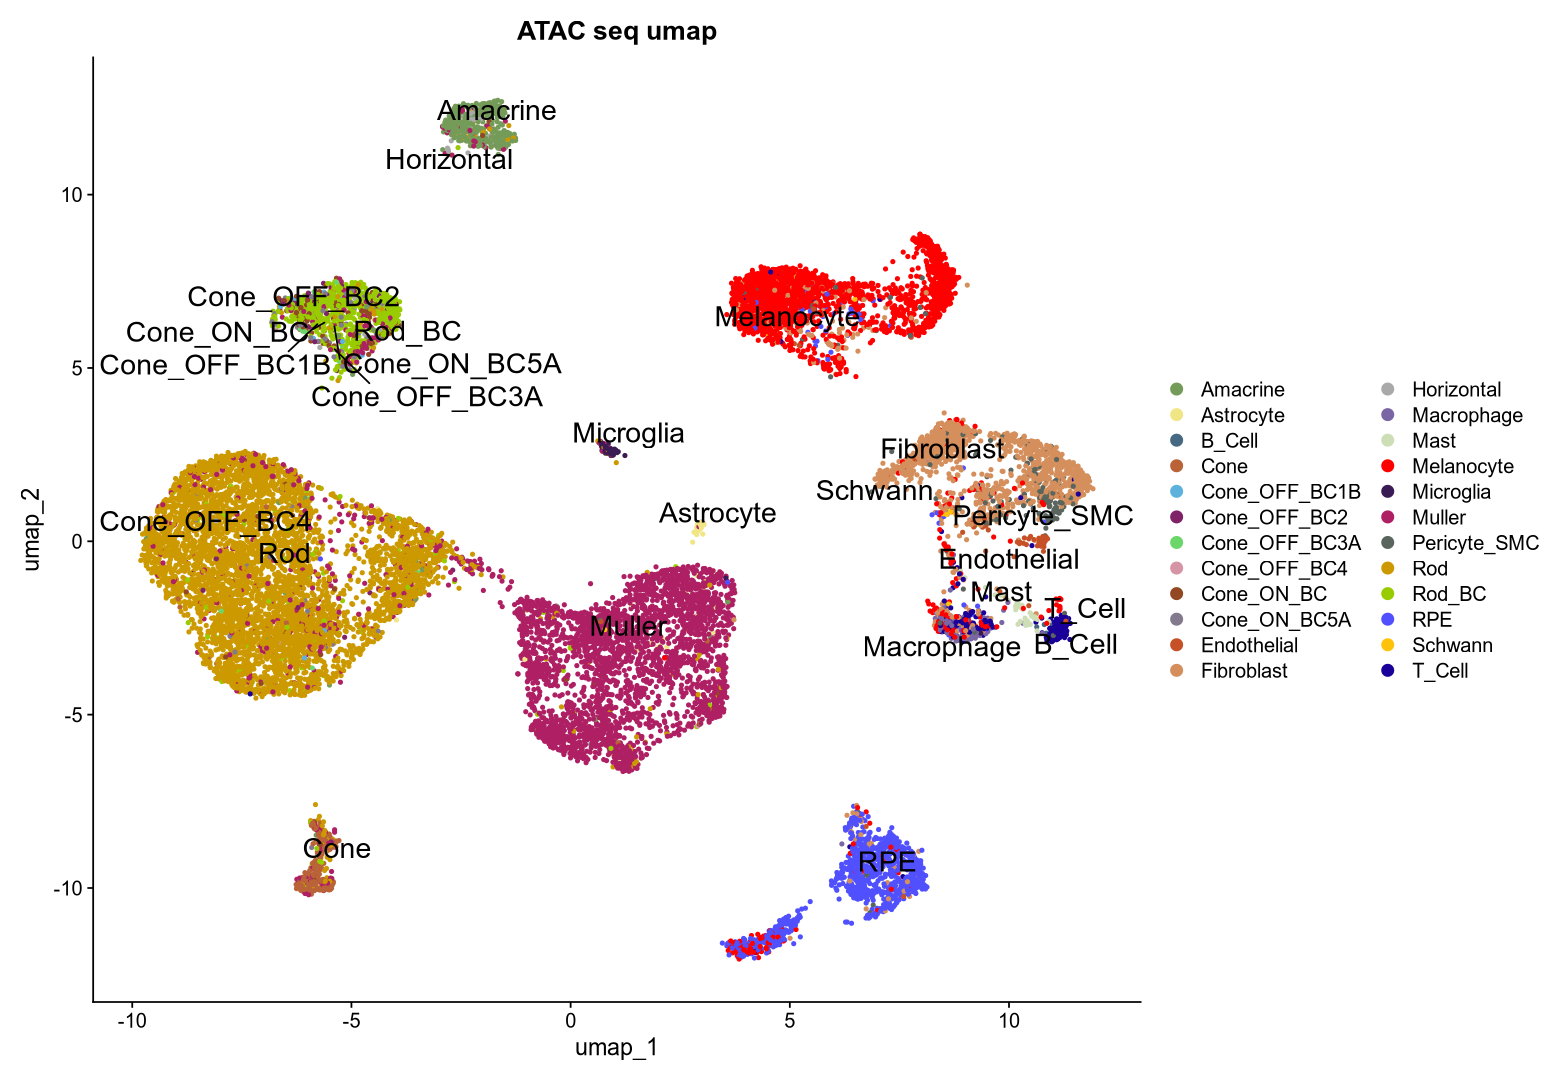

In [17]:
options(repr.plot.width=13, repr.plot.height=9)
DimPlot(all_atac, reduction = "umap",group.by = 'draft_celltype',cols=c('#749B58', '#F0E685',
                               '#466983', '#BA6338', '#5DB1DD', '#802268', '#6BD76B',
                               '#D595A7', '#924822', '#837B8D', '#C75127', '#D58F5C',
                               '#A9A9A9', '#7A65A5','#CDDEB7','Red', '#3B1B53', '#AE1F63',
                               '#5A655E','#CC9900', '#99CC00','#5050FF', '#FFC20A', '#1A0099'),
        label = T,pt.size = 0.8,repel=T, label.size=6)+ggtitle("ATAC seq umap")

In [483]:
all_atac

An object of class Seurat 
70896 features across 16455 samples within 2 assays 
Active assay: peaks (34295 features, 32581 variable features)
 2 layers present: counts, data
 1 other assay present: RNA
 4 dimensional reductions calculated: lsi, umap, harmony, umap.ATAC_harm

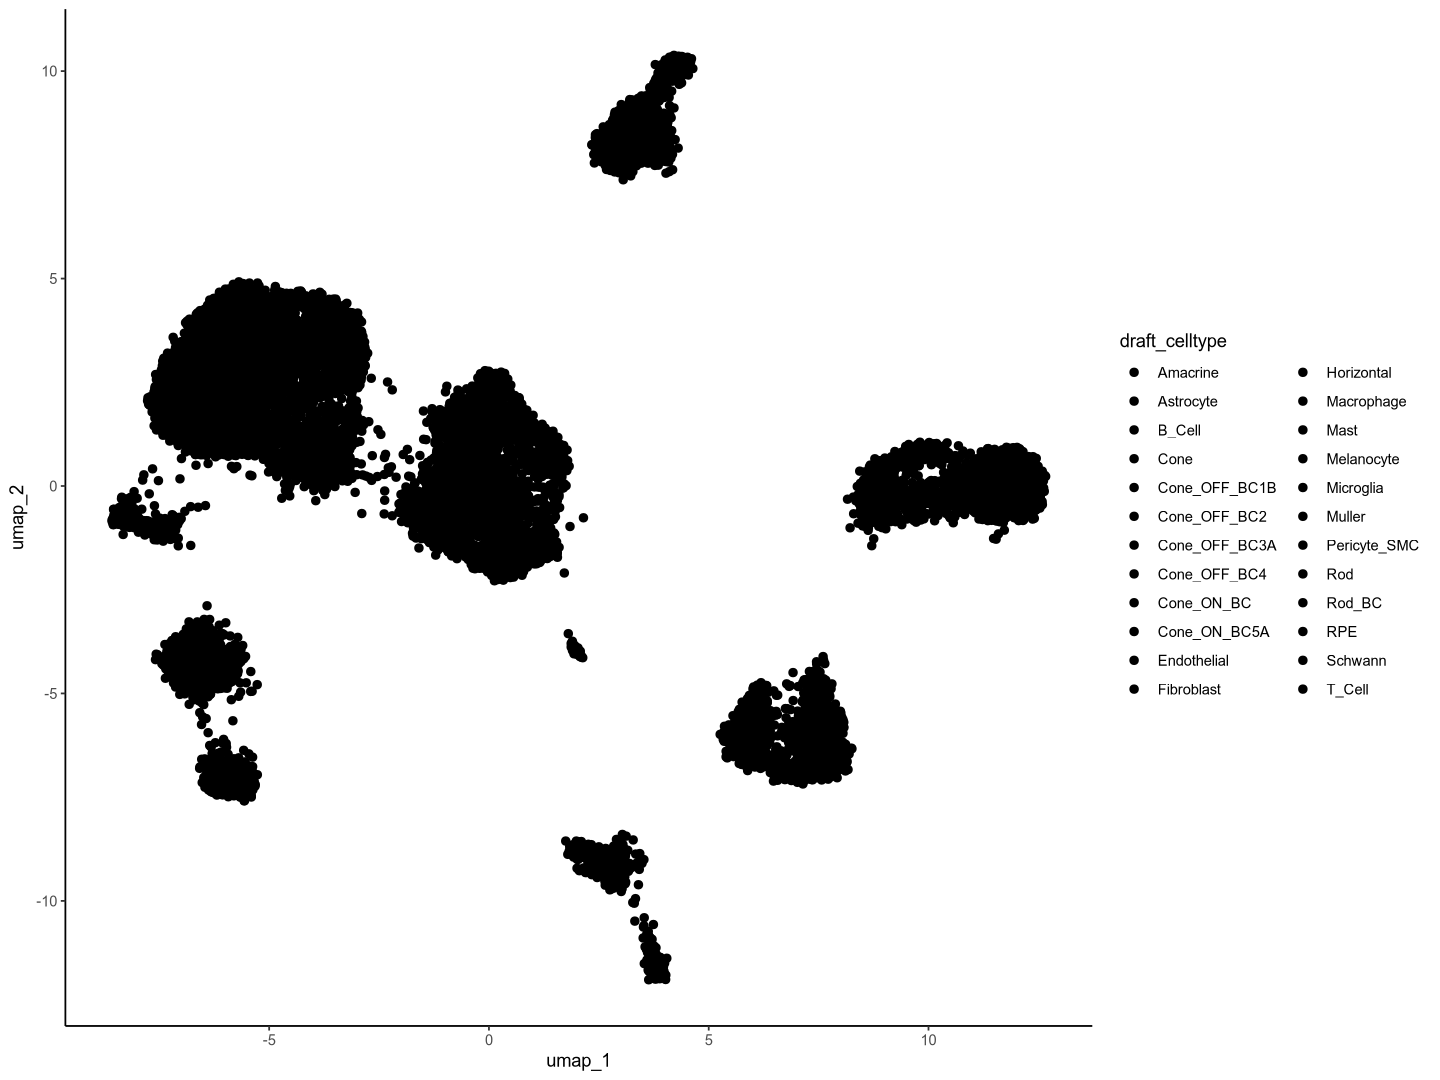

In [99]:
# get metadata
md <- all_atac[[]]

# get embeddings
coords <- Embeddings(all_atac[["umap"]])

# combine dataframes
md <- cbind(md, coords)

# plot
ggplot(md, aes(x = umap_1, y = umap_2, fill = draft_celltype)) +
  geom_point(size = 2) + theme_classic()

In [230]:
options(repr.plot.width=10, repr.plot.height=9)
gg1=ggplot(md, aes(x = umap_1, y = umap_2, fill = draft_celltype,color=draft_celltype, label = draft_celltype), label= TRUE) +
  geom_point(size = 1.2, alpha=0.5) + scale_color_manual(values=c('#4DAF4A33', '#984EA333', '#FF7F0033', '#FFFF3333', '#A6562833', '#F781BF33', '#99999933',
'#66C2A533', '#FC8D6233', '#8DA0CB33', '#E78AC333', '#A6D85433', '#FFD92F33', '#E5C49433',
'#B3B3B333', '#377EB8FF', '#8C510A33', '#DFC27D33', '#80CDC133', '#01857133', '#A6CEE333',
'#E41A1CFF', '#1F78B433', '#B2DF8A33')) + 
theme(axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        axis.ticks = element_blank(),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        rect = element_blank()) 


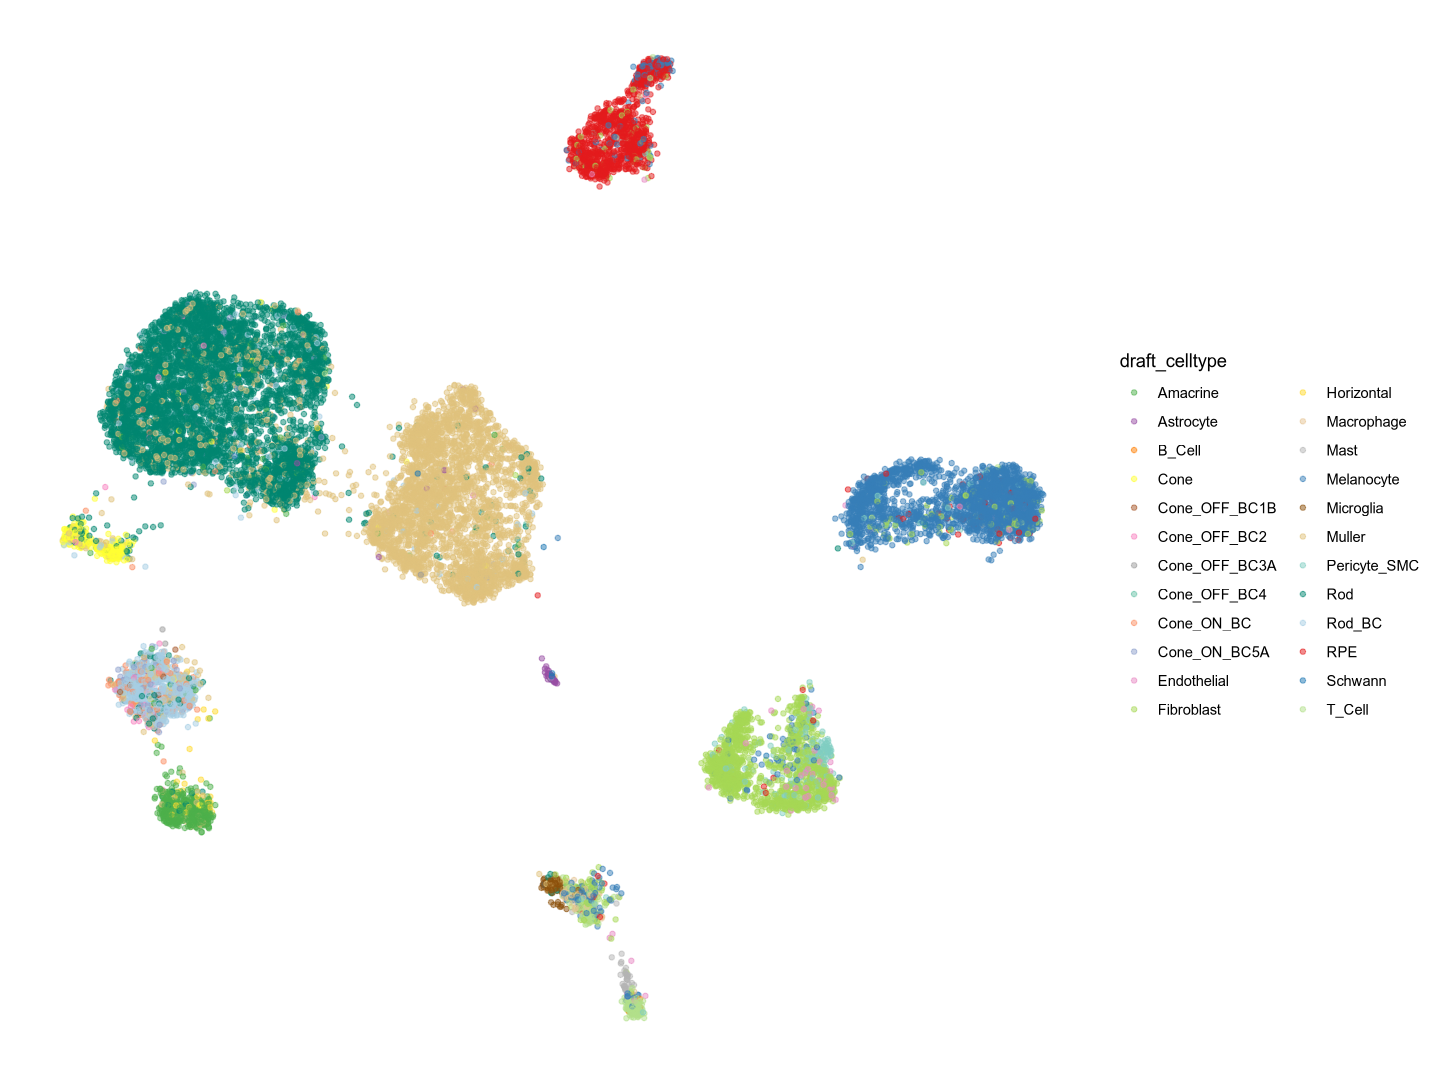

In [231]:
options(repr.plot.width=12, repr.plot.height=9)
gg1

In [102]:
library(svglite)


p=gg1 #whatever plot

svglite(filename = paste0('figures/general_atac_umap.svg'), # put your path and name of choice
            width = 6,height = 4,standalone = T,system_fonts = 'Arial',bg = 'transparent',scaling=0.6)    # here you define which font and size of pliot
plot(p) # plot your plot in the graphic device
dev.off() # close the graphic device and it saves your figure :-)

pdf 
  2

In [ ]:
library(svglite)


p=pos #whatever plot

svglite(filename = paste0('figures/cluster_annotation_labels_on.svg'), # put your path and name of choice
            width = 5,height = 4,standalone = T,system_fonts = 'Arial',bg = 'transparent',scaling=0.6)    # here you define which font and size of pliot
plot(p) # plot your plot in the graphic device
dev.off() # close the graphic device and it saves your figure :-)

In [351]:
all_atac@meta.data$library1=as.factor(all_atac@meta.data$library)

In [358]:
all_atac

An object of class Seurat 
333529 features across 16455 samples within 2 assays 
Active assay: peaks (296928 features, 282082 variable features)
 2 layers present: counts, data
 1 other assay present: RNA
 2 dimensional reductions calculated: lsi, umap

In [365]:
print(all_atac@reductions)

$lsi
A dimensional reduction object with key LSI_ 
 Number of dimensions: 50 
 Number of cells: 16455 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: peaks 

$umap
A dimensional reduction object with key umap_ 
 Number of dimensions: 2 
 Number of cells: 16455 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: peaks 



In [359]:
colnames(all_atac@meta.data)

[1] "orig.ident"     "nCount_peaks"   "nFeature_peaks" "draft_celltype"
[5] "library"        "library1"

#### filter for peaks that are present at least in 1 % of cells

In [ ]:
counts <- GetAssayData(all_atac, assay = "peaks", layer = "data")

In [ ]:


# Convert counts to binary (TRUE/FALSE) and then to numeric (1/0)
binary_counts <- counts > 0
peak_presence <- Matrix::rowSums(binary_counts)
min_cells <- round(0.01 * ncol(all_atac))
keep_peaks <- names(peak_presence)[peak_presence >= min_cells]
all_atac[["peaks"]] <- subset(all_atac[["peaks"]], features = keep_peaks)


Warning message:
"Different cells and/or features from existing assay peaks"


In [37]:
all_atac

An object of class Seurat 
70896 features across 16455 samples within 2 assays 
Active assay: peaks (34295 features, 34295 variable features)
 2 layers present: counts, data
 1 other assay present: RNA
 2 dimensional reductions calculated: lsi, umap

### continue with cell types visualization

In [38]:
## data was already TFIDF normalized
all_atac <- FindTopFeatures(all_atac)
all_atac <- RunSVD(all_atac)
all_atac <- RunUMAP(object = all_atac, reduction = 'lsi', dims = 2:30)

Running SVD

Scaling cell embeddings

14:56:58 UMAP embedding parameters a = 0.9922 b = 1.112

14:56:58 Read 16455 rows and found 29 numeric columns

14:56:58 Using Annoy for neighbor search, n_neighbors = 30

14:56:58 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:57:00 Writing NN index file to temp file /tmp/RtmpXfxq4r/file2329873fc031a5

14:57:01 Searching Annoy index using 1 thread, search_k = 3000

14:57:06 Annoy recall = 100%

14:57:09 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:57:13 Initializing from normalized Laplacian + noise (using RSpectra)

14:57:13 Commencing optimization for 200 epochs, with 682262 positive edges

14:57:25 Optimization finished



Warning message:
"ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


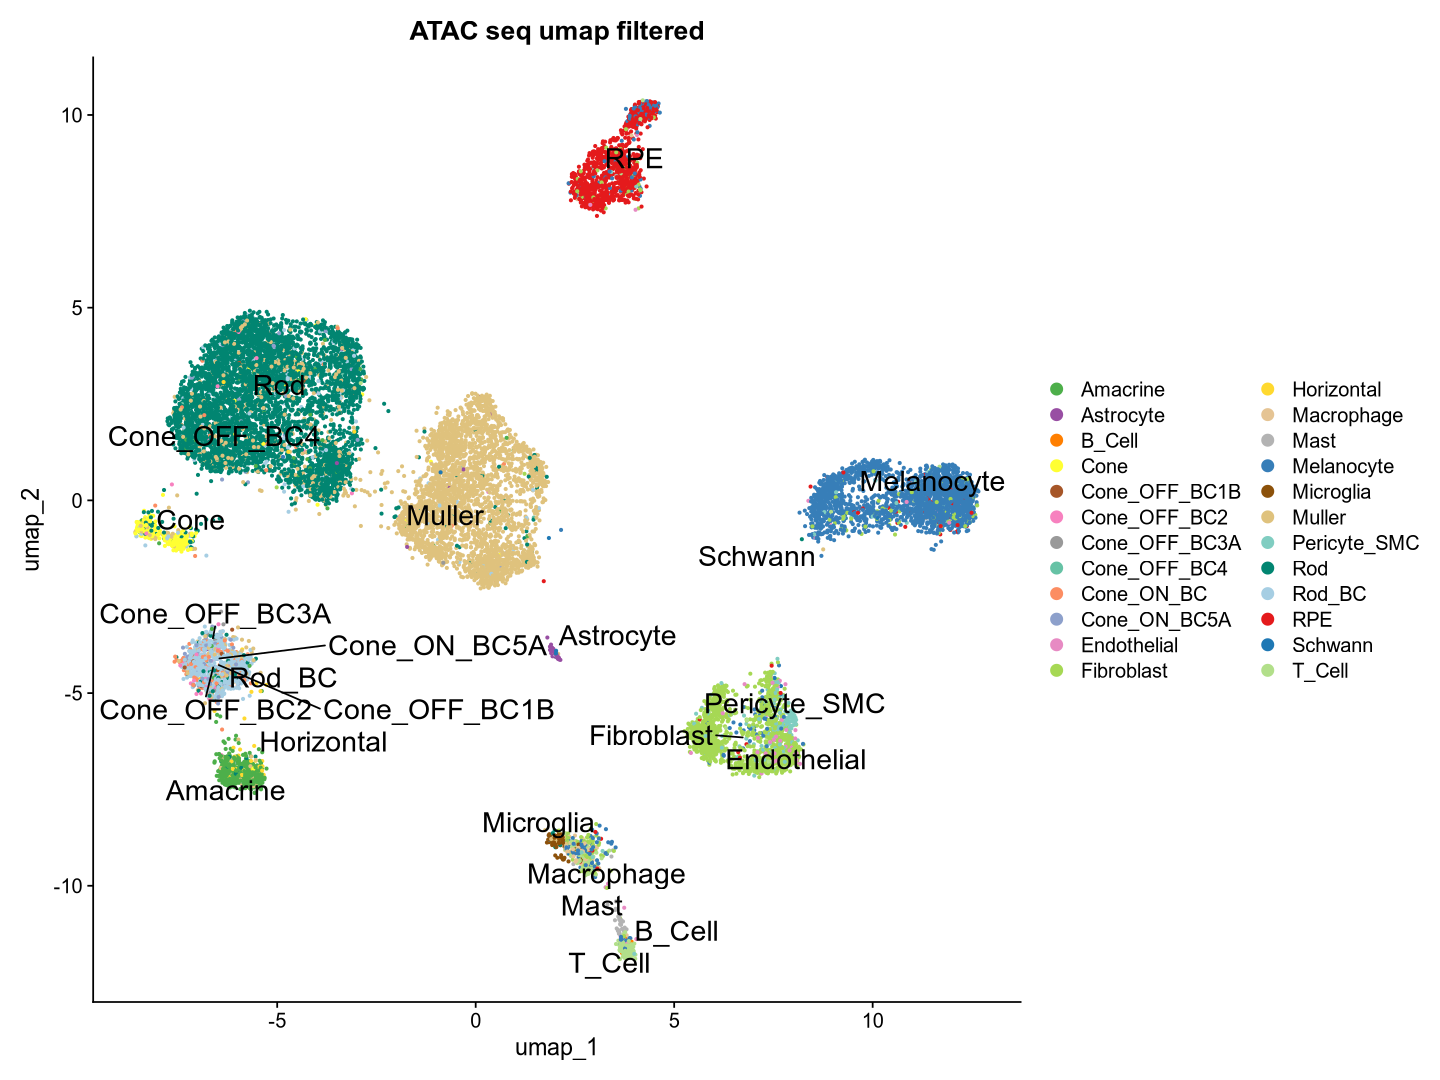

In [229]:
options(repr.plot.width=12, repr.plot.height=9)
DimPlot(all_atac, reduction = "umap",group.by = 'draft_celltype',label = T, repel = T,cols=c('#4DAF4A33', '#984EA333', '#FF7F0033', '#FFFF3333', '#A6562833', '#F781BF33', '#99999933',
'#66C2A533', '#FC8D6233', '#8DA0CB33', '#E78AC333', '#A6D85433', '#FFD92F33', '#E5C49433',
'#B3B3B333', '#377EB8FF', '#8C510A33', '#DFC27D33', '#80CDC133', '#01857133', '#A6CEE333',
'#E41A1CFF', '#1F78B433', '#B2DF8A33'),
        pt.size = 0.5, label.size=6)+ggtitle("ATAC seq umap filtered")

In [84]:
options(repr.plot.width=10, repr.plot.height=9)
library(ggplot2)
library(dplyr)

# Define the two cell types you want to highlight
highlighted_celltypes <- c("Melanocyte", "RPE")

# Extract UMAP embeddings with metadata
umap_data <- FetchData(all_atac, vars = c("umap_1", "umap_2", "draft_celltype"))

# Add a column to indicate if a cell belongs to the highlighted types
umap_data <- umap_data %>%
  mutate(highlight = ifelse(draft_celltype %in% highlighted_celltypes, draft_celltype, "Other"))

# Plot UMAP with highlighted cell types
highlight=ggplot(umap_data, aes(x = umap_1, y = umap_2, color = highlight)) +
  geom_point(alpha = 0.6, size = 1.5) +  # Adjust transparency and size
  scale_color_manual(values = c("Melanocyte" = "Blue", 
                                "RPE" = "Red", 
                                "Other" = "gray80")) +  # Gray for other cells
  theme_classic() +
  labs(title = "UMAP Highlighting Two Cell Types",
       color = "Cell Type") +
  theme(legend.position = "right")

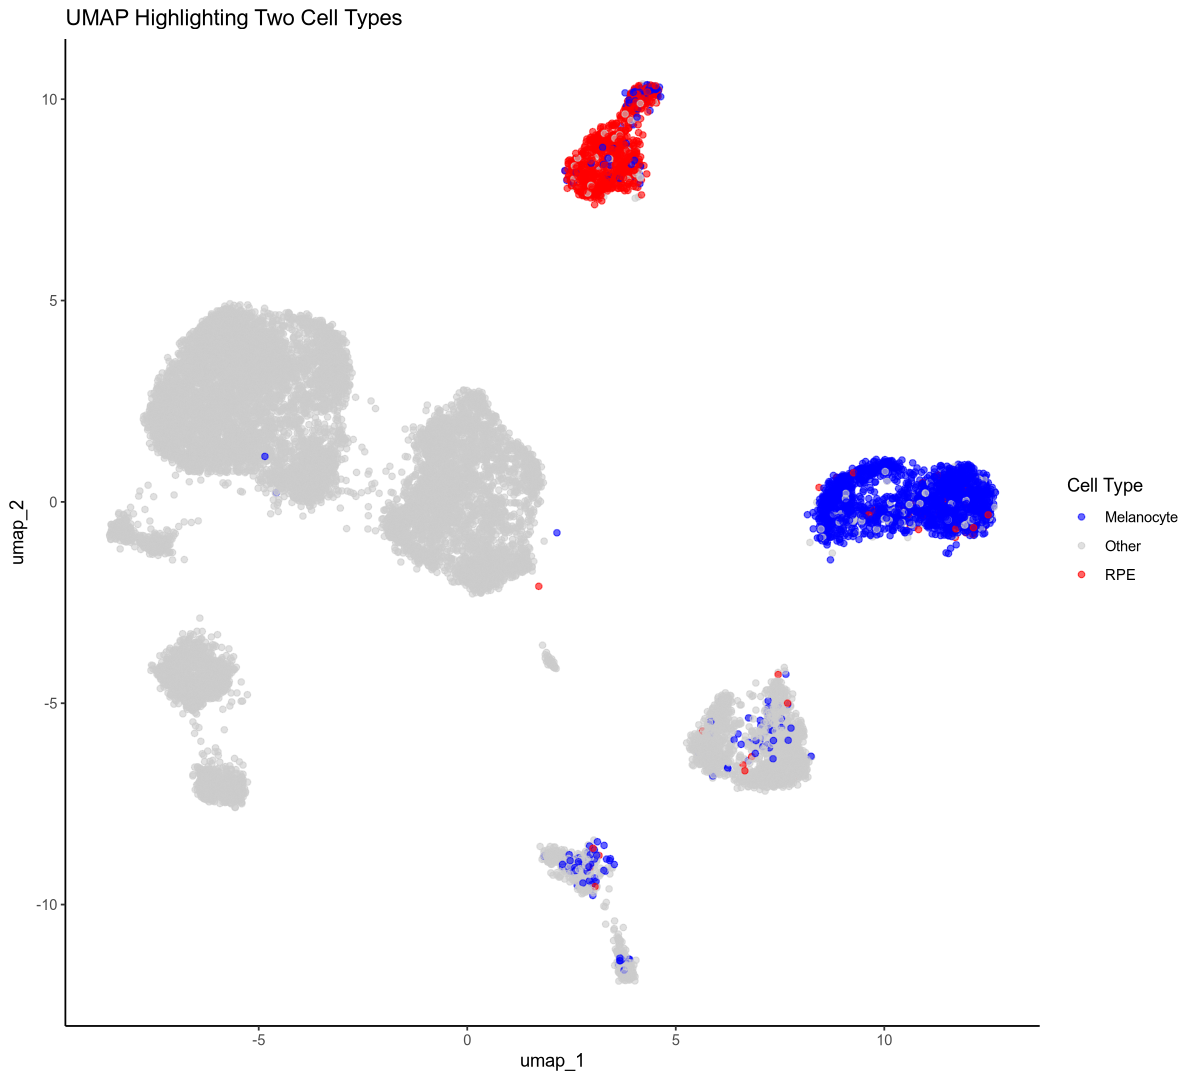

In [984]:
## Highlight exclusively Melnaocytes and RPE
highlight

In [85]:
library(svglite)


p=highlight #whatever plot

svglite(filename = paste0('figures/highlight.svg'), # put your path and name of choice
            width = 5,height = 4,standalone = T,system_fonts = 'Arial',bg = 'transparent',scaling=0.6)    # here you define which font and size of pliot
plot(p) # plot your plot in the graphic device
dev.off() # close the graphic device and it saves your figure :-)

pdf 
  2

In [41]:
all_atac <- FindNeighbors(object = all_atac, reduction = 'lsi', dims = 2:30)


Computing nearest neighbor graph

Computing SNN



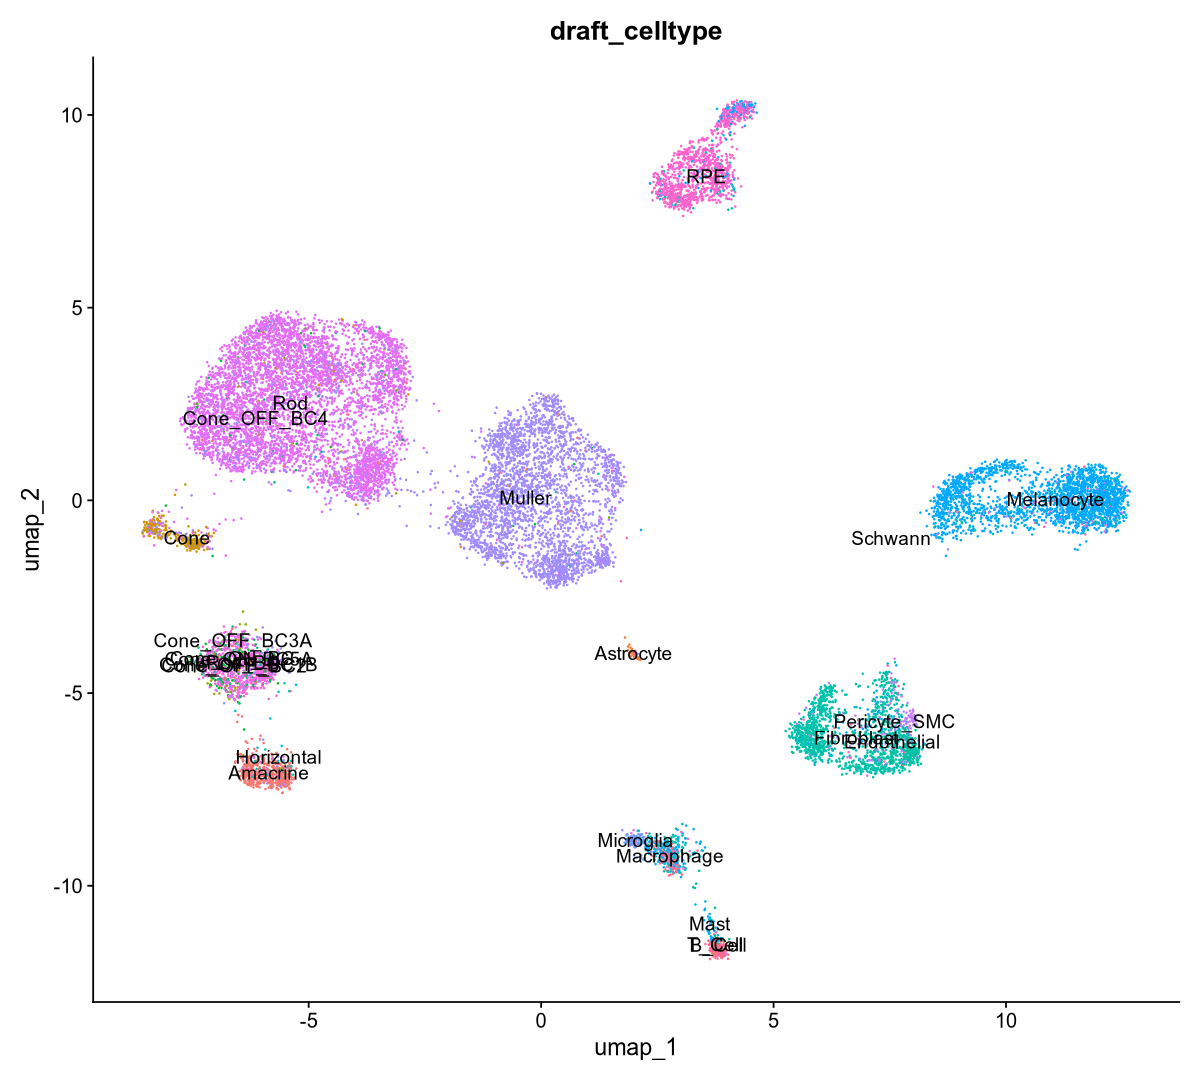

In [43]:
DimPlot(object = all_atac, label = TRUE, group.by='draft_celltype', cols=c()) + NoLegend()

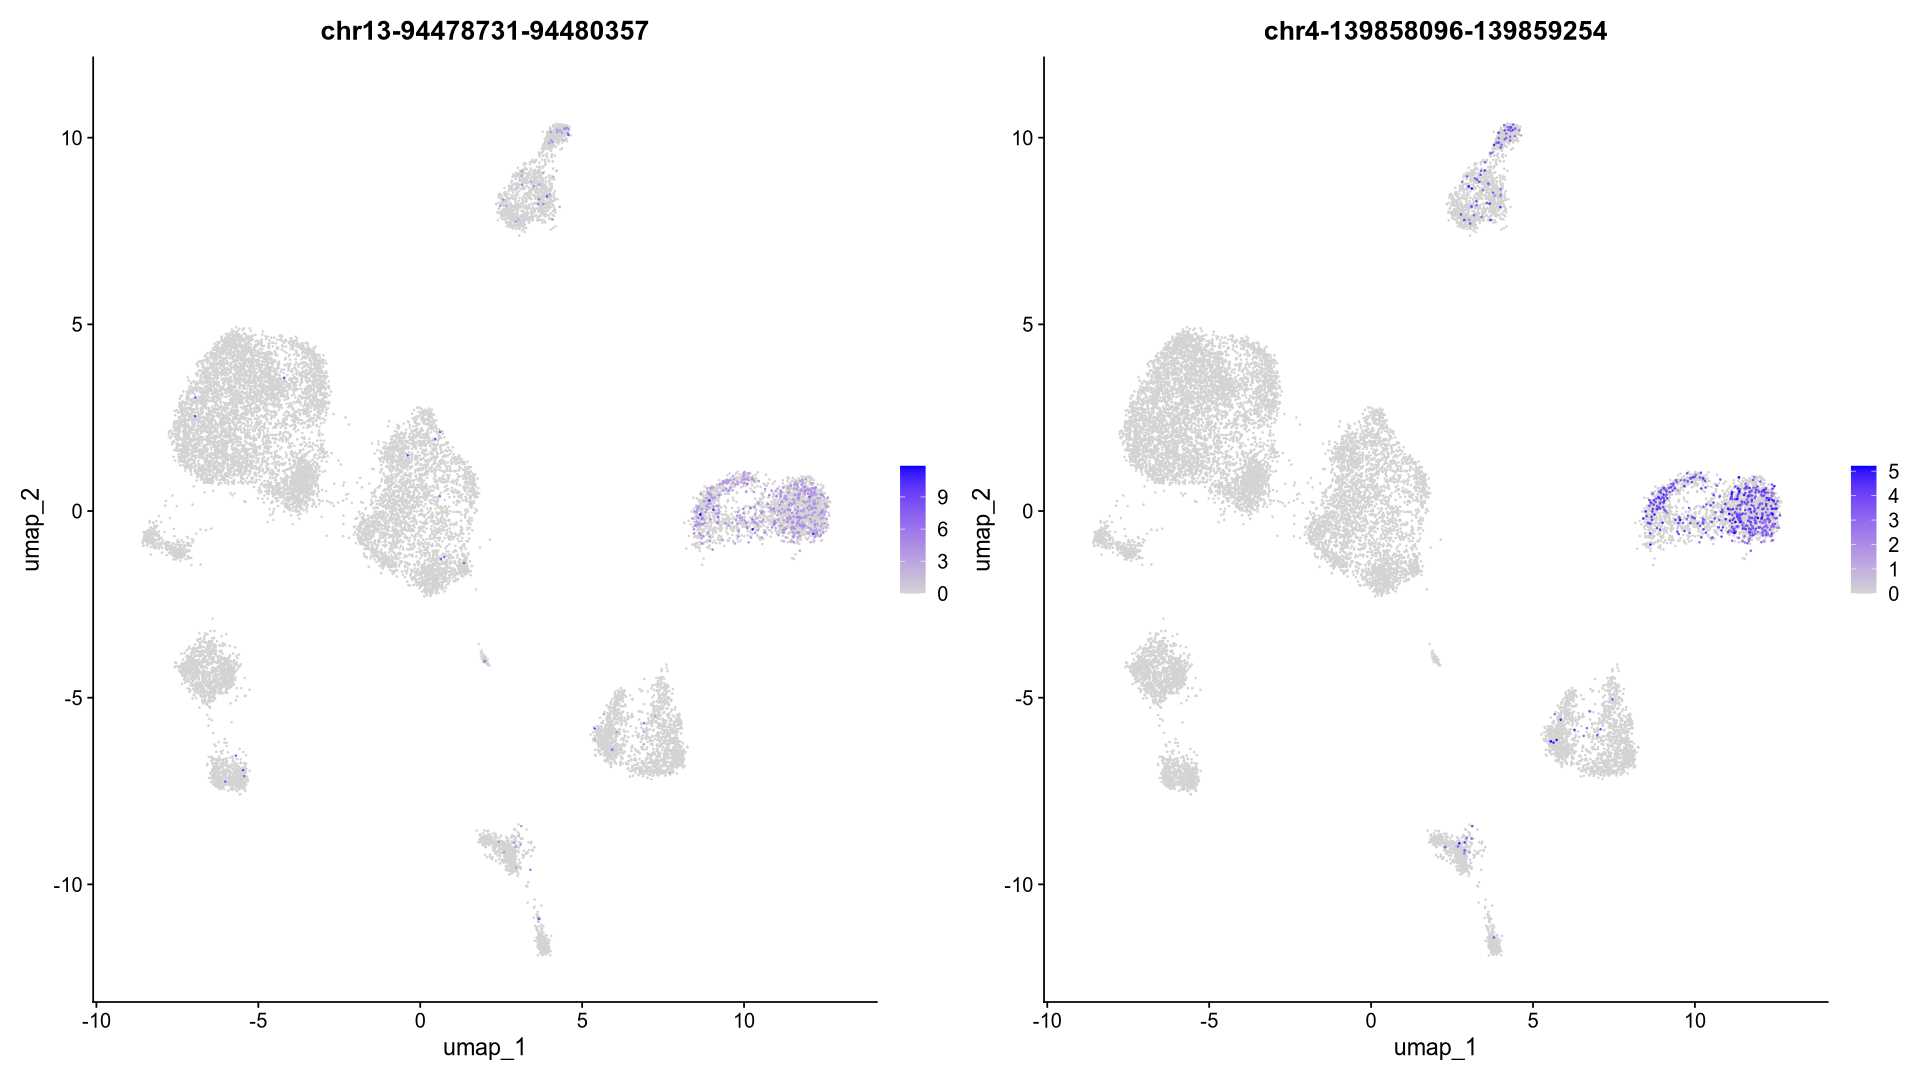

In [142]:
options(repr.plot.width=16, repr.plot.height=9)
FeaturePlot(all_atac, features=c('chr13-94478731-94480357', "chr4-139858096-139859254"), order=TRUE)

## CELL TYPE COMPARISION PER EACH ATAC-seq based cluster
Here I defined leiden clusters on atac-seq dimensionality, so i can 'reannotate' and merge cell types together based on their atac-seq profile

In [42]:
all_atac <- FindClusters(object = all_atac, resolution=0.3)


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 16455
Number of edges: 617798

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9405
Number of communities: 11
Elapsed time: 2 seconds


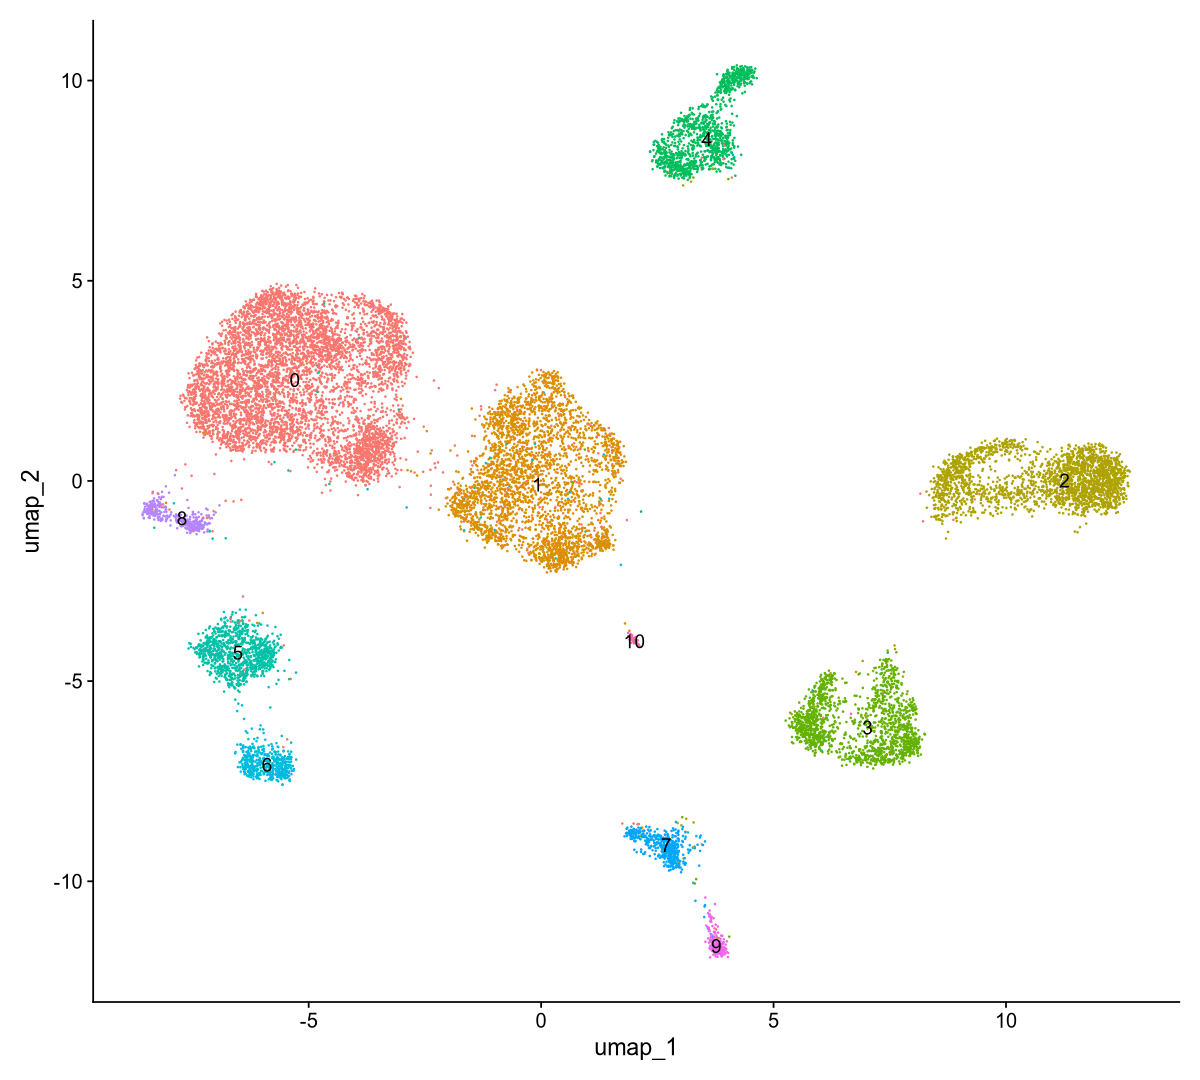

In [44]:
DimPlot(object = all_atac, label = TRUE) + NoLegend()
## I assign new cluster identites by majoprity of cell types making the cluster(therefore some celltypes are merged together)

In [52]:


# Define new cluster names corresponding to the current cluster identities
new.cluster.ids <- c("Rod_Cone_OFF_BC4", "Muller", "Melanocyte","Pericyte_Fibroblast_Endothelial", "RPE","Cone_Rod_rest",
                     "Horizontal_Amacrine", "Microglia_Macrophage", "Cone", "Mast_Bcell","Astrocyte" )
names(new.cluster.ids) <- levels(all_atac)

# Rename clusters
all_atac <- RenameIdents(all_atac, new.cluster.ids)

# Verify the updated identities
levels(all_atac)

[1] "Rod_Cone_OFF_BC4"                "Muller"                         
 [3] "Melanocyte"                      "Pericyte_Fibroblast_Endothelial"
 [5] "RPE"                             "Cone_Rod_rest"                  
 [7] "Horizontal_Amacrine"             "Microglia_Macrophage"           
 [9] "Cone"                            "Mast_Bcell"                     
[11] "Astrocyte"

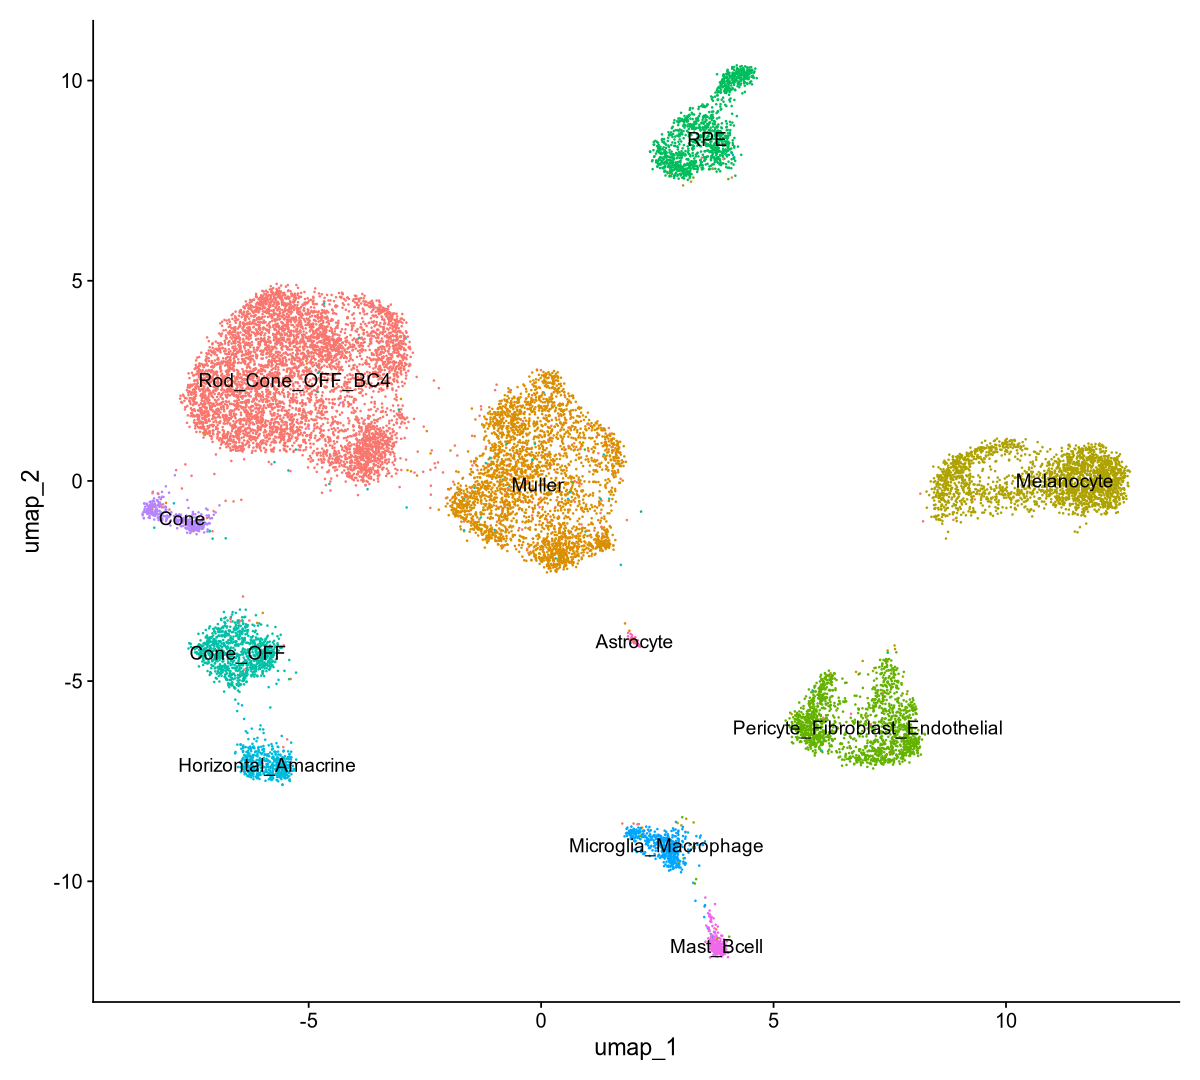

In [47]:
## Grouped Cell types based on majority of cell types in the cluster
DimPlot(object = all_atac, label = TRUE) + NoLegend()

In [56]:
all_atac$atac_names <-  Idents(all_atac)

In [49]:
length(unique(all_atac@meta.data$draft_celltype))

[1] 24

### now calculate the proportion of each rna-seq based cell type in the 'atac-seq' based cluster

In [57]:
# Load required packages
library(dplyr)
library(ggplot2)

# Extract metadata from your Seurat object
metadata <- all_atac@meta.data

# Ensure that the cluster identities are set as a column (here we use the active identity)

# Check that your metadata has a cell type column; for example, "cell_type"
head(metadata)

# Create a table: count cells per cluster and cell type
counts <- metadata %>%
  group_by(atac_names, draft_celltype) %>%
  summarise(n = n(), .groups = 'drop')

# Calculate the total number of cells in each cluster
totals <- counts %>%
  group_by(atac_names) %>%
  summarise(total = sum(n), .groups = 'drop')

# Merge the totals back into your counts data frame and compute percentages
counts <- counts %>%
  left_join(totals, by = "atac_names") %>%
  mutate(percent = (n / total) * 100)

# View the summarized data
print(counts)



orig.ident    nCount_peaks nFeature_peaks draft_celltype
AAACGCGCACATTGCA-1_1 SeuratProject 17840.72      4753          RPE           
AAAGCACCAAATACCT-1_1 SeuratProject 23908.15      7509          RPE           
AAAGCCCGTTCACTGT-1_1 SeuratProject 27850.11      9137          RPE           
AAAGGAGCACAGAAAC-1_1 SeuratProject 20875.57      6003          RPE           
AAAGGAGCAGGCATCT-1_1 SeuratProject 35295.01     11899          RPE           
AACAGGATCACAGACT-1_1 SeuratProject 37080.63     12660          RPE           
                     library            peaks_snn_res.0.3 seurat_clusters
AAACGCGCACATTGCA-1_1 control_3_rpe_only 4                 4              
AAAGCACCAAATACCT-1_1 control_3_rpe_only 4                 4              
AAAGCCCGTTCACTGT-1_1 control_3_rpe_only 4                 4              
AAAGGAGCACAGAAAC-1_1 control_3_rpe_only 4                 4              
AAAGGAGCAGGCATCT-1_1 control_3_rpe_only 4                 4              
AACAGGATCACAGACT-1_1 control_3_rpe_only 4                 4              
                     atac_names
AAACGCGCACATTGCA-1_1 RPE       
AAAGCACCAAATACCT-1_1 RPE       
AAAGCCCGTTCACTGT-1_1 RPE       
AAAGGAGCACAGAAAC-1_1 RPE       
AAAGGAGCAGGCATCT-1_1 RPE       
AACAGGATCACAGACT-1_1 RPE

# A tibble: 124 × 5
   atac_names       draft_celltype     n total percent
   <fct>            <chr>          <int> <int>   <dbl>
 1 Rod_Cone_OFF_BC4 Amacrine          27  5775  0.468 
 2 Rod_Cone_OFF_BC4 Astrocyte          4  5775  0.0693
 3 Rod_Cone_OFF_BC4 Cone              20  5775  0.346 
 4 Rod_Cone_OFF_BC4 Cone_OFF_BC1B      3  5775  0.0519
 5 Rod_Cone_OFF_BC4 Cone_OFF_BC2      14  5775  0.242 
 6 Rod_Cone_OFF_BC4 Cone_OFF_BC3A      5  5775  0.0866
 7 Rod_Cone_OFF_BC4 Cone_OFF_BC4       6  5775  0.104 
 8 Rod_Cone_OFF_BC4 Cone_ON_BC        25  5775  0.433 
 9 Rod_Cone_OFF_BC4 Cone_ON_BC5A      22  5775  0.381 
10 Rod_Cone_OFF_BC4 Endothelial        3  5775  0.0519
# ℹ 114 more rows


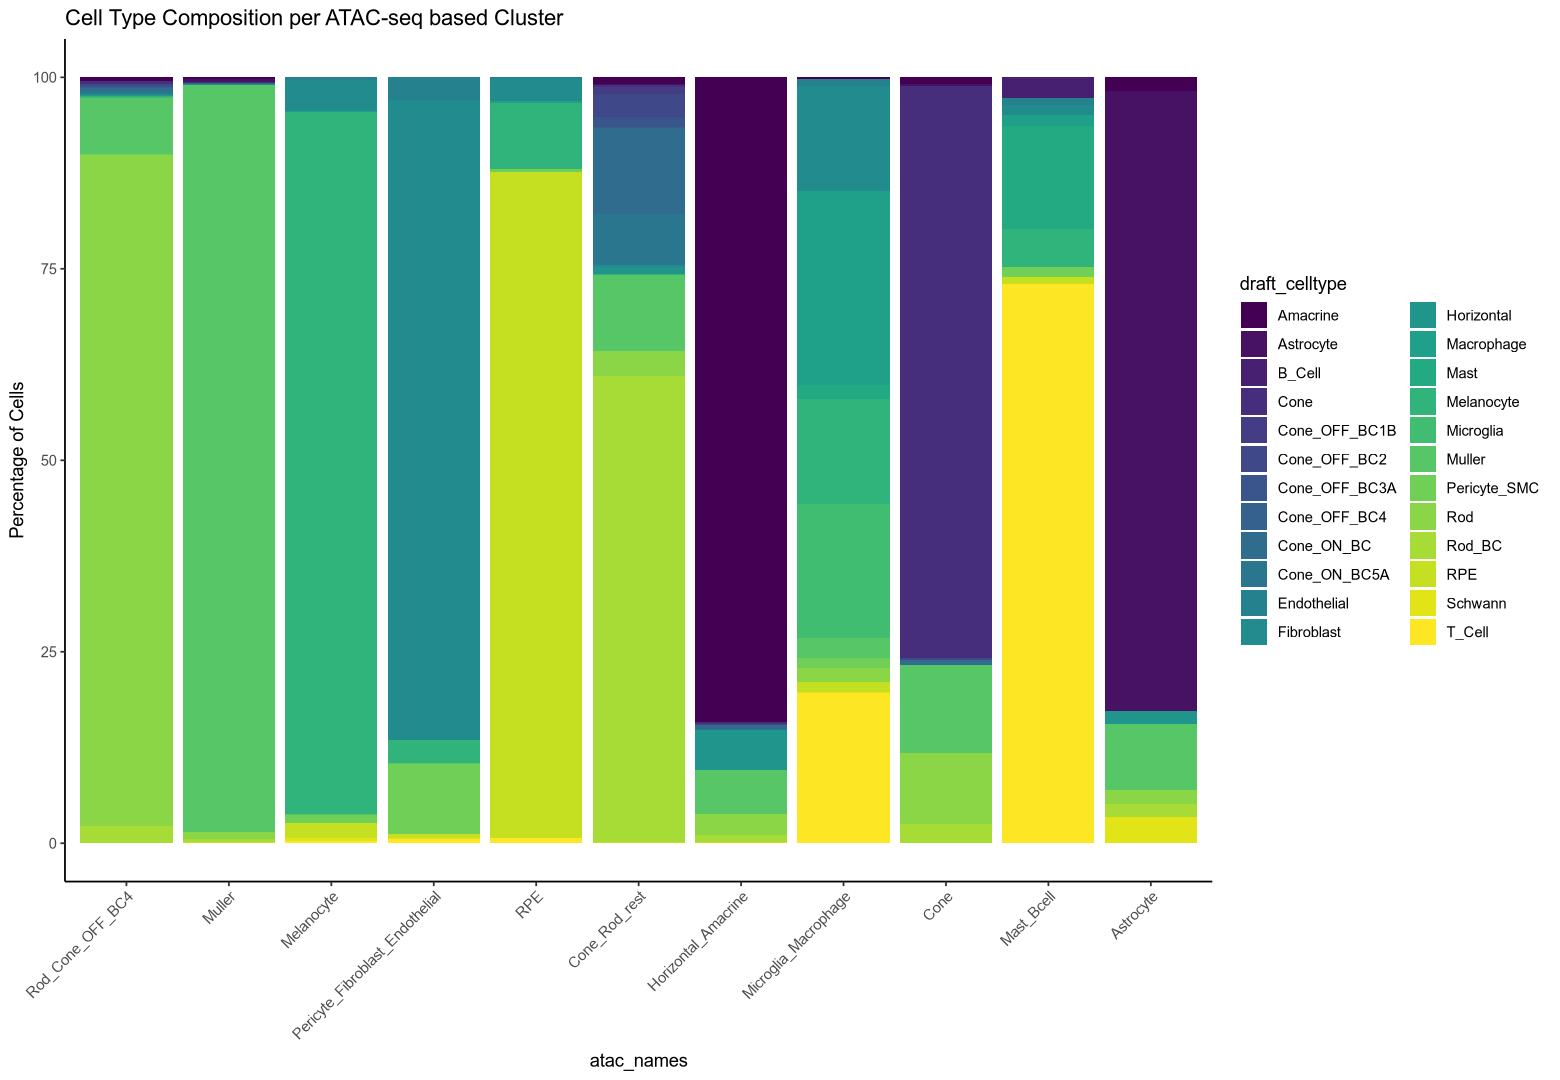

In [58]:
# Create a stacked bar plot showing the percentage contribution of each cell type per cluster
ggplot(counts, aes(x = atac_names, y = percent, fill = draft_celltype)) +
  geom_bar(stat = "identity") +
  scale_fill_viridis_d() + 
  labs(x = "atac_names",
       y = "Percentage of Cells",
       fill = "draft_celltype",
       title = "Cell Type Composition per ATAC-seq based Cluster") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [225]:
## with more categorical colors
options(repr.plot.width=13, repr.plot.height=9)
# Create a stacked bar plot showing the percentage contribution of each cell type per cluster
comp_hist=ggplot(counts, aes(x = atac_names, y = percent, fill = draft_celltype)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c('#4DAF4A33', '#984EA333', '#FF7F0033', '#FFFF3333', '#A6562833', '#F781BF33', '#99999933',
'#66C2A533', '#FC8D6233', '#8DA0CB33', '#E78AC333', '#A6D85433', '#FFD92F33', '#E5C49433',
'#B3B3B333', '#377EB8FF', '#8C510A33', '#DFC27D33', '#80CDC133', '#01857133', '#A6CEE333',
'#E41A1CFF', '#1F78B433', '#B2DF8A33') ) + 
  labs(x = "ATAC-seq based cluster names",
       y = "Percentage of Cells",
       fill = "draft_celltype",
       title = "Cell Type Composition per ATAC-seq based Cluster") +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

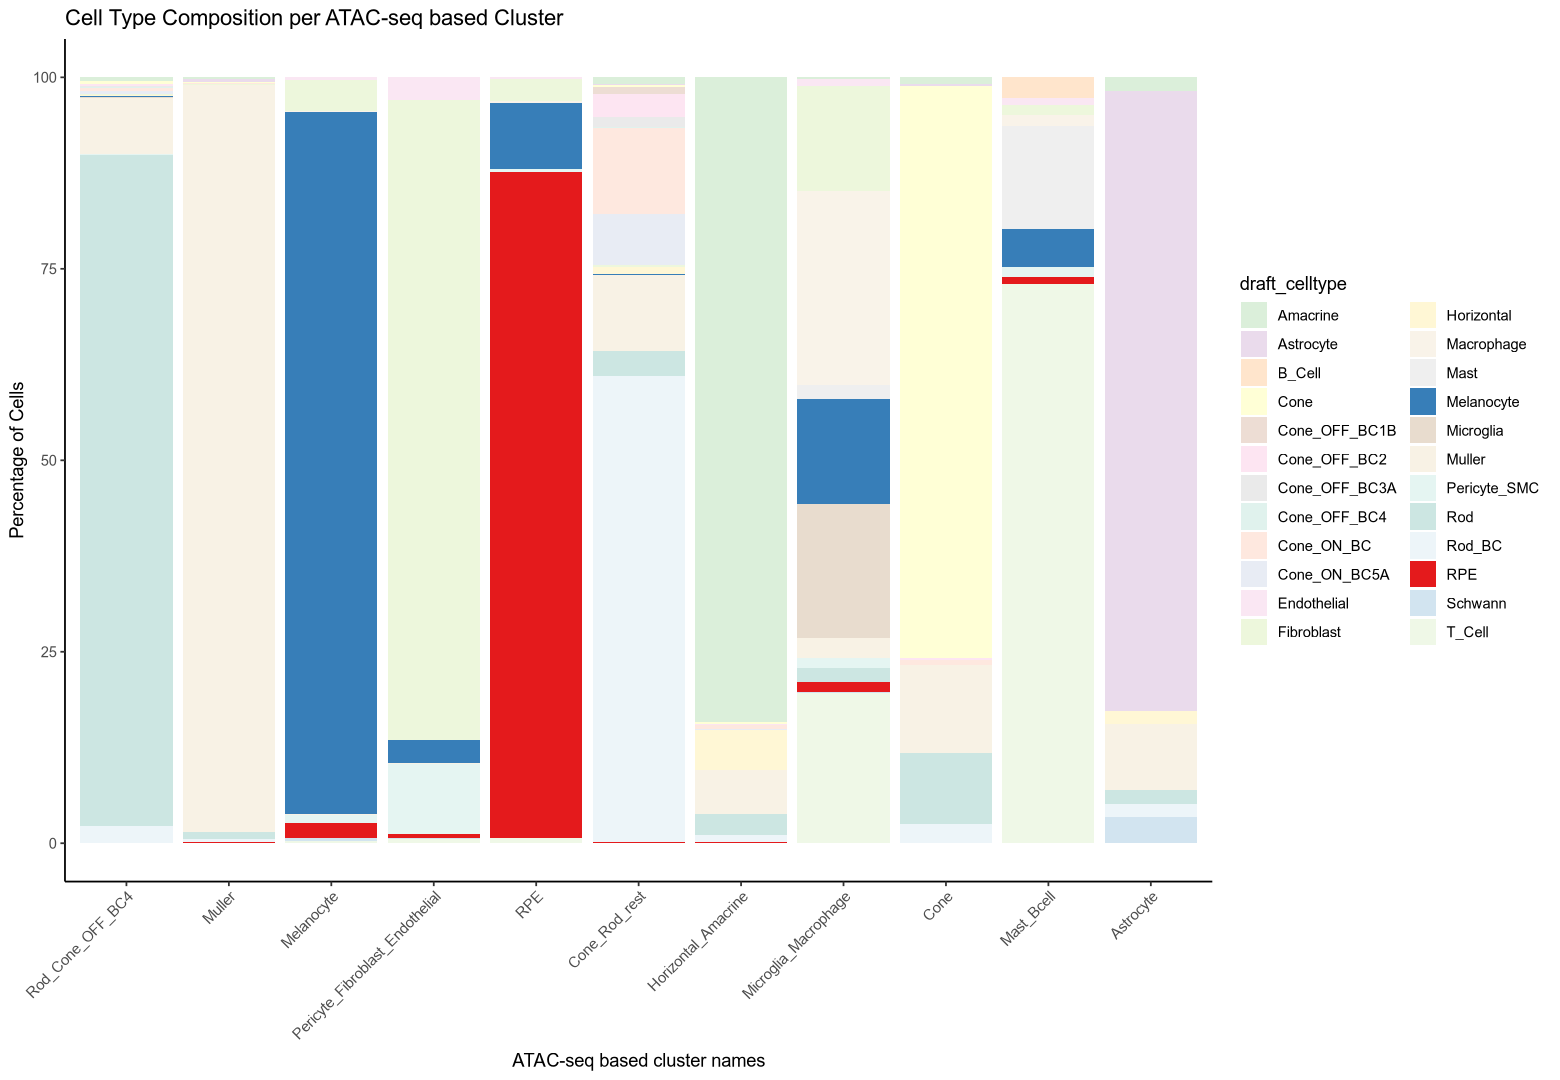

In [226]:
comp_hist

In [227]:
library(svglite)


p=comp_hist #whatever plot

svglite(filename = paste0('figures/cellular_composition_hist.svg'), # put your path and name of choice
            width = 5,height = 4,standalone = T,system_fonts = 'Arial',bg = 'transparent',scaling=0.6)    # here you define which font and size of pliot
plot(p) # plot your plot in the graphic device
dev.off() # close the graphic device and it saves your figure :-)

pdf 
  2

## building similarity trees based on scATAC-seq profiles

In [107]:
Idents(all_atac)<- all_atac@meta.data$draft_celltype

In [108]:
##using build in seurat option to make the similarity tree
all_atac <- BuildClusterTree(
  all_atac,
  assay = 'peaks',
  features = NULL,
  dims = 2:30,
  reduction = "lsi",
  slot = "data",
  reorder = TRUE,
  reorder.numeric = FALSE,
  verbose = TRUE
)

Reordering identity classes and rebuilding tree



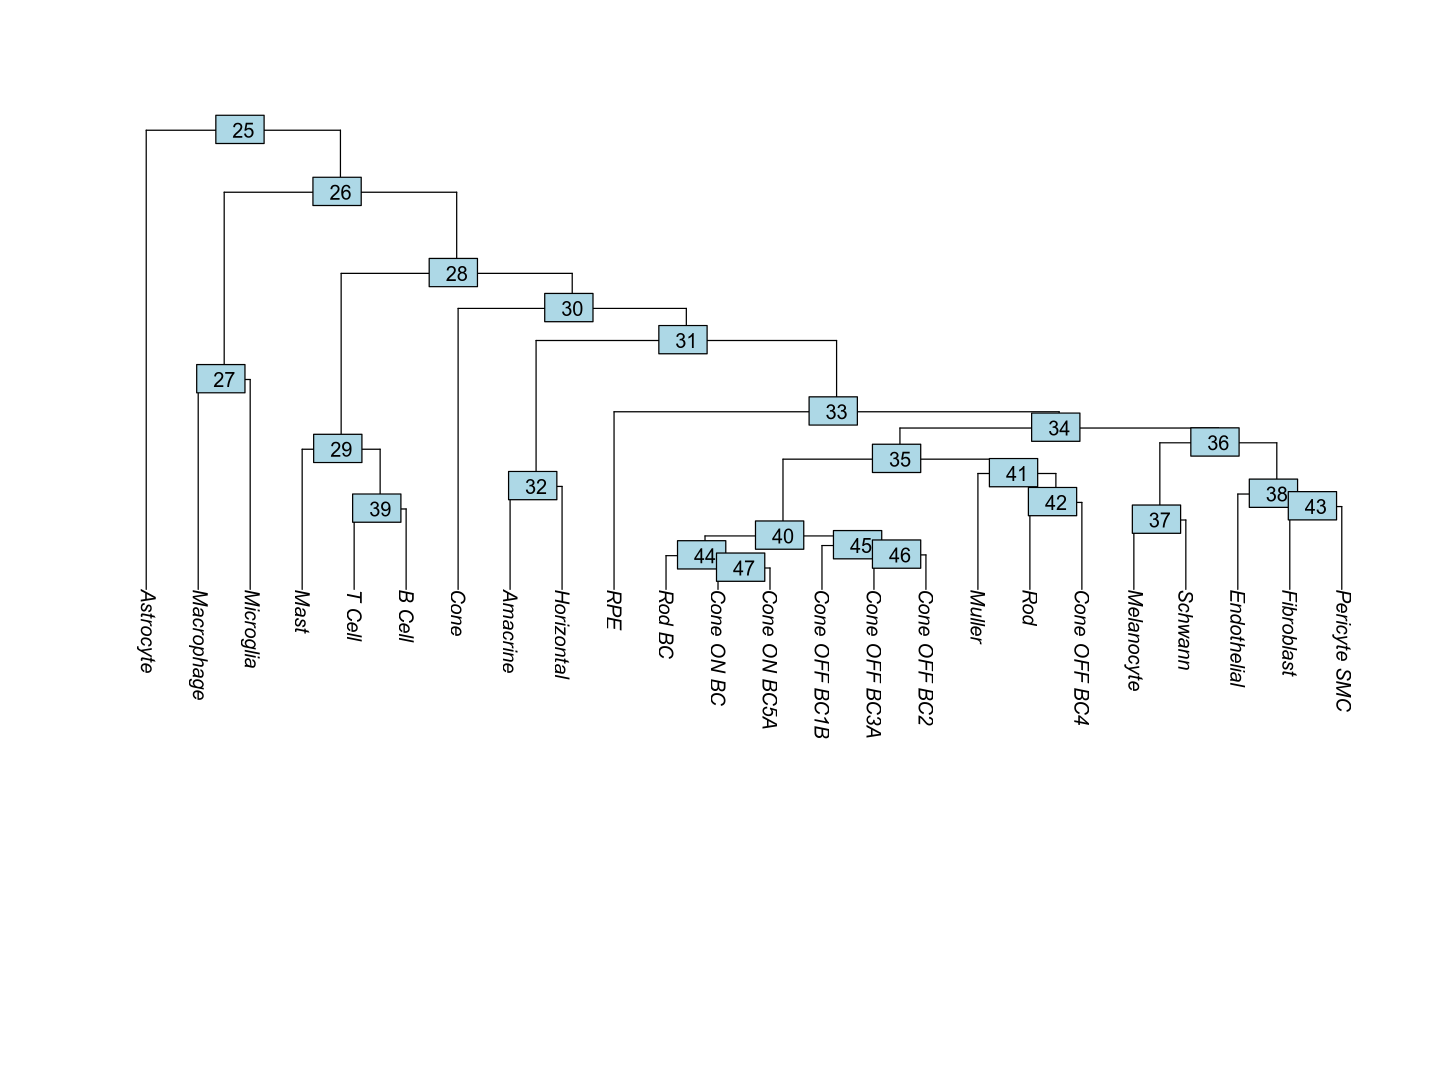

In [127]:
buildtree <-PlotClusterTree(all_atac, direction = "downwards")

In [128]:
library(svglite)


p=buildtree #whatever plot

svglite(filename = paste0('figures/BuildClusterTree.svg'), # put your path and name of choice
            width = 5,height = 4,standalone = T,system_fonts = 'Arial',bg = 'transparent',scaling=0.6)    # here you define which font and size of pliot
plot(p) # plot your plot in the graphic device
dev.off() # close the graphic device and it saves your figure :-)

Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x):
"no non-missing arguments to min; returning Inf"
Warning message in max(x):
"no non-missing arguments to max; returning -Inf"


ERROR: Error in plot.window(...): need finite 'xlim' values


In [444]:
saveRDS(all_atac,'all_atac_rna_filtered.rds')

In [113]:
annotation <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v86)

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warn

In [114]:
GenomeInfoDb::seqlevelsStyle(annotation) <- "UCSC"

In [115]:
genome(annotation) = "hg38"

In [116]:
annotation

GRanges object with 3021151 ranges and 5 metadata columns:
                  seqnames        ranges strand |           tx_id   gene_name
                     <Rle>     <IRanges>  <Rle> |     <character> <character>
  ENSE00001489430     chrX 276322-276394      + | ENST00000399012      PLCXD1
  ENSE00001536003     chrX 276324-276394      + | ENST00000484611      PLCXD1
  ENSE00002160563     chrX 276353-276394      + | ENST00000430923      PLCXD1
  ENSE00001750899     chrX 281055-281121      + | ENST00000445062      PLCXD1
  ENSE00001489388     chrX 281192-281684      + | ENST00000381657      PLCXD1
              ...      ...           ...    ... .             ...         ...
  ENST00000361739     chrM     7586-8269      + | ENST00000361739      MT-CO2
  ENST00000361789     chrM   14747-15887      + | ENST00000361789      MT-CYB
  ENST00000361851     chrM     8366-8572      + | ENST00000361851     MT-ATP8
  ENST00000361899     chrM     8527-9207      + | ENST00000361899     MT-ATP6
  ENS

In [117]:
Annotation(all_atac[["peaks"]])<- annotation

In [398]:
genome(all_atac[["peaks"]]) <- "hg38" 

### DARs analysis

In [ ]:
# Check common differentially accessible peaks(DARs) for RPE and Melanocytes
DefaultAssay(all_atac) <- 'peaks'

# wilcox is the default option for test.use
da_peak <- FindMarkers(
  object = all_atac,
  ident.1 = c("RPE","Melanocyte"),
  test.use = 'wilcox',
  min.pct = 0.1
)

In [138]:
#some minimal treshold for differential accessibility
da_peak[da_peak$avg_log2FC > 2 & da_peak$p_val_adj<0.05, ]

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
chr4-139858096-139859254   0.000000e+00 6.013857   0.134 0.002  0.000000e+00
chr5-65535142-65536305     0.000000e+00 5.745702   0.120 0.002  0.000000e+00
chr1-165467352-165468626   0.000000e+00 5.593416   0.130 0.003  0.000000e+00
chr7-99357843-99359048     0.000000e+00 5.566672   0.156 0.003  0.000000e+00
chr13-110092590-110093550  0.000000e+00 5.553425   0.167 0.004  0.000000e+00
chr11-88151570-88152610    0.000000e+00 5.369549   0.130 0.003  0.000000e+00
chr6-113823948-113824973   0.000000e+00 5.295742   0.134 0.003  0.000000e+00
chr8-129315937-129317064   0.000000e+00 5.238177   0.135 0.004  0.000000e+00
chr11-57874588-57875673    0.000000e+00 5.141639   0.131 0.004  0.000000e+00
chr5-160458667-160459827   0.000000e+00 5.016256   0.135 0.003  0.000000e+00
chr2-95333320-95334703     0.000000e+00 4.699622   0.140 0.005  0.000000e+00
chr13-94478731-94480357    0.000000e+00 4.646095   0.131 0.004  0.000000e+00
chr8-20253296-20255534     0.000000e+00 4.596344   0.127 0.004  0.000000e+00
chr17-68380871-68381900    0.000000e+00 4.559636   0.136 0.006  0.000000e+00
chr17-81384850-81386229    0.000000e+00 4.537863   0.152 0.005  0.000000e+00
chr2-222290268-222291997   0.000000e+00 4.513837   0.154 0.005  0.000000e+00
chr10-29555704-29556704    0.000000e+00 4.381201   0.135 0.006  0.000000e+00
chr6-109793580-109794840   0.000000e+00 4.342197   0.162 0.006  0.000000e+00
chr8-129551733-129552723   0.000000e+00 4.312351   0.162 0.006  0.000000e+00
chr1-9441249-9442401       0.000000e+00 4.311268   0.151 0.006  0.000000e+00
chr15-79978207-79979328    0.000000e+00 4.176649   0.157 0.007  0.000000e+00
chr6-108002208-108003434   0.000000e+00 3.922313   0.199 0.009  0.000000e+00
chr15-31100550-31103515    0.000000e+00 3.514463   0.247 0.012  0.000000e+00
chr12-58893216-58894582    0.000000e+00 3.326867   0.236 0.022  0.000000e+00
chr19-1168564-1170985      0.000000e+00 3.289469   0.164 0.012  0.000000e+00
chr3-112293081-112294394   0.000000e+00 3.228242   0.170 0.013  0.000000e+00
chr4-54837807-54838808    1.444455e-305 5.377073   0.120 0.003 4.953760e-301
chr3-45612753-45613822    1.240767e-304 4.630206   0.126 0.004 4.255212e-300
chr2-121567755-121568712  1.745563e-301 5.241213   0.120 0.003 5.986409e-297
chr11-16147858-16148975   2.447495e-297 4.726236   0.121 0.004 8.393686e-293
⋮                         ⋮             ⋮          ⋮     ⋮     ⋮            
chr5-61630854-61632530    3.288336e-155 2.433917   0.107 0.014 1.127735e-150
chr21-43331739-43333154   1.315148e-154 2.268239   0.121 0.019 4.510301e-150
chr2-64831043-64832223    2.054316e-154 2.385654   0.112 0.016 7.045278e-150
chr18-58117524-58120502   4.880619e-152 2.196529   0.109 0.015 1.673808e-147
chr17-1038673-1040848     7.467433e-150 2.373671   0.105 0.014 2.560956e-145
chr11-35166335-35167378   8.866717e-150 2.389582   0.114 0.018 3.040840e-145
chr8-143823009-143824315  5.295777e-148 2.419314   0.105 0.015 1.816187e-143
chr1-47577867-47579458    2.167109e-146 2.451912   0.105 0.015 7.432099e-142
chr19-18374008-18375017   2.157852e-145 2.095724   0.126 0.023 7.400355e-141
chr17-68377933-68379098   3.151736e-143 2.254766   0.117 0.020 1.080888e-138
chr19-18364261-18365576   1.807512e-141 2.512131   0.100 0.014 6.198864e-137
chr9-127950260-127951410  1.301437e-137 2.189887   0.113 0.019 4.463280e-133
chr3-182364457-182365837  2.901483e-136 2.299924   0.108 0.018 9.950635e-132
chr1-151839121-151840375  5.547367e-135 2.196591   0.105 0.016 1.902469e-130
chr2-96915872-96917914    1.383813e-134 2.414392   0.114 0.021 4.745788e-130
chr12-62631247-62633611   2.309335e-132 2.245259   0.105 0.017 7.919863e-128
chr7-150876496-150877735  3.717298e-132 2.199340   0.108 0.018 1.274847e-127
chr4-143411249-143412688  2.113354e-131 2.004443   0.115 0.021 7.247746e-127
chr11-57778076-57779276   3.102529e-131 2.016387   0.118 0.022 1.064012e-126
chr2-20578944-20580000    1.052543e-129 2.313563   0.105 0.018 3.609695e-125
chr3-30606064-30607547

In [132]:
#setting threshold for diff accesibility
open_rpe_melano<- rownames(da_peak[da_peak$avg_log2FC > 2 & da_peak$p_val_adj<0.05, ])



In [133]:
open_rpe_melano

[1] "chr4-139858096-139859254"  "chr5-65535142-65536305"   
  [3] "chr1-165467352-165468626"  "chr7-99357843-99359048"   
  [5] "chr13-110092590-110093550" "chr11-88151570-88152610"  
  [7] "chr6-113823948-113824973"  "chr8-129315937-129317064" 
  [9] "chr11-57874588-57875673"   "chr5-160458667-160459827" 
 [11] "chr2-95333320-95334703"    "chr13-94478731-94480357"  
 [13] "chr8-20253296-20255534"    "chr17-68380871-68381900"  
 [15] "chr17-81384850-81386229"   "chr2-222290268-222291997" 
 [17] "chr10-29555704-29556704"   "chr6-109793580-109794840" 
 [19] "chr8-129551733-129552723"  "chr1-9441249-9442401"     
 [21] "chr15-79978207-79979328"   "chr6-108002208-108003434" 
 [23] "chr15-31100550-31103515"   "chr12-58893216-58894582"  
 [25] "chr19-1168564-1170985"     "chr3-112293081-112294394" 
 [27] "chr4-54837807-54838808"    "chr3-45612753-45613822"   
 [29] "chr2-121567755-121568712"  "chr11-16147858-16148975"  
 [31] "chr5-138243382-138244410"  "chr2-238187201-238188925" 
 [33] "chr1-232142203-232144184"  "chr3-41275890-41276926"   
 [35] "chr1-63124478-63125410"    "chr22-32486698-32487738"  
 [37] "chr17-76574891-76576299"   "chr19-16896684-16897757"  
 [39] "chr19-39078387-39079459"   "chr17-76872185-76873184"  
 [41] "chr12-122463919-122464884" "chr6-22709434-22710519"   
 [43] "chr8-127944383-127946056"  "chr9-120583598-120584676" 
 [45] "chr14-75165627-75166772"   "chr1-91621127-91623464"   
 [47] "chr10-4315547-4317008"     "chr15-42403309-42405213"  
 [49] "chr2-44075299-44076371"    "chr8-38870670-38871988"   
 [51] "chr6-23650414-23651430"    "chr10-4017724-4018764"    
 [53] "chr17-10123585-10124719"   "chr1-48493971-48495048"   
 [55] "chr8-134740126-134741076"  "chr1-116432999-116434150" 
 [57] "chr3-187403450-187404611"  "chr18-62690148-62691223"  
 [59] "chr11-60127003-60128180"   "chr11-710054-711942"      
 [61] "chr7-17695888-17697071"    "chr5-91042055-91043991"   
 [63] "chr2-239700616-239701602"  "chr11-95149358-95150435"  
 [65] "chr18-57712033-57713227"   "chr1-17089231-17090450"   
 [67] "chr10-69494294-69495503"   "chr17-74567934-74568934"  
 [69] "chr11-13097666-13098757"   "chr7-22841932-22843277"   
 [71] "chr19-6509080-6510210"     "chr18-77114073-77115275"  
 [73] "chr13-29733006-29734780"   "chr8-104074785-104076283" 
 [75] "chr12-110079245-110080345" "chr10-22619946-22621175"  
 [77] "chr6-98985860-98986916"    "chr21-34558914-34559958"  
 [79] "chr6-32163551-32164767"    "chr16-17404959-17406041"  
 [81] "chr10-125056723-125058051" "chr2-209933747-209934874" 
 [83] "chr2-68831708-68833037"    "chr20-49724388-49725501"  
 [85] "chr15-45456128-45457460"   "chr10-110076531-110078126"
 [87] "chr2-239194839-239196346"  "chr1-230113324-230114565" 
 [89] "chr12-106644513-106646052" "chr10-71980916-71982574"  
 [91] "chr20-50266834-50268204"   "chr6-150881796-150882773" 
 [93] "chr15-48975484-48976673"   "chr5-173781533-173782660" 
 [95] "chr12-99258767-99260240"   "chr17-68793515-68795420"  
 [97] "chr4-67437586-67438790"    "chr12-121128705-121129908"
 [99] "chr8-134289948-134291297"  "chr3-185656081-185657057" 
[101] "chr11-62508121-62509323"   "chr7-76310167-76311333"   
[103] "chr3-179811113-179812257"  "chr14-75147249-75148558"  
[105] "chr16-56298888-56300989"   "chr14-102262515-102263577"
[107] "chr2-10277558-10278932"    "chr1-88984734-88985842"   
[109] "chr1-212469568-212470841"  "chr17-16377528-16378720"  
[111] "chr6-164085058-164086234"  "chr21-31220249-31221373"  
[113] "chr9-130128351-130129962"  "chr5-125481402-125482541" 
[115] "chr21-32334648-32336559"   "chr17-68777097-68778321"  
[117] "chr2-235263055-235264462"  "chr3-167814173-167815618" 
[119] "chr2-158685884-158687002"  "chr11-46710603-46711617"  
[121] "chr20-62666372-62667655"   "chr21-41641492-41642535"  
[123] "chr12-55727136-55728604"   "chr11-65814023-65815028"  
[125] "chr2-218745334-218746551"  "chr22-39332345-39333358"  
[127] "chr1-182279454-182280575"  "chr9-81826189-81827224"   
[129] "chr22-30340744-30341841"   

In [134]:
##cehck genes that are closest to those DARs
closest_genes_rpe_melano <- ClosestFeature(all_atac, regions = open_rpe_melano)


In [144]:
closest_genes_rpe_melano$gene_name

[1] "MAML3"         "CENPK"         "RXRG"          "ARPC1A"       
  [5] "RP11-403A3.3"  "RAB38"         "RP1-249H1.2"   "CCDC26"       
  [9] "CTNND1"        "MIR3142HG"     "KCNIP3"        "DCT"          
 [13] "LZTS1"         "ARSG"          "RP11-1055B8.3" "PAX3"         
 [17] "SVIL"          "FIG4"          "CCDC26"        "RNA5SP40"     
 [21] "BCL2A1"        "RP1-111B22.3"  "TRPM1"         "LRIG3"        
 [25] "SBNO2"         "SLC9C1"        "RP11-273B19.2" "LIMD1"        
 [29] "CLASP1"        "SOX6"          "GFRA3"         "ILKAP"        
 [33] "RP5-865N13.2"  "ULK4"          "RP11-335E6.2"  "FBXO7"        
 [37] "ST6GALNAC2"    "CPAMD8"        "ACP7"          "MGAT5B"       
 [41] "ZCCHC8"        "RP1-209A6.1"   "PVT1"          "CDK5RAP2"     
 [45] "TMED10"        "TGFBR3"        "LINC00703"     "CAPN3"        
 [49] "LRPPRC"        "TACC1"         "RP11-439H9.1"  "RP11-433J20.2"
 [53] "GAS7"          "SPATA6"        "CTD-2342N23.3" "RP4-655J12.5" 
 [57] "RTP4"          "PHLPP1"        "MS4A2"         "EPS8L2"       
 [61] "AC006482.1"    "ADGRV1"        "RP11-315F22.1" "SESN3"        
 [65] "ATP8B1"        "PADI2"         "TSPAN15"       "CD300LD"      
 [69] "CTC-497E21.5"  "AC005682.5"    "TUBB4A"        "MBP"          
 [73] "UBL3"          "RIMS2"         "C12orf76"      "PIP4K2A"      
 [77] "FBXL4"         "RCAN1"         "PPT2-EGFL8"    "XYLT1"        
 [81] "CTBP2"         "UNC80"         "AC097495.3"    "B4GALT5"      
 [85] "C15orf48"      "ADD3"          "HDAC4"         "GALNT2"       
 [89] "RFX4"          "CHST3"         "LINC01272"     "MTHFD1L"      
 [93] "SECISBP2L"     "LINC01485"     "ANKS1B"        "RP11-118B18.2"
 [97] "RP11-584P21.2" "P2RX7"         "RP11-513H8.1"  "IGF2BP2"      
[101] "AHNAK"         "HSPB1"         "PEX5L"         "TMED10"       
[105] "GNAO1"         "MOK"           "HPCAL1"        "KYAT3"        
[109] "RP11-61J19.2"  "UBB"           "RP1-155D22.2"  "TIAM1"        
[113] "GPR107"        "RP11-756H20.1" "URB1"          "LINC01482"    
[117] "AC114814.3"    "SERPINI1"      "AC005042.5"    "ZNF408"       
[121] "SLCO4A1"       "LINC00111"     "CD63"          "CFL1"         
[125] "TTLL4"         "RPL3"          "LINC01344"     "RP11-154D17.1"
[129] "SF3A1"         "DBI"           "VMP1"          "SNX25"        
[133] "CLIC4"         "ANKFY1"        "PLEKHG3"       "PTTG1IP"      
[137] "CUBN"          "LPGAT1"        "BCL2"          "RP11-521C20.5"
[141] "DIAPH1"        "NCOR2"         "PKNOX2"        "ANTXR1"       
[145] "KLF13"         "CHST11"        "C1orf127"      "MCC"          
[149] "C5orf64"       "LINC00322"     "AC007880.1"    "NEDD4L"       
[153] "ABR"           "CD44"          "PUF60"         "RP11-543D5.1" 
[157] "GDF15"         "ARSG"          "PGPEP1"        "FAM102A"      
[161] "RP11-338L18.1" "C2CD4D"        "FAM178B"       "RP11-631N16.2"
[165] "AOC1"          "GAB1"          "CTNND1"        "HS1BP3"       
[169] "TGFBR2"        "ENKUR"         "RP11-108O10.8" "KAZN"         
[173] "CLDN8"         "WISP2"         "TACC1"         "SSH1"         
[177] "HR"            "ADTRP"

In [146]:
plan("multicore", workers = 20)

In [190]:
all_atac

An object of class Seurat 
70896 features across 16455 samples within 2 assays 
Active assay: peaks (34295 features, 32581 variable features)
 2 layers present: counts, data
 1 other assay present: RNA
 2 dimensional reductions calculated: lsi, umap

## Building similarity trees

### building centroid-based trees on lsi dimensionality reduction on the whole scATAC-seq data

In [195]:
# extract lsi coordinates, exclusing the 1st component(usually captures noise for atac seq data) 
lsi_coords<-Embeddings(all_atac, reduction = "lsi")[,2:30]

In [166]:
umap_coords<-FetchData(all_atac, vars = c("lsi"))

In [196]:
# Example: assuming cell_type is a factor or character vector
cell_types <- unique(Idents(all_atac))

# Compute centroids (mean lsi coordinates) for each cell type
centroids <- do.call(rbind, lapply(cell_types, function(ct) {
  colMeans(lsi_coords[all_atac@meta.data$draft_celltype == ct, , drop = FALSE])
}))
rownames(centroids) <- cell_types

# Inspect the centroids
print(centroids)


                    LSI_2       LSI_3      LSI_4        LSI_5        LSI_6
RPE            0.39412033  0.28400306 -1.3654816 -1.324666298 -0.517635148
Melanocyte     0.63187938  1.72559631  0.5533886  0.003793781 -0.702348665
Fibroblast     0.61494554  0.40674736 -0.3059811 -0.553264503  1.558075132
T_Cell         0.12063601  0.20926697  0.3494151 -0.720848278  1.968473657
Macrophage     0.36748143  0.45547153  0.2789923 -0.571307778  2.335369730
Endothelial    0.54074396  0.40918951 -0.3053186 -0.604082131  1.234454972
Mast           0.42231896  0.35472048 -0.6151730 -0.969401192  2.314859118
Pericyte_SMC   0.65331078  0.41102868 -0.2063368 -0.642763556  1.378173641
B_Cell        -0.07142127  0.01418662  0.4421074 -0.888674928  1.830375447
Schwann        0.55242077  0.95338478  0.4451796  0.109074779  0.015385305
Muller         0.79581523 -1.07523935  0.5488740  0.317485336 -0.286799694
Rod           -1.05089158 -0.23657054 -0.0846608  0.264907380 -0.095647167
Rod_BC        -0.34151560

In [197]:
# Compute pairwise Euclidean distances between centroids
d_mat <- dist(centroids)

h<-hclust(d_mat)
plot(h)

                     RPE Melanocyte Fibroblast     T_Cell Macrophage
Melanocyte     3.8556133                                            
Fibroblast     4.2056128  3.4711524                                 
T_Cell         5.5343655  5.0033210  5.2271108                      
Macrophage     5.2693805  4.6692835  4.8871455  3.9229278           
Endothelial    3.7764939  2.9601175  2.2572972  3.9612812  3.6980363
Mast           6.0511903  5.6044127  5.7561409  2.1153271  3.8523436
Pericyte_SMC   4.1598162  3.2716577  1.9604553  5.0073411  4.5890482
B_Cell         6.2310300  5.8219123  6.0673301  1.9043724  5.1896555
Schwann        3.5679671  1.6425824  2.6777128  4.7698774  4.3101630
Muller         3.7250804  2.9623925  3.2706645  4.8795885  4.5791556
Rod            3.6222060  2.8144503  3.1678256  4.7839049  4.5146002
Rod_BC         4.1786605  3.5651971  3.8210345  5.2242339  5.0965284
Cone_OFF_BC3A  3.8438395  3.2742123  3.5991436  4.9341928  4.8417615
Cone_ON_BC     3.8848979  3.240557

In [202]:
install.packages("ggdendro")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [292]:
library(plotly)

library(ggplot2)

library(ggdendro)

p <- ggdendrogram(h, rotate = TRUE, size = 2)

In [294]:
dend <- as.dendrogram(h)

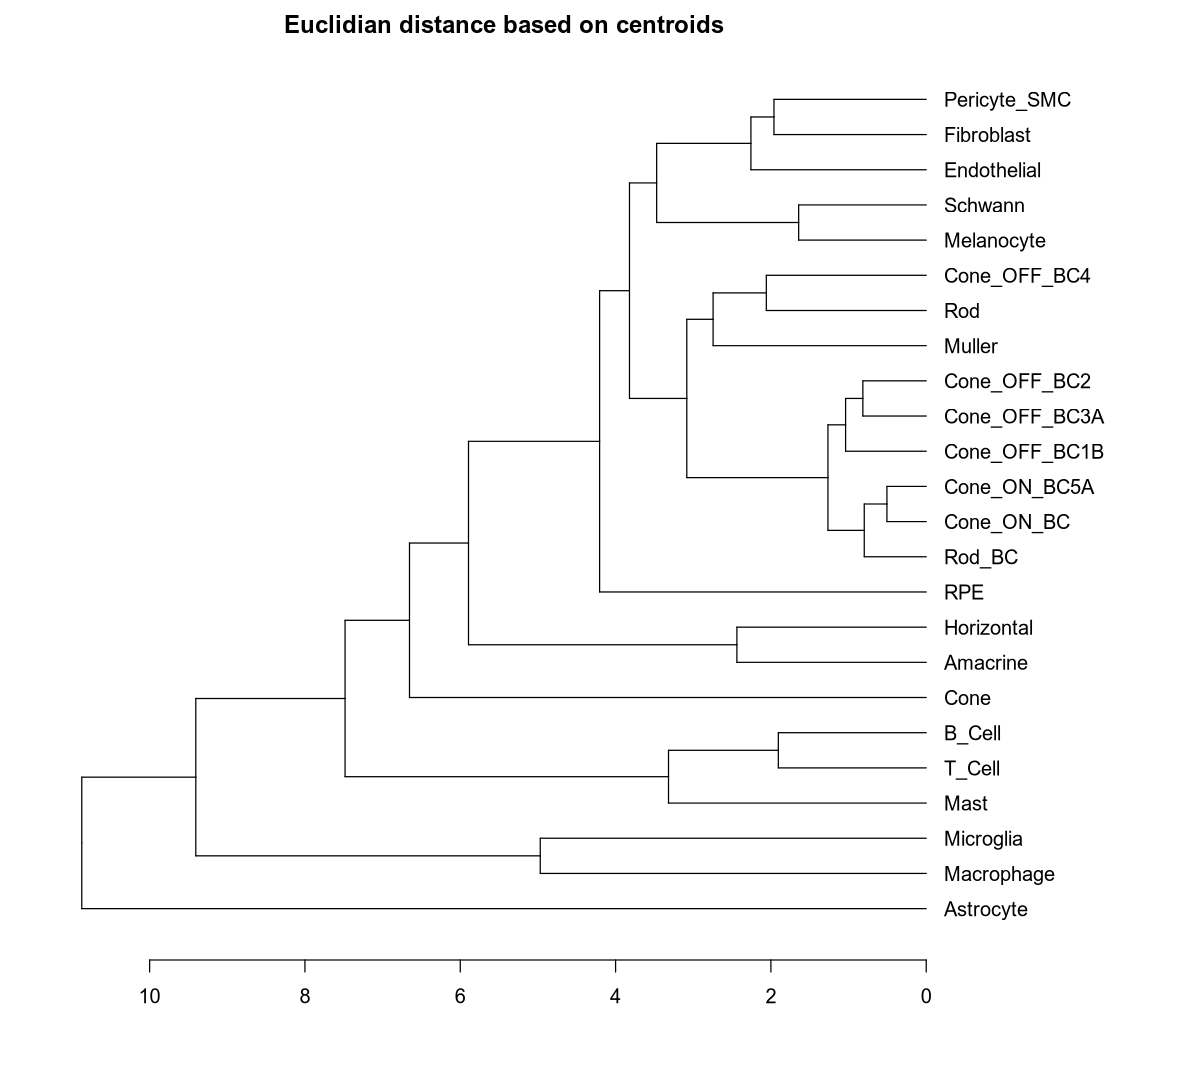

In [321]:
#options(repr.plot.width=10, repr.plot.height=9)
par(mar = c(5, 2, 2, 10))
p<-plot(dend, horiz = TRUE, main = "Euclidian distance based on centroids")

In [325]:
svg("figures/dendrogram_euclidian_centroid.svg", width = 9, height = 7)  # Adjust width/height as needed

# Adjust margins to ensure labels are visible
par(mar = c(5, 2, 2, 10))  # Increase right margin

# Plot with labels on the right and title
plot(dend, horiz = TRUE, main = "Euclidian distance based on centroids")

# Close the SVG device
dev.off()

# Reset margins (optional, if you're plotting interactively afterward)
par(mar = c(5, 4, 4, 2) + 0.1)

pdf 
  2

### filter promoter and gene regions to exclude coding regions

In [326]:
promoter_regions <- promoters(Annotation(all_atac), upstream = 2000, downstream = 200)


In [327]:
all_atac

An object of class Seurat 
70896 features across 16455 samples within 2 assays 
Active assay: peaks (34295 features, 32581 variable features)
 2 layers present: counts, data
 1 other assay present: RNA
 2 dimensional reductions calculated: lsi, umap

In [328]:
# Get the genomic ranges of peaks in object.
peak_ranges <- granges(all_atac)

In [329]:
# Extract peak names directly from Seurat object.
peak_names <- rownames(all_atac)

In [330]:
# Make sure each peak has a name matching the rownames in the original object:
names(peak_ranges) <- rownames(all_atac)

In [359]:
gene_ranges <- Annotation(all_atac)

In [360]:
# Remove peaks overlapping promoter regions.
overlap_promoters <- findOverlaps(peak_ranges, promoter_regions)
promoter_peak_names <- names(peak_ranges)[queryHits(overlap_promoters)]
non_promoter_peaks <- setdiff(rownames(all_atac), promoter_peak_names)

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': KI270711, KI270713, KI270721, KI270727, KI270728, KI270734, KI270726, KI270731
  - in 'y': chrM
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."


In [361]:
# Subset the GRanges object to non-promoter peaks.
non_promoter_ranges <- peak_ranges[non_promoter_peaks]

In [363]:
# Identify peaks (among the non-promoter ones) overlapping gene bodies (including introns).
overlap_genes <- findOverlaps(non_promoter_ranges, gene_ranges)
gene_peak_names <- names(non_promoter_ranges)[queryHits(overlap_genes)]
final_peaks <- setdiff(non_promoter_peaks, gene_peak_names)

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': KI270711, KI270713, KI270721, KI270727, KI270728, KI270734, KI270726, KI270731
  - in 'y': chrM
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."


In [364]:
# Subset original Signac object to include only peaks that do NOT overlap promoters or gene bodies.
atac_filtered <- subset(all_atac, features = final_peaks)

In [365]:
atac_filtered

An object of class Seurat 
6698 features across 16455 samples within 1 assay 
Active assay: peaks (6698 features, 6170 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: lsi, umap

In [366]:
rm(all_atac_non_geneprom)

### Build similarity trees on scATACseq data containing non-promoter and non gene-coding regions

In [367]:
lsi_coords<-Embeddings(atac_filtered, reduction = "lsi")[,2:30]

In [368]:
# Example: assuming cell_type is a factor or character vector
cell_types <- unique(Idents(atac_filtered))

# Compute centroids (mean lsi coordinates) for each cell type
centroids <- do.call(rbind, lapply(cell_types, function(ct) {
  colMeans(lsi_coords[atac_filtered@meta.data$draft_celltype == ct, , drop = FALSE])
}))
rownames(centroids) <- cell_types

# Inspect the centroids
print(centroids)


                    LSI_2       LSI_3      LSI_4        LSI_5        LSI_6
RPE            0.39412033  0.28400306 -1.3654816 -1.324666298 -0.517635148
Melanocyte     0.63187938  1.72559631  0.5533886  0.003793781 -0.702348665
Fibroblast     0.61494554  0.40674736 -0.3059811 -0.553264503  1.558075132
T_Cell         0.12063601  0.20926697  0.3494151 -0.720848278  1.968473657
Macrophage     0.36748143  0.45547153  0.2789923 -0.571307778  2.335369730
Endothelial    0.54074396  0.40918951 -0.3053186 -0.604082131  1.234454972
Mast           0.42231896  0.35472048 -0.6151730 -0.969401192  2.314859118
Pericyte_SMC   0.65331078  0.41102868 -0.2063368 -0.642763556  1.378173641
B_Cell        -0.07142127  0.01418662  0.4421074 -0.888674928  1.830375447
Schwann        0.55242077  0.95338478  0.4451796  0.109074779  0.015385305
Muller         0.79581523 -1.07523935  0.5488740  0.317485336 -0.286799694
Rod           -1.05089158 -0.23657054 -0.0846608  0.264907380 -0.095647167
Rod_BC        -0.34151560

In [369]:
# Compute pairwise Euclidean distances between centroids
d_mat <- dist(centroids)

h<-hclust(d_mat)
dend <- as.dendrogram(h)

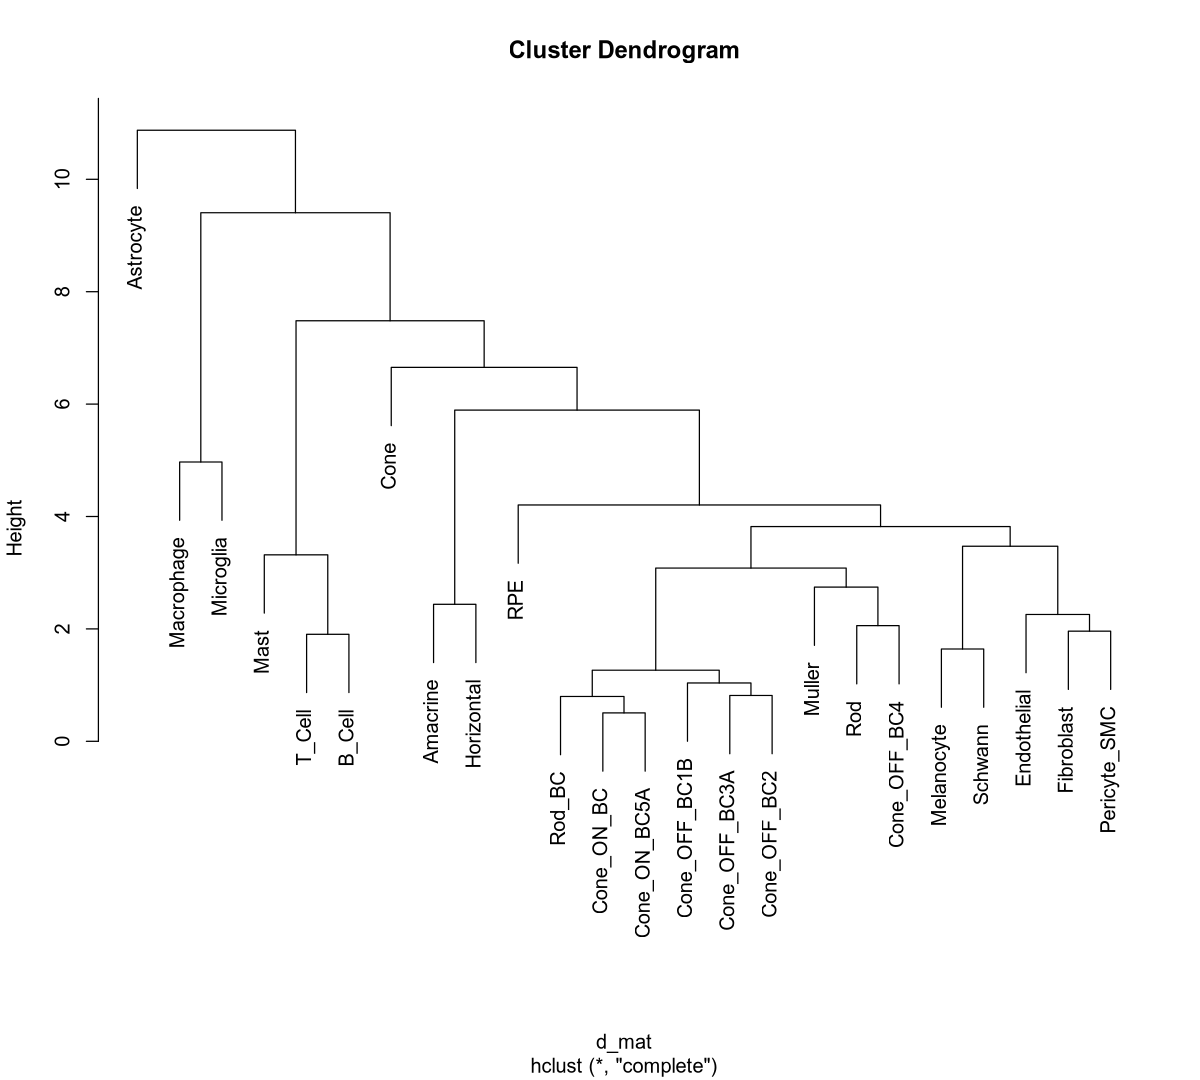

In [371]:
plot(h)

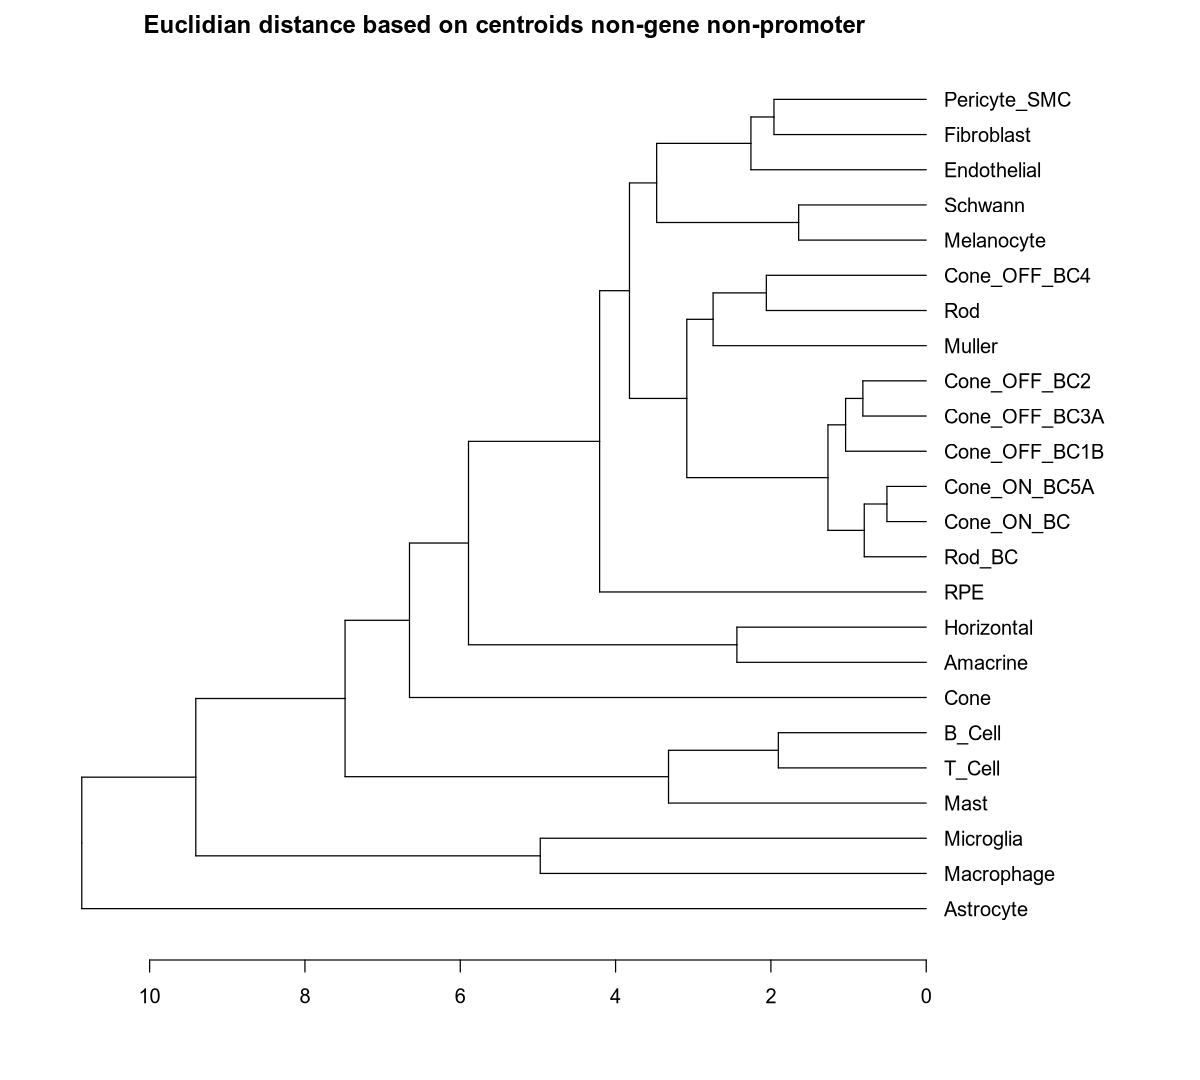

In [370]:
#options(repr.plot.width=10, repr.plot.height=9)
par(mar = c(5, 2, 2, 10))
p<-plot(dend, horiz = TRUE, main = "Euclidian distance based on centroids non-gene non-promoter")

In [372]:
svg("figures/dendrogram_euclidian_centroid_nongene_nonprom.svg", width = 9, height = 7)  # Adjust width/height as needed

# Adjust margins to ensure labels are visible
par(mar = c(5, 2, 2, 10))  # Increase right margin

# Plot with labels on the right and title
plot(dend, horiz = TRUE, main = "Euclidian distance based on centroids")

# Close the SVG device
dev.off()

# Reset margins (optional, if you're plotting interactively afterward)
par(mar = c(5, 4, 4, 2) + 0.1)

pdf 
  2

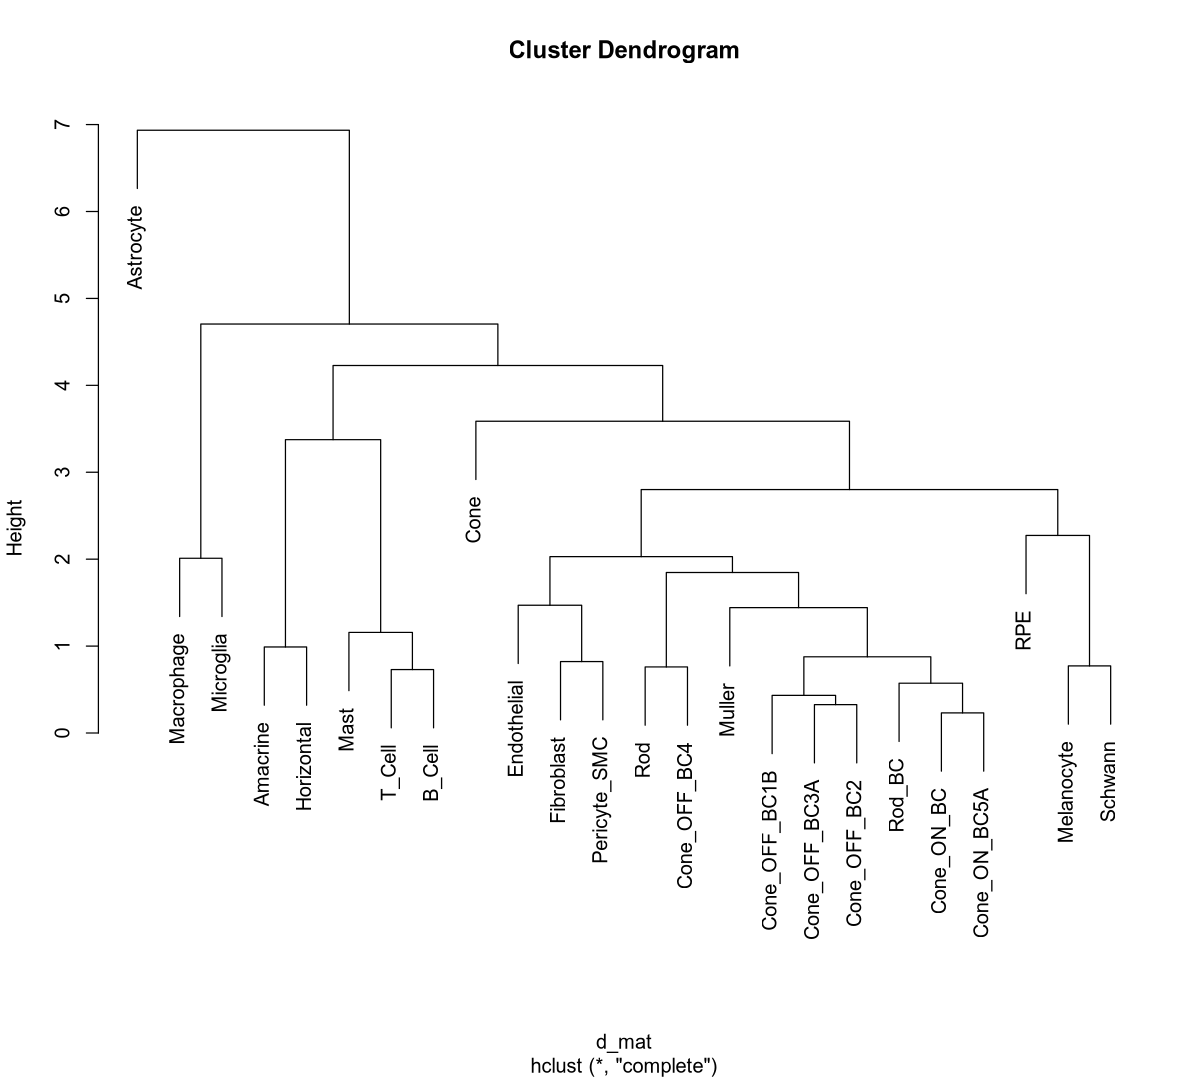

In [373]:
# Compute pairwise maximum distances between centroids
d_mat <- dist(centroids, method = "maximum")

h<-hclust(d_mat)
dend <- as.dendrogram(h)
plot(h)

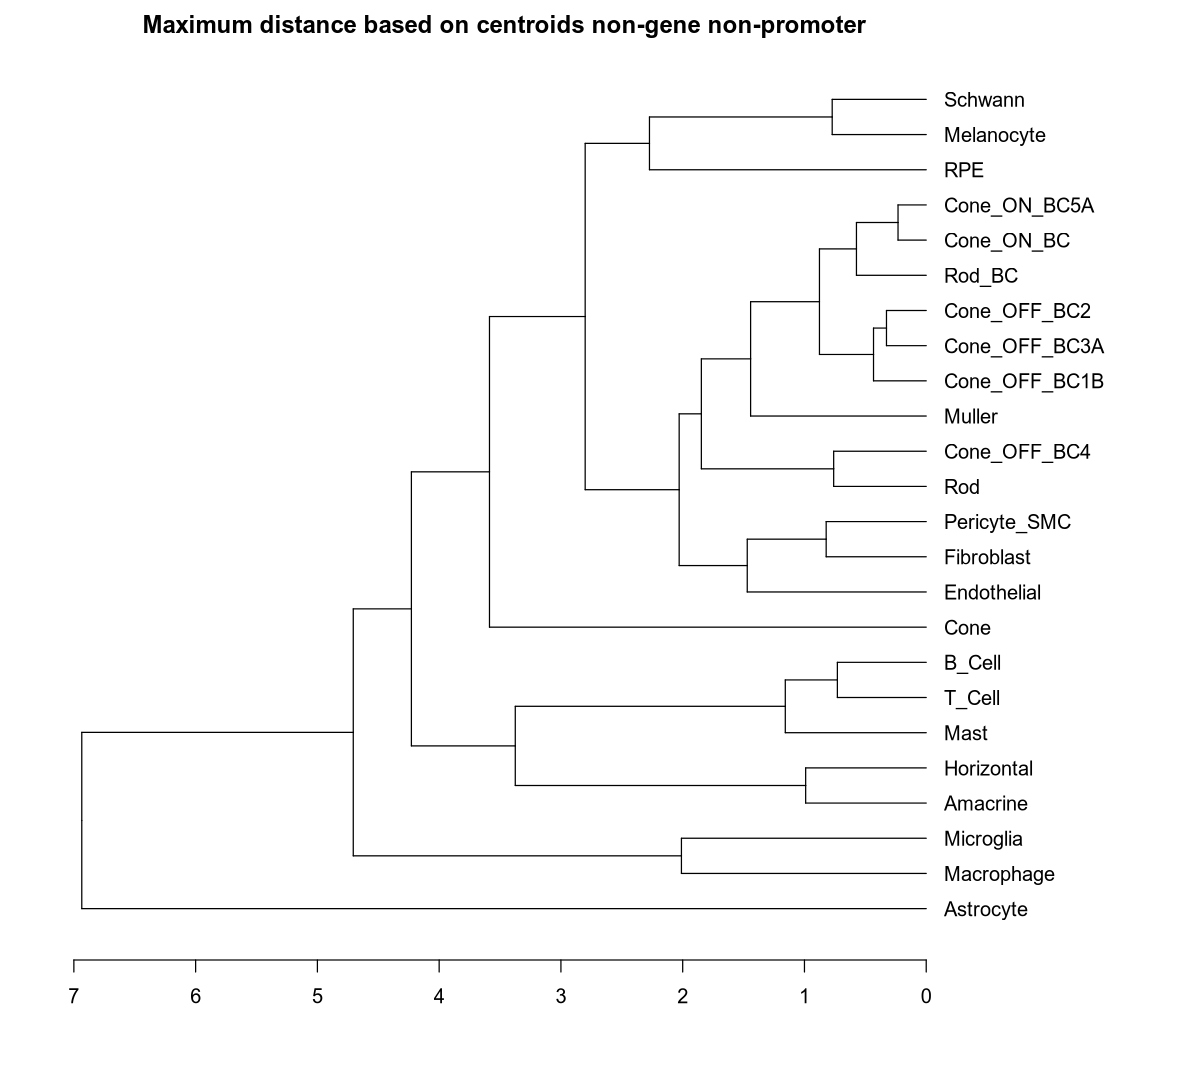

In [374]:
#options(repr.plot.width=10, repr.plot.height=9)
par(mar = c(5, 2, 2, 10))
p<-plot(dend, horiz = TRUE, main = "Maximum distance based on centroids non-gene non-promoter")

In [375]:
svg("figures/dendrogram_maximum_centroid_nongene_nonprom.svg", width = 9, height = 7)  # Adjust width/height as needed

# Adjust margins to ensure labels are visible
par(mar = c(5, 2, 2, 10))  # Increase right margin

# Plot with labels on the right and title
plot(dend, horiz = TRUE, main = "Maximum distance based on centroids non-gene non-promoter")

# Close the SVG device
dev.off()

# Reset margins (optional, if you're plotting interactively afterward)
par(mar = c(5, 4, 4, 2) + 0.1)

pdf 
  2

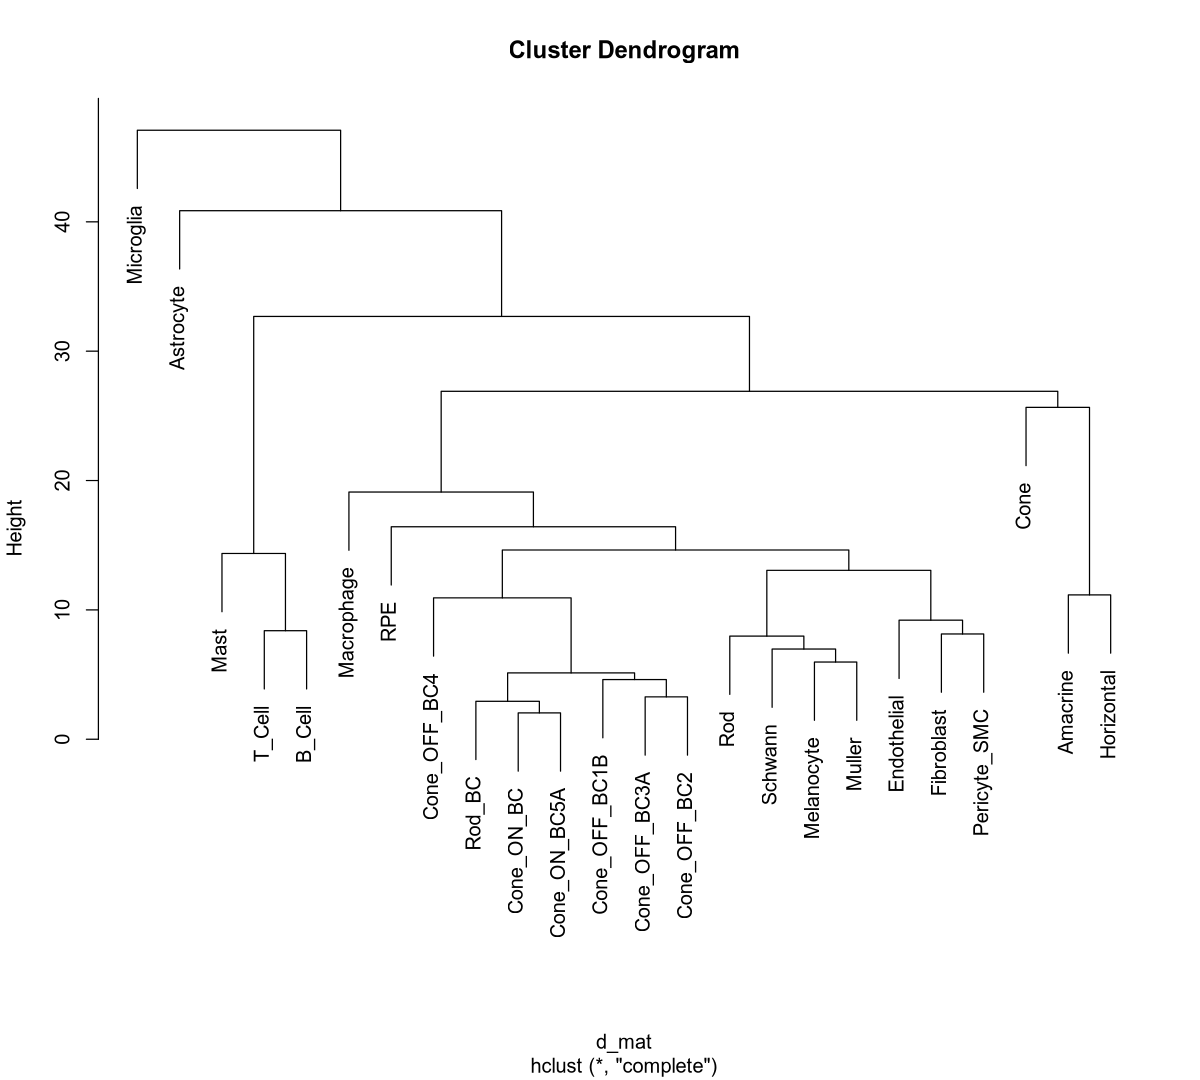

In [376]:
# Compute pairwise Manhattan distances between centroids
d_mat <- dist(centroids, method = "manhattan")

h<-hclust(d_mat)
dend <- as.dendrogram(h)
plot(h)

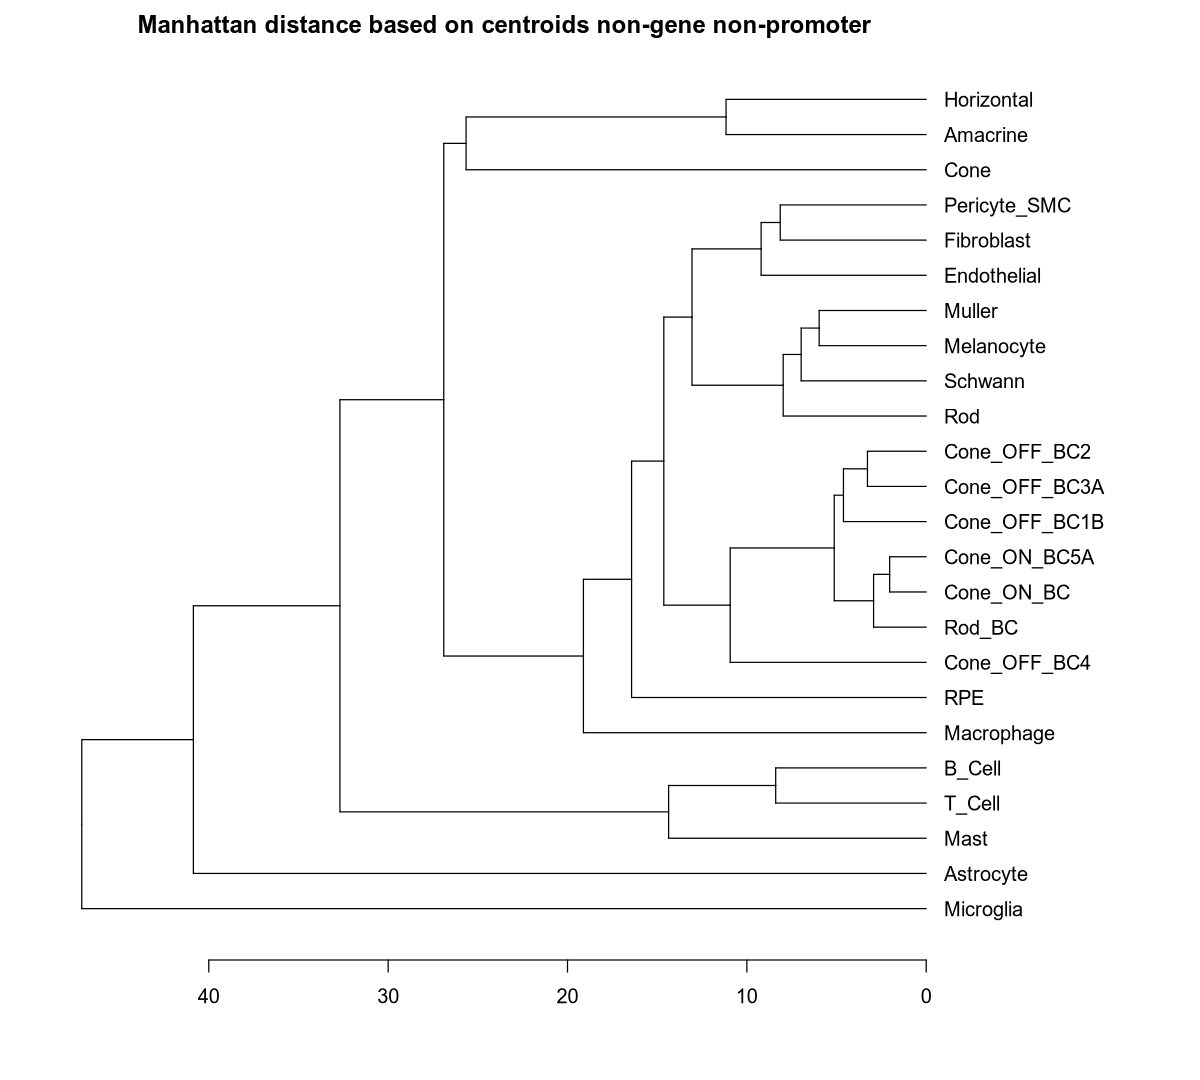

In [377]:
#options(repr.plot.width=10, repr.plot.height=9)
par(mar = c(5, 2, 2, 10))
p<-plot(dend, horiz = TRUE, main = "Manhattan distance based on centroids non-gene non-promoter")

In [378]:
svg("figures/dendrogram_manhattan_centroid_nongene_nonprom.svg", width = 9, height = 7)  # Adjust width/height as needed

# Adjust margins to ensure labels are visible
par(mar = c(5, 2, 2, 10))  # Increase right margin

# Plot with labels on the right and title
plot(dend, horiz = TRUE, main = "Manhattan distance based on centroids non-gene non-promoter")

# Close the SVG device
dev.off()

# Reset margins (optional, if you're plotting interactively afterward)
par(mar = c(5, 4, 4, 2) + 0.1)

pdf 
  2

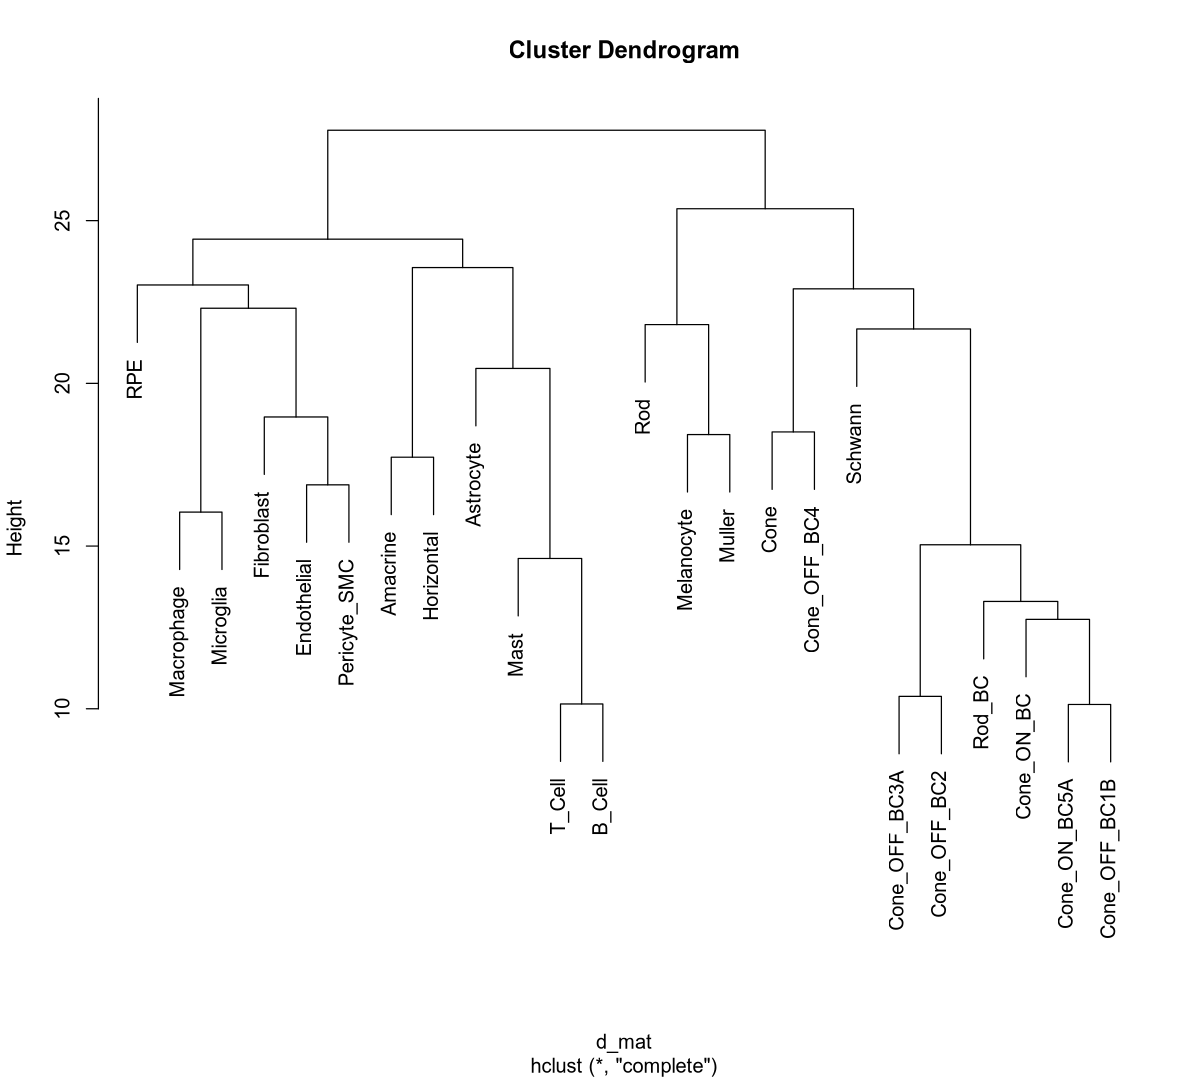

In [379]:
# Compute pairwise canberra distances between centroids
d_mat <- dist(centroids, method = "canberra")

h<-hclust(d_mat)
dend <- as.dendrogram(h)
plot(h)

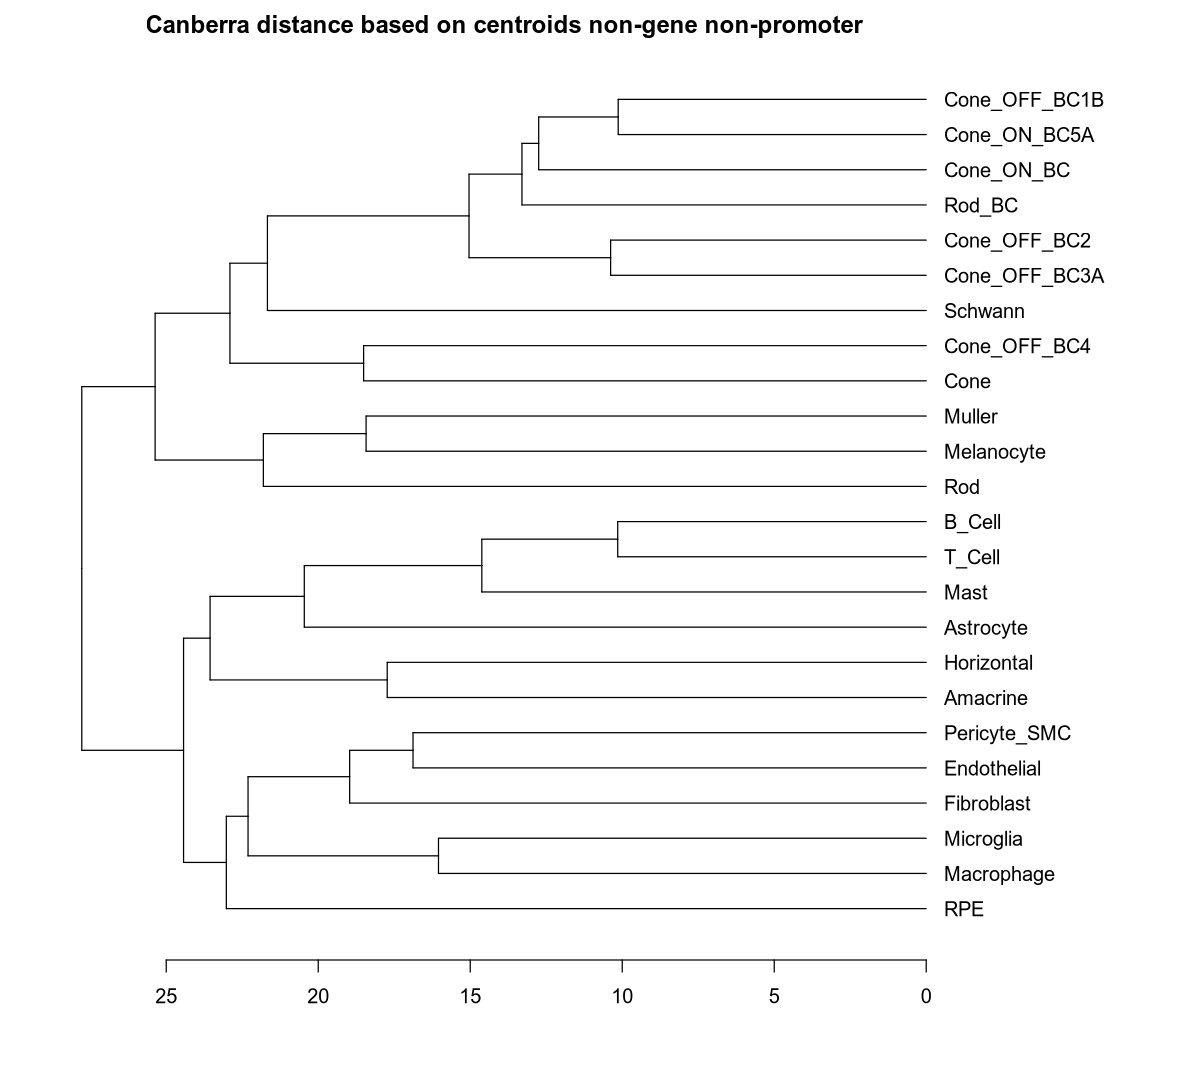

In [383]:
options(repr.plot.width=10, repr.plot.height=9)
par(mar = c(5, 2, 2, 10))
p<-plot(dend, horiz = TRUE, main = "Canberra distance based on centroids non-gene non-promoter")

In [381]:
svg("figures/dendrogram_Canberra_centroid_nongene_nonprom.svg", width = 9, height = 7)  # Adjust width/height as needed

# Adjust margins to ensure labels are visible
par(mar = c(5, 2, 2, 10))  # Increase right margin

# Plot with labels on the right and title
plot(dend, horiz = TRUE, main = "Canberra distance based on centroids non-gene non-promoter")

# Close the SVG device
dev.off()

# Reset margins (optional, if you're plotting interactively afterward)
par(mar = c(5, 4, 4, 2) + 0.1)

pdf 
  2

## Find genes that correlate with opennes of the chromatin within given distance

In [395]:


all_atac <- LinkPeaks(
  object = all_atac,
  peak.assay = "peaks",
  expression.assay = "RNA",
  distance=1000000
)

Testing 24796 genes and 34295 peaks

Found gene coordinates for 16693 genes

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': KI270711, KI270713, KI270721, KI270727, KI270728, KI270734, KI270726, KI270731
  - in 'y': chrM
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."
Warning message:
"UNRELIABLE VALUE: One of the 'future.apply' iterations ('future_lapply-1') unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore"."
Warning message:
"UNRELIABLE VALUE: One of the 'future

In [396]:
Links(all_atac)

GRanges object with 7923 ranges and 5 metadata columns:
         seqnames              ranges strand |      score        gene
            <Rle>           <IRanges>  <Rle> |  <numeric> <character>
     [1]     chr1      933676-1891117      * |  0.1019221        GNB1
     [2]     chr1      999548-1000172      * |  0.0959009        HES4
     [3]     chr1      999548-1001138      * |  0.0706096       ISG15
     [4]     chr1      999548-1434861      * |  0.0518279        VWA1
     [5]     chr1      999548-1891117      * | -0.0732461        GNB1
     ...      ...                 ...    ... .        ...         ...
  [7919]     chrX 145681222-145817832      * |  0.0894085     SLITRK2
  [7920]     chrX 152907281-152914442      * |  0.0547653      ZNF185
  [7921]     chrX 154140559-154144224      * |  0.0566628      OPN1LW
  [7922]     chrX 154369315-154374638      * |  0.0600915        FLNA
  [7923]     chrY   12701231-13480119      * |  0.0503880       USP9Y
                           peak   

### get list of genes that are linked to common differentially open chromatin for RPE and melanocytes to look for processes enrichment in STRING db

In [408]:

write.csv(as.data.frame(GetLinkedGenes(all_atac, features=open_rpe_melano)), 'linked_genes.csv', row.names=FALSE)

## add raw ATAC count data for visualization of peaks

In [457]:
unique(all_atac@meta.data$library)

[1] "control_3_rpe_only"     "control_2_rpe_choroid"  "control_10_retina"     
[4] "control_9_rpe_choroid"  "control_9_retina"       "control_10_rpe_choroid"

In [462]:
counts <- read.csv("GSM7384919_control_3_rpe_only_ATAC_counts.csv", row.names = 1)
head(counts)

In [596]:
head(counts)

draft_celltype library            chr1.180606.181661
AAACCAACACAAAGGT-1_4 NA             control_3_rpe_only 0                 
AAACGCGCACATTGCA-1_4 RPE            control_3_rpe_only 0                 
AAACGGATCACGAATC-1_4 NA             control_3_rpe_only 0                 
AAACGGATCCATCAGG-1_4 NA             control_3_rpe_only 0                 
AAAGCACCAAATACCT-1_4 RPE            control_3_rpe_only 0                 
AAAGCCCGTTCACTGT-1_4 RPE            control_3_rpe_only 0                 
                     chr1.186532.187426 chr1.191042.191932 chr1.267559.268459
AAACCAACACAAAGGT-1_4 0                  0                  0                 
AAACGCGCACATTGCA-1_4 0                  0                  0                 
AAACGGATCACGAATC-1_4 0                  0                  0                 
AAACGGATCCATCAGG-1_4 0                  1                  0                 
AAAGCACCAAATACCT-1_4 0                  0                  0                 
AAAGCCCGTTCACTGT-1_4 0                  0                  0                 
                     chr1.778221.779310 chr1.816780.817769 chr1.818559.819443
AAACCAACACAAAGGT-1_4 0                  0                  0                 
AAACGCGCACATTGCA-1_4 1                  0                  0                 
AAACGGATCACGAATC-1_4 0                  0                  0                 
AAACGGATCCATCAGG-1_4 2                  0                  0                 
AAAGCACCAAATACCT-1_4 0                  0                  0                 
AAAGCCCGTTCACTGT-1_4 1                  0                  0                 
                     chr1.822738.823751 ⋯ KI270728.1.232271.233207
AAACCAACACAAAGGT-1_4 0                  ⋯ 0                       
AAACGCGCACATTGCA-1_4 0                  ⋯ 0                       
AAACGGATCACGAATC-1_4 0                  ⋯ 0                       
AAACGGATCCATCAGG-1_4 0                  ⋯ 0                       
AAAGCACCAAATACCT-1_4 0                  ⋯ 0                       
AAAGCCCGTTCACTGT-1_4 0                  ⋯ 0                       
                     KI270728.1.1457798.1458869 KI270728.1.1459563.1460436
AAACCAACACAAAGGT-1_4 0                          0                         
AAACGCGCACATTGCA-1_4 0                          0                         
AAACGGATCACGAATC-1_4 0                          0                         
AAACGGATCCATCAGG-1_4 0                          0                         
AAAGCACCAAATACCT-1_4 0                          0                         
AAAGCCCGTTCACTGT-1_4 0                          0                         
                     KI270728.1.1464733.1465197 KI270728.1.1791214.1791993
AAACCAACACAAAGGT-1_4 0                          0                         
AAACGCGCACATTGCA-1_4 0                          0                         
AAACGGATCACGAATC-1_4 0                          0                         
AAACGGATCCATCAGG-1_4 0                          0                         
AAAGCACCAAATACCT-1_4 0                          0                         
AAAGCCCGTTCACTGT-1_4 0                          0                         
                     KI270728.1.1792007.1792703 KI270734.1.116811.117745
AAACCAACACAAAGGT-1_4 0                          0                       
AAACGCGCACATTGCA-1_4 0                          0                       
AAACGGATCACGAATC-1_4 0                          0                       
AAACGGATCCATCAGG-1_4 0                          0                       
AAAGCACCAAATACCT-1_4 0                          0                       
AAAGCCCGTTCACTGT-1_4 0                          0                       
                     KI270734.1.121010.121943 KI270734.1.133520.134402
AAACCAACACAAAGGT-1_4 0                        0                       
AAACGCGCACATTGCA-1_4 0                        0                       
AAACGGATCACGAATC-1_4 0                        0                       
AAACGGATCCATCAGG-1_4 0                        0                       
AAAGCACCAAATACCT-1_4 0    

In [ ]:
counts_control_2_rpe_choroid <- read.csv("GSM7384915_control_2_rpe_choroid_ATAC_counts_1.csv", row.names = 1)


In [599]:

head(counts_control_2_rpe_choroid)


draft_celltype library               chr1.180606.181661
AAACAGCCAGCAAATA-1_1 Endothelial    control_2_rpe_choroid 0                 
AAACCAACAGCTAATT-1_1 Melanocyte     control_2_rpe_choroid 0                 
AAACCAACATGTTTGG-1_1 Melanocyte     control_2_rpe_choroid 0                 
AAACCGCGTCCCGGAA-1_1 Fibroblast     control_2_rpe_choroid 0                 
AAACCGCGTTAGCATG-1_1 RPE            control_2_rpe_choroid 0                 
AAACCGGCAGAAACGT-1_1 Fibroblast     control_2_rpe_choroid 0                 
                     chr1.186532.187426 chr1.191042.191932 chr1.267559.268459
AAACAGCCAGCAAATA-1_1 0                  0                  0                 
AAACCAACAGCTAATT-1_1 0                  0                  0                 
AAACCAACATGTTTGG-1_1 0                  0                  0                 
AAACCGCGTCCCGGAA-1_1 0                  0                  0                 
AAACCGCGTTAGCATG-1_1 0                  0                  0                 
AAACCGGCAGAAACGT-1_1 0                  0                  0                 
                     chr1.778221.779310 chr1.816780.817769 chr1.818559.819443
AAACAGCCAGCAAATA-1_1 2                  0                  0                 
AAACCAACAGCTAATT-1_1 0                  0                  0                 
AAACCAACATGTTTGG-1_1 0                  0                  0                 
AAACCGCGTCCCGGAA-1_1 0                  0                  0                 
AAACCGCGTTAGCATG-1_1 0                  0                  0                 
AAACCGGCAGAAACGT-1_1 0                  0                  0                 
                     chr1.822738.823751 ⋯ KI270728.1.232271.233207
AAACAGCCAGCAAATA-1_1 0                  ⋯ 0                       
AAACCAACAGCTAATT-1_1 0                  ⋯ 0                       
AAACCAACATGTTTGG-1_1 0                  ⋯ 0                       
AAACCGCGTCCCGGAA-1_1 0                  ⋯ 0                       
AAACCGCGTTAGCATG-1_1 0                  ⋯ 0                       
AAACCGGCAGAAACGT-1_1 0                  ⋯ 0                       
                     KI270728.1.1457798.1458869 KI270728.1.1459563.1460436
AAACAGCCAGCAAATA-1_1 0                          0                         
AAACCAACAGCTAATT-1_1 0                          0                         
AAACCAACATGTTTGG-1_1 0                          0                         
AAACCGCGTCCCGGAA-1_1 0                          0                         
AAACCGCGTTAGCATG-1_1 0                          0                         
AAACCGGCAGAAACGT-1_1 0                          0                         
                     KI270728.1.1464733.1465197 KI270728.1.1791214.1791993
AAACAGCCAGCAAATA-1_1 0                          0                         
AAACCAACAGCTAATT-1_1 0                          0                         
AAACCAACATGTTTGG-1_1 0                          0                         
AAACCGCGTCCCGGAA-1_1 0                          0                         
AAACCGCGTTAGCATG-1_1 0                          0                         
AAACCGGCAGAAACGT-1_1 0                          0                         
                     KI270728.1.1792007.1792703 KI270734.1.116811.117745
AAACAGCCAGCAAATA-1_1 0                          0                       
AAACCAACAGCTAATT-1_1 0                          0                       
AAACCAACATGTTTGG-1_1 0                          0                       
AAACCGCGTCCCGGAA-1_1 0                          0                       
AAACCGCGTTAGCATG-1_1 0                          0                       
AAACCGGCAGAAACGT-1_1 0                          0                       
                     KI270734.1.121010.121943 KI270734.1.133520.134402
AAACAGCCAGCAAATA-1_1 0                        0                       
AAACCAACAGCTAATT-1_1 0                        0                       
AAACCAACATGTTTGG-1_1 0                        0                       
AAACCGCGTCCCGGAA-1_1 0                        0                       
AAACC

In [ ]:
counts_control_10_retina <- read.csv("GSM7384912_control_10_retina_ATAC_counts(1).csv", row.names = 1)


In [ ]:
counts_control_9_rpe_choroid <- read.csv("GSM7384916_control_9_rpe_choroid_ATAC_counts.csv", row.names = 1)


In [620]:
plan("multicore", workers = 30)

In [737]:
counts_control_9_retina <- read.csv("GSM7384911_control_9_retina_ATAC_counts.csv", row.names = 1)


In [622]:
head(counts_control_9_retina)

draft_celltype library          chr1.9762.10683
AAACAGCCAGTAAGTA-1_2 NA             control_9_retina 0              
AAACAGCCATCCTGAA-1_2 Muller         control_9_retina 0              
AAACATGCAAGGTCCT-1_2 Muller         control_9_retina 0              
AAACATGCAAGTCGCT-1_2 Rod            control_9_retina 0              
AAACATGCAGCAAGTG-1_2 Muller         control_9_retina 0              
AAACATGCATAGCTGC-1_2 Rod            control_9_retina 0              
                     chr1.104534.105431 chr1.180528.181778 chr1.190953.191935
AAACAGCCAGTAAGTA-1_2 0                  0                  0                 
AAACAGCCATCCTGAA-1_2 0                  0                  0                 
AAACATGCAAGGTCCT-1_2 0                  0                  0                 
AAACATGCAAGTCGCT-1_2 0                  0                  0                 
AAACATGCAGCAAGTG-1_2 0                  0                  0                 
AAACATGCATAGCTGC-1_2 0                  0                  0                 
                     chr1.267558.268590 chr1.585745.586652 chr1.778313.779326
AAACAGCCAGTAAGTA-1_2 0                  0                  0                 
AAACAGCCATCCTGAA-1_2 0                  0                  1                 
AAACATGCAAGGTCCT-1_2 0                  0                  0                 
AAACATGCAAGTCGCT-1_2 0                  0                  0                 
AAACATGCAGCAAGTG-1_2 0                  0                  0                 
AAACATGCATAGCTGC-1_2 0                  0                  0                 
                     chr1.794466.795465 ⋯ KI270727.1.52085.52995
AAACAGCCAGTAAGTA-1_2 0                  ⋯ 0                     
AAACAGCCATCCTGAA-1_2 0                  ⋯ 0                     
AAACATGCAAGGTCCT-1_2 0                  ⋯ 0                     
AAACATGCAAGTCGCT-1_2 0                  ⋯ 0                     
AAACATGCAGCAAGTG-1_2 0                  ⋯ 0                     
AAACATGCATAGCTGC-1_2 0                  ⋯ 0                     
                     KI270728.1.232270.233205 KI270728.1.1784786.1785678
AAACAGCCAGTAAGTA-1_2 0                        0                         
AAACAGCCATCCTGAA-1_2 0                        0                         
AAACATGCAAGGTCCT-1_2 0                        0                         
AAACATGCAAGTCGCT-1_2 0                        0                         
AAACATGCAGCAAGTG-1_2 0                        0                         
AAACATGCATAGCTGC-1_2 0                        0                         
                     KI270728.1.1791151.1792048 KI270728.1.1792117.1792594
AAACAGCCAGTAAGTA-1_2 0                          0                         
AAACAGCCATCCTGAA-1_2 0                          0                         
AAACATGCAAGGTCCT-1_2 0                          0                         
AAACATGCAAGTCGCT-1_2 0                          0                         
AAACATGCAGCAAGTG-1_2 0                          0                         
AAACATGCATAGCTGC-1_2 0                          0                         
                     KI270734.1.120993.121945 KI270734.1.163719.164616
AAACAGCCAGTAAGTA-1_2 0                        0                       
AAACAGCCATCCTGAA-1_2 0                        0                       
AAACATGCAAGGTCCT-1_2 0                        0                       
AAACATGCAAGTCGCT-1_2 0                        0                       
AAACATGCAGCAAGTG-1_2 0                        0                       
AAACATGCATAGCTGC-1_2 0                        0                       
                     KI270721.1.2082.2976 KI270726.1.41514.42365
AAACAGCCAGTAAGTA-1_2 0                    0                     
AAACAGCCATCCTGAA-1_2 0                    0                     
AAACATGCAAGGTCCT-1_2 0                    0                     
AAACATGCAAGTCGCT-1_2 0                    0                     
AAACATGCAGCAAGTG-1_2 0                    0                     
AAACATGCATAGCTGC-1_2 0                    0                     
   

In [ ]:
counts_control_10_rpe_choroid <- read.csv("GSM7384917_control_10_rpe_choroid_ATAC_counts.csv", row.names = 1)


In [631]:
head(counts)[1:5]

draft_celltype library            chr1.180606.181661
AAACCAACACAAAGGT-1_4 NA             control_3_rpe_only 0                 
AAACGCGCACATTGCA-1_4 RPE            control_3_rpe_only 0                 
AAACGGATCACGAATC-1_4 NA             control_3_rpe_only 0                 
AAACGGATCCATCAGG-1_4 NA             control_3_rpe_only 0                 
AAAGCACCAAATACCT-1_4 RPE            control_3_rpe_only 0                 
AAAGCCCGTTCACTGT-1_4 RPE            control_3_rpe_only 0                 
                     chr1.186532.187426 chr1.191042.191932
AAACCAACACAAAGGT-1_4 0                  0                 
AAACGCGCACATTGCA-1_4 0                  0                 
AAACGGATCACGAATC-1_4 0                  0                 
AAACGGATCCATCAGG-1_4 0                  1                 
AAAGCACCAAATACCT-1_4 0                  0                 
AAAGCCCGTTCACTGT-1_4 0                  0

In [633]:
tail(all_atac@meta.data)

orig.ident    nCount_peaks nFeature_peaks draft_celltype
TTTGTGTTCTCCTCTT-1_6 SeuratProject NA           NA             Melanocyte    
TTTGTTGGTGCGCGTA-1_6 SeuratProject NA           NA             Melanocyte    
TTTGTTGGTGGATTCA-1_6 SeuratProject NA           NA             RPE           
TTTGTTGGTTCGCTTG-1_6 SeuratProject NA           NA             Fibroblast    
TTTGTTGGTTGTTGCT-1_6 SeuratProject NA           NA             Melanocyte    
TTTGTTGGTTTGCTGT-1_6 SeuratProject NA           NA             Melanocyte    
                     library                peaks_snn_res.0.3 seurat_clusters
TTTGTGTTCTCCTCTT-1_6 control_10_rpe_choroid 2                 2              
TTTGTTGGTGCGCGTA-1_6 control_10_rpe_choroid 2                 2              
TTTGTTGGTGGATTCA-1_6 control_10_rpe_choroid 4                 4              
TTTGTTGGTTCGCTTG-1_6 control_10_rpe_choroid 3                 3              
TTTGTTGGTTGTTGCT-1_6 control_10_rpe_choroid 2                 2              
TTTGTTGGTTTGCTGT-1_6 control_10_rpe_choroid 2                 2              
                     atac_names                     
TTTGTGTTCTCCTCTT-1_6 Melanocyte                     
TTTGTTGGTGCGCGTA-1_6 Melanocyte                     
TTTGTTGGTGGATTCA-1_6 RPE                            
TTTGTTGGTTCGCTTG-1_6 Pericyte_Fibroblast_Endothelial
TTTGTTGGTTGTTGCT-1_6 Melanocyte                     
TTTGTTGGTTTGCTGT-1_6 Melanocyte

In [732]:
#(control_3_rpe_only)
#counts=subset(counts, select = -c(1,2))
counts_matrix <- t(as.matrix(counts))
rownames(counts_matrix) <- gsub("\\.", "-", rownames(counts_matrix))

# Create an assay object with the normalized counts in the counts slot.
peaks_assay <- CreateChromatinAssay(counts = counts_matrix,assay='ATAC')
# Extract the cell names as a character vector
old_names <- colnames(peaks_assay)
# Remove the last two characters from each cell name
new_names <- substr(old_names, 1, nchar(old_names) - 2)
# Update the Seurat object with the new cell names
colnames(peaks_assay) <- new_names
##add _1 so it matches existing object
colnames(peaks_assay) <- paste0(colnames(peaks_assay), "_1")


Warning message:
"Expected 3 pieces. Additional pieces discarded in 156 rows [221016, 221017,
221018, 221019, 221020, 221021, 221022, 221023, 221024, 221025, 221026, 221027,
221028, 221029, 221030, 221031, 221032, 221033, 221034, 221035, ...]."
Warning message in CreateChromatinAssay(counts = counts_matrix, assay = "ATAC"):
"Overlapping ranges supplied. Ranges should be non-overlapping."


In [ ]:
##control_2_rpe_choroid
counts_control_2_rpe_choroid=subset(counts_control_2_rpe_choroid, select = -c(1,2))
counts_matrix <- t(as.matrix(counts_control_2_rpe_choroid))
rownames(counts_matrix) <- gsub("\\.", "-", rownames(counts_matrix))

# Create an assay object with the normalized counts in the counts slot.
peaks_assay_2_rpe_choroid <- CreateChromatinAssay(counts = counts_matrix,assay='ATAC')
# Extract the cell names as a character vector
old_names <- colnames(peaks_assay_2_rpe_choroid)
# Remove the last two characters from each cell name
new_names <- substr(old_names, 1, nchar(old_names) - 2)
# Update the Seurat object with the new cell names
colnames(peaks_assay_2_rpe_choroid) <- new_names
##add _1 so it matches existing object
colnames(peaks_assay_2_rpe_choroid) <- paste0(colnames(peaks_assay_2_rpe_choroid), "_2")
peaks_assay_2_rpe_choroid

In [ ]:
#counts_control_10_retina
counts_control_10_retina=subset(counts_control_10_retina, select = -c(1,2))

counts_matrix <- t(as.matrix(counts_control_10_retina))
rownames(counts_matrix) <- gsub("\\.", "-", rownames(counts_matrix))

# Create an assay object with the normalized counts in the counts slot.
peaks_assay_10_retina <- CreateChromatinAssay(counts = counts_matrix,assay='ATAC')
# Extract the cell names as a character vector
old_names <- colnames(peaks_assay_10_retina)
# Remove the last two characters from each cell name
new_names <- substr(old_names, 1, nchar(old_names) - 2)
# Update the Seurat object with the new cell names
colnames(peaks_assay_10_retina) <- new_names
##add _1 so it matches existing object
colnames(peaks_assay_10_retina) <- paste0(colnames(peaks_assay_10_retina), "_3")
peaks_assay_10_retina

In [ ]:
#counts_control_9_rpe_choroid
counts_control_9_rpe_choroid=subset(counts_control_9_rpe_choroid, select = -c(1,2))

counts_matrix <- t(as.matrix(counts_control_9_rpe_choroid))
rownames(counts_matrix) <- gsub("\\.", "-", rownames(counts_matrix))

# Create an assay object with the normalized counts in the counts slot.
peaks_assay_9_rpe_choroid <- CreateChromatinAssay(counts = counts_matrix,assay='ATAC')
# Extract the cell names as a character vector
old_names <- colnames(peaks_assay_9_rpe_choroid)
# Remove the last two characters from each cell name
new_names <- substr(old_names, 1, nchar(old_names) - 2)
# Update the Seurat object with the new cell names
colnames(peaks_assay_9_rpe_choroid) <- new_names
##add _1 so it matches existing object
colnames(peaks_assay_9_rpe_choroid) <- paste0(colnames(peaks_assay_9_rpe_choroid), "_4")
peaks_assay_9_rpe_choroid

In [ ]:
#counts_control_9_retina
counts_control_9_retina=subset(counts_control_9_retina, select = -c(1,2))

counts_matrix <- t(as.matrix(counts_control_9_retina))
rownames(counts_matrix) <- gsub("\\.", "-", rownames(counts_matrix))

# Create an assay object with the normalized counts in the counts slot.
peaks_assay_9_retina <- CreateChromatinAssay(counts = counts_matrix,assay='ATAC')
# Extract the cell names as a character vector
old_names <- colnames(peaks_assay_9_retina)
# Remove the last two characters from each cell name
new_names <- substr(old_names, 1, nchar(old_names) - 2)
# Update the Seurat object with the new cell names
colnames(peaks_assay_9_retina) <- new_names
##add _1 so it matches existing object
colnames(peaks_assay_9_retina) <- paste0(colnames(peaks_assay_9_retina), "_5")
peaks_assay_9_retina


In [ ]:
#counts_control_10_rpe_choroid
counts_control_10_rpe_choroid=subset(counts_control_10_rpe_choroid, select = -c(1,2))

counts_matrix <- t(as.matrix(counts_control_10_rpe_choroid))
rownames(counts_matrix) <- gsub("\\.", "-", rownames(counts_matrix))

# Create an assay object with the normalized counts in the counts slot.
peaks_assay_10_rpe_choroid <- CreateChromatinAssay(counts = counts_matrix,assay='ATAC')
# Extract the cell names as a character vector
old_names <- colnames(peaks_assay_10_rpe_choroid)
# Remove the last two characters from each cell name
new_names <- substr(old_names, 1, nchar(old_names) - 2)
# Update the Seurat object with the new cell names
colnames(peaks_assay_10_rpe_choroid) <- new_names
##add _1 so it matches existing object
colnames(peaks_assay_10_rpe_choroid) <- paste0(colnames(peaks_assay_10_rpe_choroid), "_6")
peaks_assay_10_rpe_choroid


In [677]:
object_2_rpe_choroid <- CreateSeuratObject(counts = peaks_assay_2_rpe_choroid$counts, assay = "peaks")

In [680]:
object_counts <- CreateSeuratObject(counts = peaks_assay$counts, assay = "peaks")

In [681]:
object_10_retina <- CreateSeuratObject(counts = peaks_assay_10_retina$counts, assay = "peaks")
object_9_rpe_choroid <- CreateSeuratObject(counts = peaks_assay_9_rpe_choroid$counts, assay = "peaks")
object_9_retina <- CreateSeuratObject(counts = peaks_assay_9_retina$counts, assay = "peaks")
object_10_rpe_choroid <- CreateSeuratObject(counts = peaks_assay_10_rpe_choroid$counts, assay = "peaks")



In [ ]:
##
atac_counts <- merge(object_counts, y = c(object_2_rpe_choroid, object_10_retina,object_9_rpe_choroid,
                                object_9_retina, object_10_rpe_choroid), 
                                project = "RPE_Melano",merge.data = TRUE)

In [685]:
atac_counts <- JoinLayers(atac_counts)

In [ ]:
atac_counts[['peaks']]$counts

  [[ suppressing 31 column names 'AAACCAACACAAAGGT-1_1', 'AAACGCGCACATTGCA-1_1', 'AAACGGATCACGAATC-1_1' ... ]]

  [[ suppressing 31 column names 'AAACCAACACAAAGGT-1_1', 'AAACGCGCACATTGCA-1_1', 'AAACGGATCACGAATC-1_1' ... ]]

  [[ suppressing 31 column names 'AAACCAACACAAAGGT-1_1', 'AAACGCGCACATTGCA-1_1', 'AAACGGATCACGAATC-1_1' ... ]]



396593 x 21962 sparse Matrix of class "dgCMatrix"
                                                                                           
chr1-778221-779310     . 1 . 2 . 1 . . . . . . . . . . 1 . 1 2 . . . . 1 . . 1 . . . ......
chr1-816780-817769     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
chr1-818559-819443     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
chr1-822738-823751     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
chr1-827045-827977     . . . 1 . . . . . . . . . . . . . . . 1 . . . . . . . . . . . ......
chr1-869462-870443     . . . . . . . 1 . . . . . . . . . . . . . . . . . . . . . . . ......
chr1-876462-877264     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
chr1-878577-879752     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
chr1-890414-891303     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
chr1-904278-905195     . . . .

In [699]:
all(colnames(atac_counts) == colnames(all_atac))

Warning message in colnames(atac_counts) == colnames(all_atac):
"longer object length is not a multiple of shorter object length"


[1] FALSE

In [ ]:
# Subset RNA data
atac_counts <- subset(atac_counts, cells = all_atac[,1])

# Subset ATAC data
all_atac <- subset(all_atac, cells = all_atac[,1])

In [676]:
all_atac

An object of class Seurat 
70896 features across 16455 samples within 2 assays 
Active assay: peaks (34295 features, 32581 variable features)
 2 layers present: counts, data
 1 other assay present: RNA
 2 dimensional reductions calculated: lsi, umap

In [691]:
saveRDS(all_atac, "all_atac_norm_data.rds")

In [ ]:
all_atac@assays$peaks@counts <- all_atac@assays$peaks@data

In [705]:
atac_counts@assays$peaks

Assay (v5) data with 396593 features for 21962 cells
First 10 features:
 chr1-778221-779310, chr1-816780-817769, chr1-818559-819443,
chr1-822738-823751, chr1-827045-827977, chr1-869462-870443,
chr1-876462-877264, chr1-878577-879752, chr1-890414-891303,
chr1-904278-905195 
Layers:
 counts 

In [ ]:
#all_atac[["peaks"]]$counts <- NULL

In [706]:
atac_counts_subset <- atac_counts[, colnames(all_atac), drop = FALSE]

Warning message:
"The following arguments are not used: drop"


In [707]:
atac_counts_subset

An object of class Seurat 
396593 features across 16455 samples within 1 assay 
Active assay: peaks (396593 features, 0 variable features)
 1 layer present: counts

In [709]:
all_atac

An object of class Seurat 
70896 features across 16455 samples within 2 assays 
Active assay: peaks (34295 features, 32581 variable features)
 2 layers present: counts, data
 1 other assay present: RNA
 2 dimensional reductions calculated: lsi, umap

In [714]:
# change the current plan to access parallelization
plan("multicore", workers = 30)
plan()

multicore:
- args: function (..., workers = 30, envir = parent.frame())
- tweaked: TRUE
- call: plan("multicore", workers = 30)

In [716]:
all_atac[["ATAC"]] <- CreateAssayObject(counts = atac_counts_subset[["peaks"]]$counts)

In [725]:
all_atac[["ATAC"]] <- NULL

In [727]:

all_atac[["ATAC"]] <- CreateChromatinAssay(counts=atac_counts_subset[["peaks"]]$counts, fragments = Fragments(all_atac[["peaks"]]))

Warning message:
"Expected 3 pieces. Additional pieces discarded in 236 rows [221016, 221017,
221018, 221019, 221020, 221021, 221022, 221023, 221024, 221025, 221026, 221027,
221028, 221029, 221030, 221031, 221032, 221033, 221034, 221035, ...]."
Warning message in CreateChromatinAssay(counts = atac_counts_subset[["peaks"]]$counts, :
"Overlapping ranges supplied. Ranges should be non-overlapping."
Warning message:
"Non-unique features (rownames) present in the input matrix, making unique"


In [738]:
###check here
all_atac[["ATAC"]]

ChromatinAssay data with 396593 features for 16455 cells
Variable features: 0 
Genome: 
Annotation present: FALSE 
Motifs present: FALSE 
Fragment files: 6 

In [740]:
library(BSgenome.Hsapiens.UCSC.hg38)

set.seed(1234)

In [741]:
annotation <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v86)

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warn

In [743]:
DefaultAssay(all_atac) <- "ATAC"

In [744]:
# remove peaks on nonstandard chromosomes and in genomic blacklist regions
peaks <- keepStandardChromosomes(granges(all_atac), pruning.mode = "coarse")
peaks <- subsetByOverlaps(x = peaks, ranges = blacklist_hg38_unified, invert = TRUE)

In [745]:
# Convert to character vector in 'chr-start-end' format
rownames_format <- paste0(seqnames(peaks), "-", start(peaks), "-", end(peaks))

In [746]:
current_features <- rownames(all_atac[["ATAC"]])

In [747]:
all_atac[["ATAC"]] <- subset(all_atac[["ATAC"]], features = rownames_format)

Warning message:
"Different cells and/or features from existing assay ATAC"


In [748]:
all_atac

An object of class Seurat 
466305 features across 16455 samples within 3 assays 
Active assay: ATAC (395409 features, 0 variable features)
 2 layers present: counts, data
 2 other assays present: peaks, RNA
 2 dimensional reductions calculated: lsi, umap

In [749]:
rm(rownames_format,current_features, peaks)

In [750]:
GenomeInfoDb::seqlevelsStyle(annotation) <- "UCSC"

In [751]:
genome(annotation) = "hg38"

In [752]:
Annotation(all_atac[["ATAC"]])<- annotation

In [753]:
DefaultAssay(all_atac) <- "ATAC"
# first compute the GC content for each peak
all_atac <- RegionStats(all_atac, genome = BSgenome.Hsapiens.UCSC.hg38)

Warning message in RegionStats.default(object = regions, genome = genome, verbose = verbose, :
"Not all seqlevels present in supplied genome"


In [754]:
rm(annotation)

In [757]:
all_atac <- NucleosomeSignal(all_atac)
all_atac <- TSSEnrichment(all_atac, fast = FALSE)

Extracting TSS positions

Finding + strand cut sites

Finding - strand cut sites

Computing mean insertion frequency in flanking regions

Normalizing TSS score



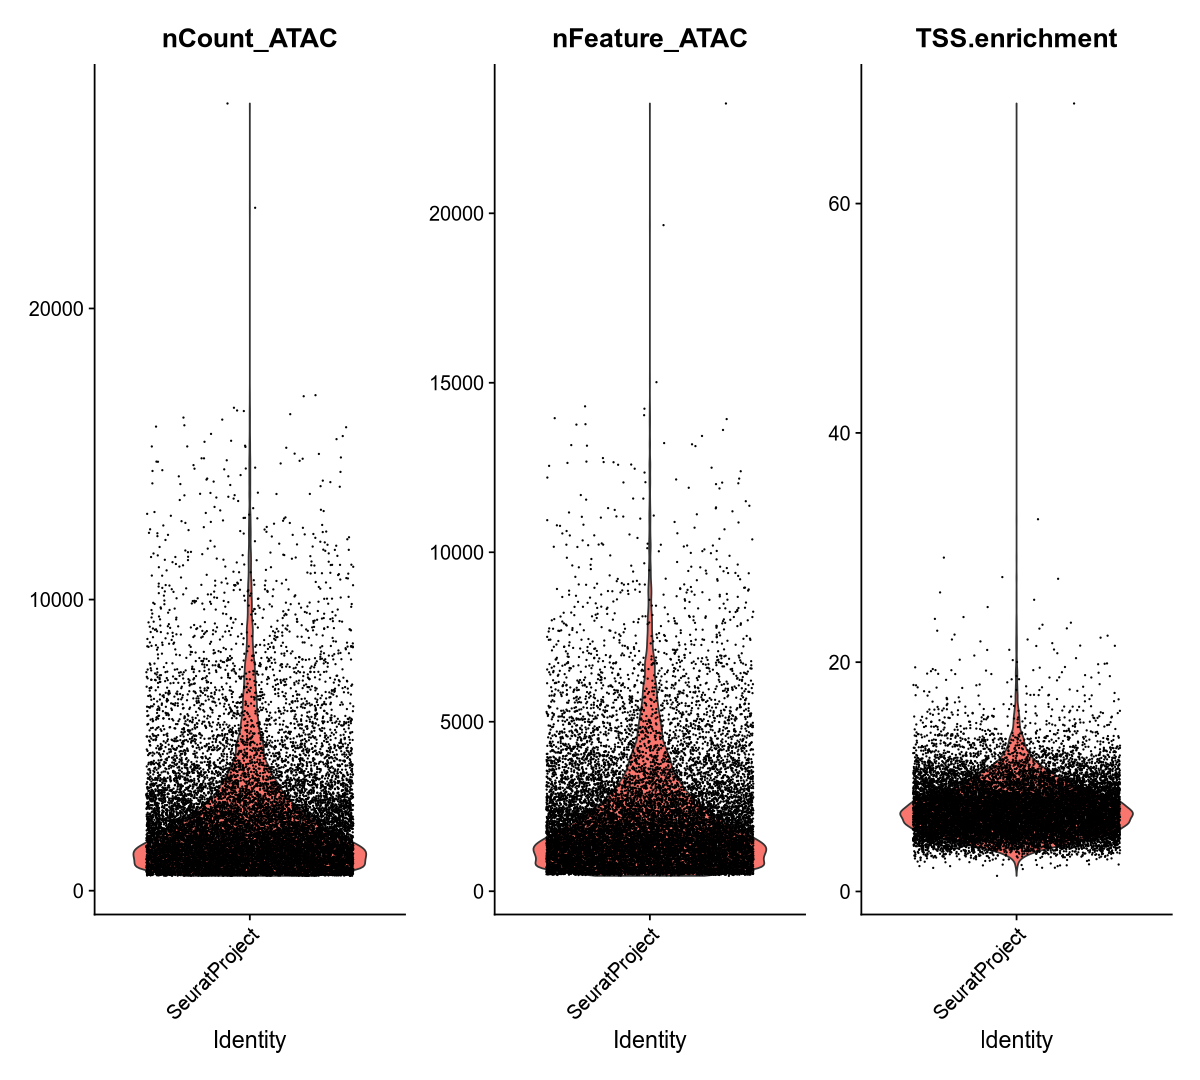

In [758]:
# Visualize QC metrics as a violin plot
VlnPlot(all_atac, features = c("nCount_ATAC", "nFeature_ATAC", "TSS.enrichment"), ncol = 3, group.by = 'orig.ident')

In [759]:
all_atac <- subset(all_atac, subset = nCount_ATAC < 5000)
all_atac <- subset(all_atac, subset = TSS.enrichment > 2)
all_atac <- subset(all_atac, subset = TSS.enrichment < 15)

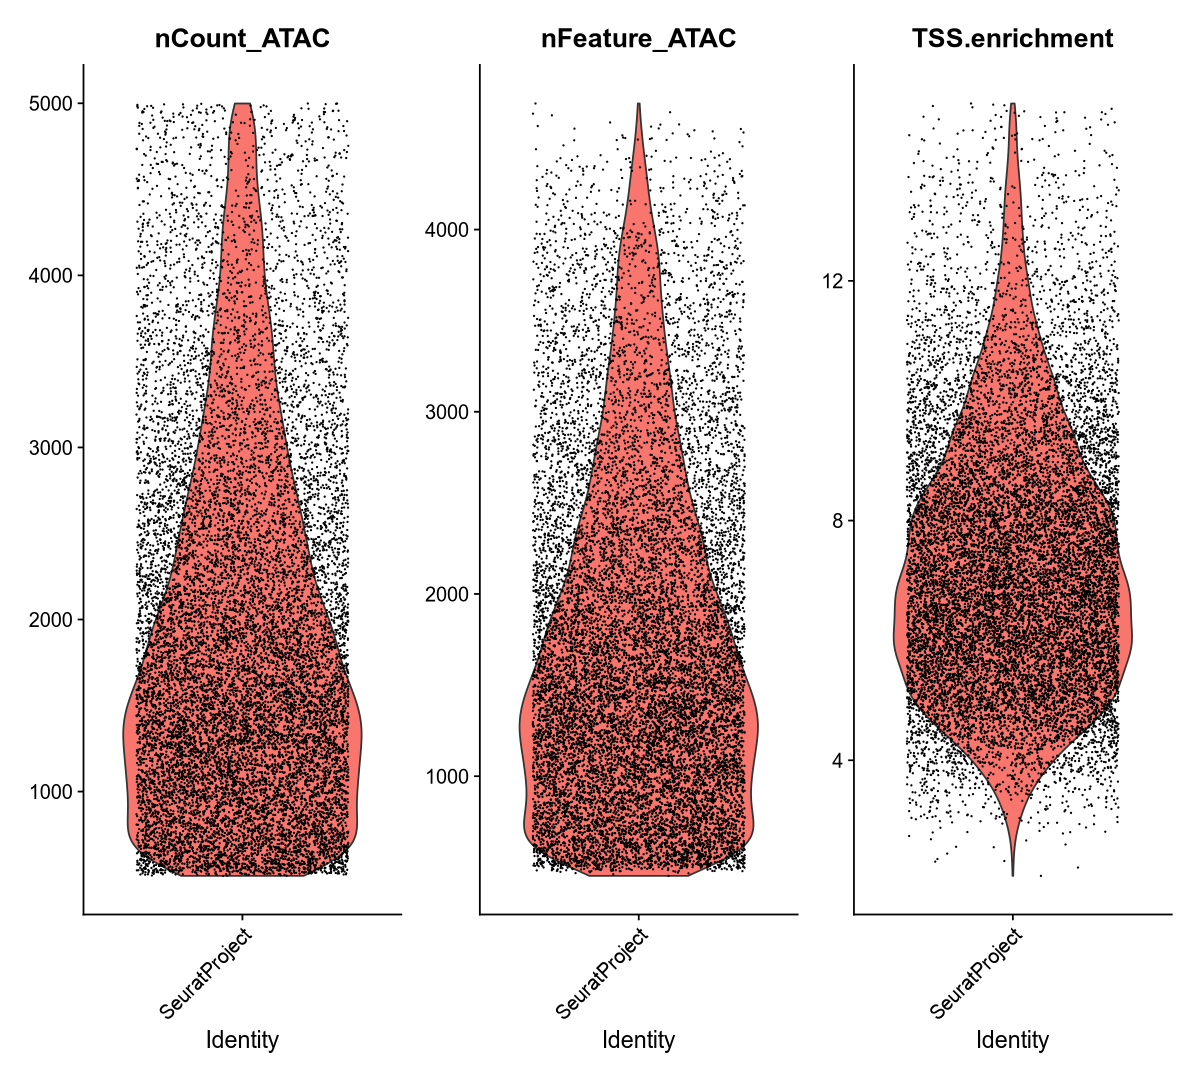

In [760]:
# Visualize QC metrics as a violin plot
VlnPlot(all_atac, features = c("nCount_ATAC", "nFeature_ATAC", "TSS.enrichment"), ncol = 3, group.by = 'orig.ident')


In [771]:
all_atac <- LinkPeaks(
  object = all_atac,
  peak.assay = "ATAC",
  expression.assay = "RNA",
  distance=1000000
)
all_atac_links=as.data.frame(Links(all_atac))
write.csv(all_atac_links, 'links_all_1mbp_multiom.csv')

Testing 24138 genes and 257940 peaks

Found gene coordinates for 16511 genes

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': GL000009, GL000194, GL000195, GL000205, GL000218, GL000219, KI270711, KI270713, KI270721, KI270726, KI270727, KI270728, KI270731, KI270734
  - in 'y': chrM
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."
Warning message:
"UNRELIABLE VALUE: One of the 'future.apply' iterations ('future_lapply-1') unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ign

In [778]:
all_atac <- FindTopFeatures(all_atac, min.cutoff = 5)
all_atac <- RunTFIDF(all_atac)
all_atac <- RunSVD(all_atac)

Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, layer = "counts"), :
"Some features contain 0 total counts"
Running SVD

Scaling cell embeddings



#### check differential accessibility by the way of subsetting markers(still got the same pathway enrichment) 

In [779]:
# change back to working with peaks instead of gene activities
DefaultAssay(all_atac) <- 'ATAC'

# wilcox is the default option for test.use
da_peak_common <- FindMarkers(
  object = all_atac,
  ident.1 = c("RPE","Melanocyte"),
  test.use = 'wilcox',
  min.pct = 0.1
)



In [882]:
# change back to working with peaks instead of gene activities
DefaultAssay(all_atac) <- 'ATAC'

# wilcox is the default option for test.use
da_peak_rpe <- FindMarkers(
  object = all_atac,
  ident.1 = c("RPE"),
  test.use = 'wilcox',
  min.pct = 0.1
)


In [884]:
open_rpe<- rownames(da_peak_rpe[da_peak_rpe$avg_log2FC > 2 & da_peak_rpe$p_val_adj<0.05, ])

In [883]:
## "Melanocyte"
da_peak_melano <- FindMarkers(
  object = all_atac,
  ident.1 = c("Melanocyte"),
  test.use = 'wilcox',
  min.pct = 0.1
)


In [886]:
open_melano<- rownames(da_peak_melano[da_peak_melano$avg_log2FC > 2 & da_peak_melano$p_val_adj<0.05, ])

In [897]:
subset_common<- open_melano[open_melano %in% open_rpe]

In [819]:
open_rpe_melano<- rownames(da_peak_common[da_peak_common$avg_log2FC > 3 & da_peak_common$p_val_adj<0.05, ])

In [833]:
da_peak_common[da_peak_common$avg_log2FC > 3 & da_peak_common$p_val_adj<0.05, ]

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
chr19-6509080-6510210      0.000000e+00 6.431469   0.137 0.002  0.000000e+00
chr2-238187723-238188925   0.000000e+00 5.996777   0.136 0.002  0.000000e+00
chr6-108002208-108003434   0.000000e+00 5.939979   0.182 0.003  0.000000e+00
chr13-110092590-110093550  0.000000e+00 5.861662   0.169 0.003  0.000000e+00
chr10-71980916-71982009    0.000000e+00 5.832702   0.172 0.003  0.000000e+00
chr7-99357843-99359048     0.000000e+00 5.709837   0.157 0.003  0.000000e+00
chr5-160458726-160459827   0.000000e+00 5.648505   0.134 0.003  0.000000e+00
chr15-31101293-31103342    0.000000e+00 5.601497   0.218 0.005  0.000000e+00
chr15-31279797-31280896    0.000000e+00 5.507136   0.138 0.003  0.000000e+00
chr2-95333320-95334703     0.000000e+00 5.441100   0.138 0.003  0.000000e+00
chr17-81384850-81386229    0.000000e+00 5.440326   0.151 0.003  0.000000e+00
chr8-129551784-129552721   0.000000e+00 5.428113   0.165 0.004  0.000000e+00
chr1-116432999-116434075   0.000000e+00 5.382364   0.183 0.004  0.000000e+00
chr1-9441249-9442307       0.000000e+00 5.375445   0.147 0.004  0.000000e+00
chr2-222290268-222291997   0.000000e+00 5.245766   0.155 0.004  0.000000e+00
chr8-127944831-127946056   0.000000e+00 5.229870   0.143 0.004  0.000000e+00
chr6-109793684-109794840   0.000000e+00 5.141861   0.155 0.004  0.000000e+00
chr19-1168564-1170985      0.000000e+00 5.108689   0.152 0.004  0.000000e+00
chr15-79978207-79979284    0.000000e+00 4.836881   0.154 0.005  0.000000e+00
chr3-112293249-112294394   0.000000e+00 4.645446   0.164 0.007  0.000000e+00
chr15-48975613-48976673    0.000000e+00 4.357148   0.157 0.008  0.000000e+00
chr19-50202446-50203983    0.000000e+00 4.087531   0.188 0.011  0.000000e+00
chr12-58893216-58894582    0.000000e+00 3.318036   0.232 0.023  0.000000e+00
chr2-231604150-231605681   0.000000e+00 3.270378   0.247 0.025  0.000000e+00
chr21-45642756-45643845    0.000000e+00 3.124320   0.308 0.034  0.000000e+00
chr19-3571840-3574906      0.000000e+00 3.111780   0.220 0.025  0.000000e+00
chr1-165467352-165468626  4.058600e-307 5.739477   0.132 0.003 1.604807e-301
chr8-129315937-129317064  1.313940e-304 5.416325   0.134 0.003 5.195438e-299
chr6-113823948-113824973  1.688483e-302 5.505124   0.132 0.003 6.676413e-297
chr12-6612640-6614681     1.459736e-297 3.018961   0.211 0.026 5.771928e-292
⋮                         ⋮             ⋮          ⋮     ⋮     ⋮            
chr6-79544718-79545681    7.133953e-174 3.413804   0.110 0.010 2.820829e-168
chr3-185656081-185657057  1.206218e-173 3.650378   0.103 0.008 4.769495e-168
chr10-119028930-119030008 1.242477e-172 3.170045   0.118 0.013 4.912864e-167
chr7-80918726-80919644    1.403666e-172 3.019179   0.125 0.015 5.550222e-167
chr18-3602458-3604125     1.526457e-172 3.329147   0.112 0.011 6.035748e-167
chr15-38072230-38073513   7.501023e-172 3.736790   0.100 0.008 2.965972e-166
chr17-78882152-78884723   1.413505e-170 3.012373   0.124 0.015 5.589128e-165
chr10-100346203-100347737 3.326586e-170 3.180655   0.115 0.012 1.315362e-164
chr1-228212730-228214048  8.380204e-170 3.445645   0.106 0.010 3.313608e-164
chr10-62047850-62049664   1.469111e-168 3.153470   0.117 0.013 5.808995e-163
chr5-139787383-139788406  1.761140e-168 3.366955   0.108 0.010 6.963706e-163
chr5-154682233-154683380  2.581112e-168 3.114900   0.117 0.013 1.020595e-162
chr13-29595274-29596345   5.522641e-168 3.171899   0.114 0.012 2.183702e-162
chr1-212469568-212470841  2.756471e-167 3.436321   0.105 0.010 1.089933e-161
chr5-115169313-115170812  1.153327e-165 3.235309   0.111 0.012 4.560360e-160
chr5-95730618-95731739    1.533812e-164 3.424479   0.104 0.010 6.064831e-159
chr17-17205969-17207128   4.351785e-164 3.404941   0.103 0.009 1.720735e-158
chr5-88140896-88142222    5.056496e-163 3.072860   0.116 0.014 1.999384e-157
chr18-24396616-24398355   2.444179e-162 3.009998   0.117 0.014 9.664503e-157
chr19-18374008-18375006   1.046512e-158 3.114934   0.111 0.013 4.138005e-153
chr19-10334395-1033567

In [905]:
write.csv(as.data.frame(GetLinkedGenes(all_atac, subset_common)), 'subset_atac_links.csv')

In [906]:
length(GetLinkedGenes(all_atac, subset_common))

[1] 241

In [956]:
subset_common[subset_common %in% GetLinkedPeaks(all_atac, 'SOX10')]

[1] "chr22-38181451-38182359"

In [934]:
subset_common

[1] "chr6-108002208-108003434"  "chr15-31101293-31103342"  
  [3] "chr21-45642756-45643845"   "chr3-115146900-115148202" 
  [5] "chr2-231604150-231605681"  "chr19-6509080-6510210"    
  [7] "chr19-56838735-56840128"   "chr16-352434-353656"      
  [9] "chr19-50202446-50203983"   "chr2-218745334-218746524" 
 [11] "chr11-121722028-121723911" "chr10-97497993-97499175"  
 [13] "chr12-6612640-6614681"     "chr6-19836613-19837741"   
 [15] "chr19-1507638-1508651"     "chr14-23285775-23286831"  
 [17] "chr19-6737100-6738461"     "chr7-150383275-150384457" 
 [19] "chr4-51842523-51843793"    "chr12-119302229-119303257"
 [21] "chr12-8949264-8950334"     "chr14-101947529-101948717"
 [23] "chr9-35814744-35815721"    "chr2-135530737-135531767" 
 [25] "chr7-94657632-94658728"    "chr11-57778076-57779169"  
 [27] "chr5-43120976-43121970"    "chr7-100465326-100466577" 
 [29] "chr16-18801054-18802933"   "chr19-45717014-45718022"  
 [31] "chr1-159780267-159781338"  "chr2-74440173-74441280"   
 [33] "chr12-123383360-123384440" "chr11-130002348-130003399"
 [35] "chr11-73779094-73780079"   "chr1-248872218-248874599" 
 [37] "chr13-26557085-26558226"   "chr10-84244399-84245466"  
 [39] "chr12-54324454-54325467"   "chr12-109572967-109574239"
 [41] "chr16-11742437-11743387"   "chr4-99949576-99950996"   
 [43] "chr17-41786087-41787430"   "chr8-28401496-28402842"   
 [45] "chr9-34328930-34329955"    "chr6-26033191-26034408"   
 [47] "chr15-52018520-52019990"   "chr22-38181451-38182359"  
 [49] "chr20-33443204-33444316"   "chr11-18395630-18396815"  
 [51] "chr7-102748380-102749466"  "chr17-31487362-31488942"  
 [53] "chr19-6475856-6477162"     "chr12-39442857-39443847"  
 [55] "chr11-34915927-34917039"   "chr10-119028930-119030008"
 [57] "chr12-124939076-124941863" "chr4-140373058-140374061" 
 [59] "chr17-78882152-78884723"   "chr22-19479226-19480471"  
 [61] "chr14-44896717-44898065"   "chr17-49192369-49193294"  
 [63] "chr19-45792371-45793478"   "chr16-21520001-21520985"  
 [65] "chr14-70809186-70810396"   "chr1-27567661-27569546"   
 [67] "chr1-207052568-207053842"  "chr7-150378788-150379840" 
 [69] "chr15-66700661-66701657"   "chr20-11890346-11892880"  
 [71] "chr19-42280036-42281265"   "chr22-41543781-41545189"  
 [73] "chr6-144095194-144096148"  "chr13-52011732-52012825"  
 [75] "chr4-165112445-165113500"  "chr19-17308934-17310014"  
 [77] "chr1-23798896-23801612"    "chr2-232550008-232551202" 
 [79] "chr1-161132143-161133282"  "chr19-17511154-17512513"  
 [81] "chr10-99429615-99431292"   "chr18-24396616-24398355"  
 [83] "chr19-15125139-15126179"   "chr13-45464104-45465403"  
 [85] "chr17-81394843-81395901"   "chr17-76670865-76672376"  
 [87] "chr1-48471651-48472877"    "chr17-69326682-69327700"  
 [89] "chr3-135965324-135966443"  "chr19-3284878-3286028"    
 [91] "chr1-26431410-26432735"    "chr4-18021602-18022601"   
 [93] "chr3-47008880-47009919"    "chr9-37119896-37120853"   
 [95] "chr6-162727226-162728564"  "chr1-6579273-6580389"     
 [97] "chr8-29350334-29351378"    "chr16-58129025-58129974"  
 [99] "chr10-100346203-100347737" "chr11-61814720-61815767"  
[101] "chr5-34655065-34656925"    "chr2-121649082-121650235" 
[103] "chr11-66068827-66070850"   "chr5-154682233-154683380" 
[105] "chr12-57846576-57847982"   "chr16-28863074-28863998"  
[107] "chr15-79923390-79924674"   "chr1-92959969-92962148"   
[109] "chr11-57499323-57500341"   "chr6-71419584-71421398"   
[111] "chr17-17041540-17042875"

In [951]:
GetLinkedGenes(all_atac, 'chr19-6509080-6510210')

[1] "CRB3"

In [915]:
GetLinkedPeaks(all_atac, 'AP3D1')

[1] "chr19-1418547-1419473" "chr19-1453183-1454353" "chr19-1507638-1508651"
[4] "chr19-2041733-2042736" "chr19-2150901-2152345" "chr19-2494386-2496104"
[7] "chr19-2546090-2548276" "chr19-2659612-2660521" "chr19-3024802-3025784"

In [851]:
unique(all_atac@meta.data$draft_celltype)

[1] "RPE"           "Fibroblast"    "T_Cell"        "Melanocyte"   
 [5] "Macrophage"    "Endothelial"   "Mast"          "Pericyte_SMC" 
 [9] "B_Cell"        "Schwann"       "Muller"        "Rod"          
[13] "Rod_BC"        "Cone_OFF_BC3A" "Cone_ON_BC"    "Astrocyte"    
[17] "Cone_ON_BC5A"  "Cone"          "Cone_OFF_BC4"  "Amacrine"     
[21] "Horizontal"    "Cone_OFF_BC2"  "Microglia"     "Cone_OFF_BC1B"

In [855]:
all_atac

An object of class Seurat 
466305 features across 14538 samples within 3 assays 
Active assay: ATAC (395409 features, 349641 variable features)
 2 layers present: counts, data
 2 other assays present: peaks, RNA
 2 dimensional reductions calculated: lsi, umap

## Some more links visualization examples with suggested 'regulatory' regions from common(RPE+Melanocytes) DARs list

In [923]:
Links(all_atac)[Links(all_atac)$gene=='AP3D1',]

GRanges object with 9 ranges and 5 metadata columns:
      seqnames          ranges strand |     score        gene
         <Rle>       <IRanges>  <Rle> | <numeric> <character>
  [1]    chr19 1419010-2164465      * | 0.0693201       AP3D1
  [2]    chr19 1453768-2164465      * | 0.0684283       AP3D1
  [3]    chr19 1508145-2164465      * | 0.0508421       AP3D1
  [4]    chr19 2042235-2164465      * | 0.0578703       AP3D1
  [5]    chr19 2151623-2164465      * | 0.0614481       AP3D1
  [6]    chr19 2164465-2495245      * | 0.0518205       AP3D1
  [7]    chr19 2164465-2547183      * | 0.0551069       AP3D1
  [8]    chr19 2164465-2660067      * | 0.0749436       AP3D1
  [9]    chr19 2164465-3025293      * | 0.0539572       AP3D1
                       peak    zscore      pvalue
                <character> <numeric>   <numeric>
  [1] chr19-1418547-1419473   4.93548 3.99765e-07
  [2] chr19-1453183-1454353   2.95167 1.58032e-03
  [3] chr19-1507638-1508651   2.47864 6.59418e-03
  [4] chr19-204

Warning message:
"Removed 19 rows containing missing values or values outside the scale range
(`geom_segment()`)."


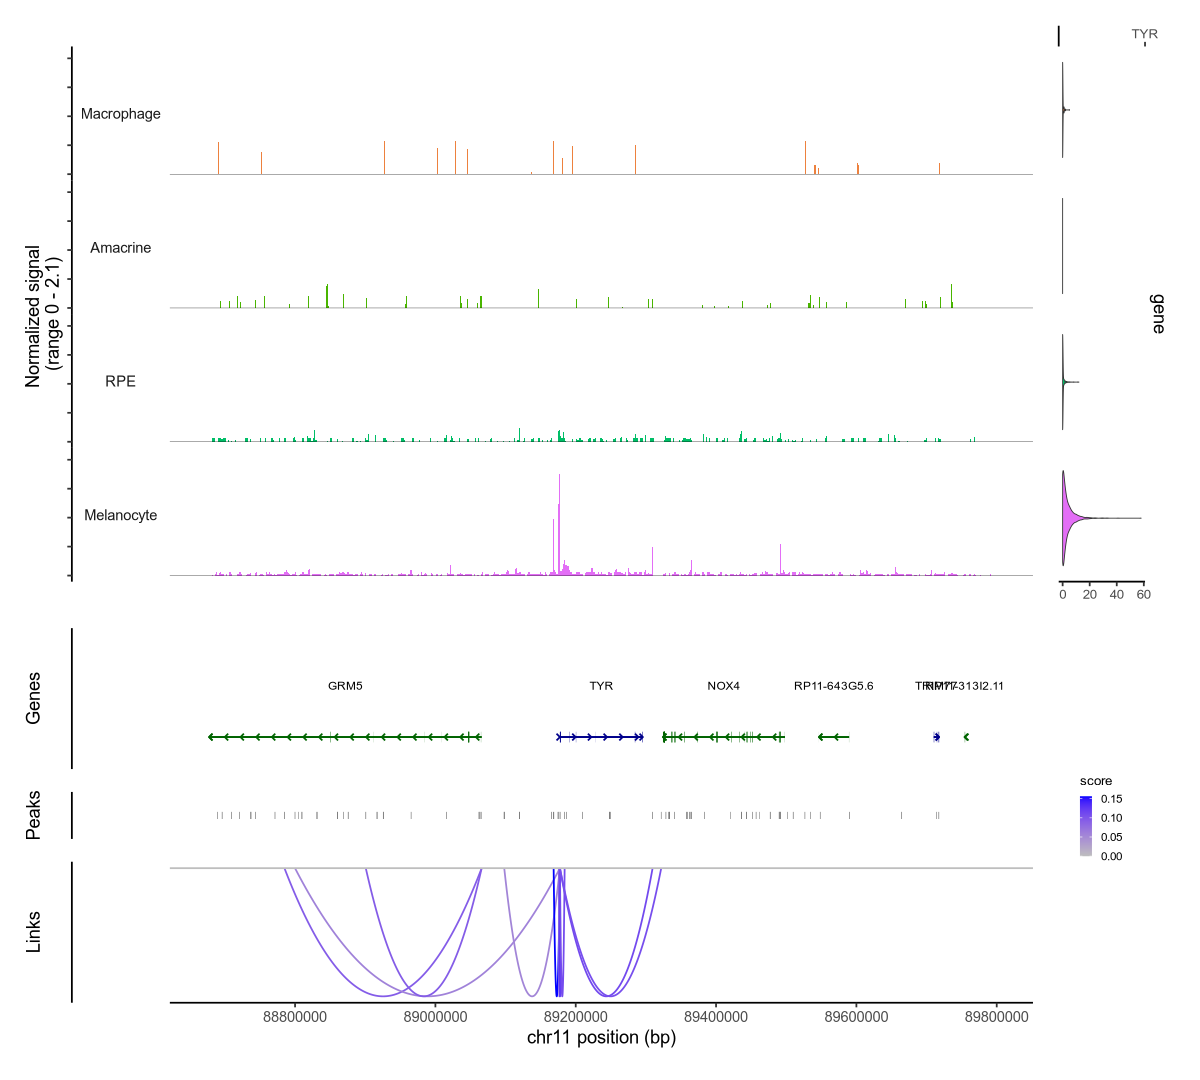

In [964]:
idents.plot <- c('RPE', 'Melanocyte', 'Macrophage', "Amacrine")

p3 <- CoveragePlot(
  object = all_atac,
  region= 'TYR',
  features = "TYR",
  expression.assay = "RNA",
  idents = idents.plot,
  extend.upstream = 500000,
  extend.downstream =500000 , 
  #region.highlight ='chr19-6509080-6510210'
)
p3

Warning message:
"Removed 54 rows containing missing values or values outside the scale range
(`geom_segment()`)."


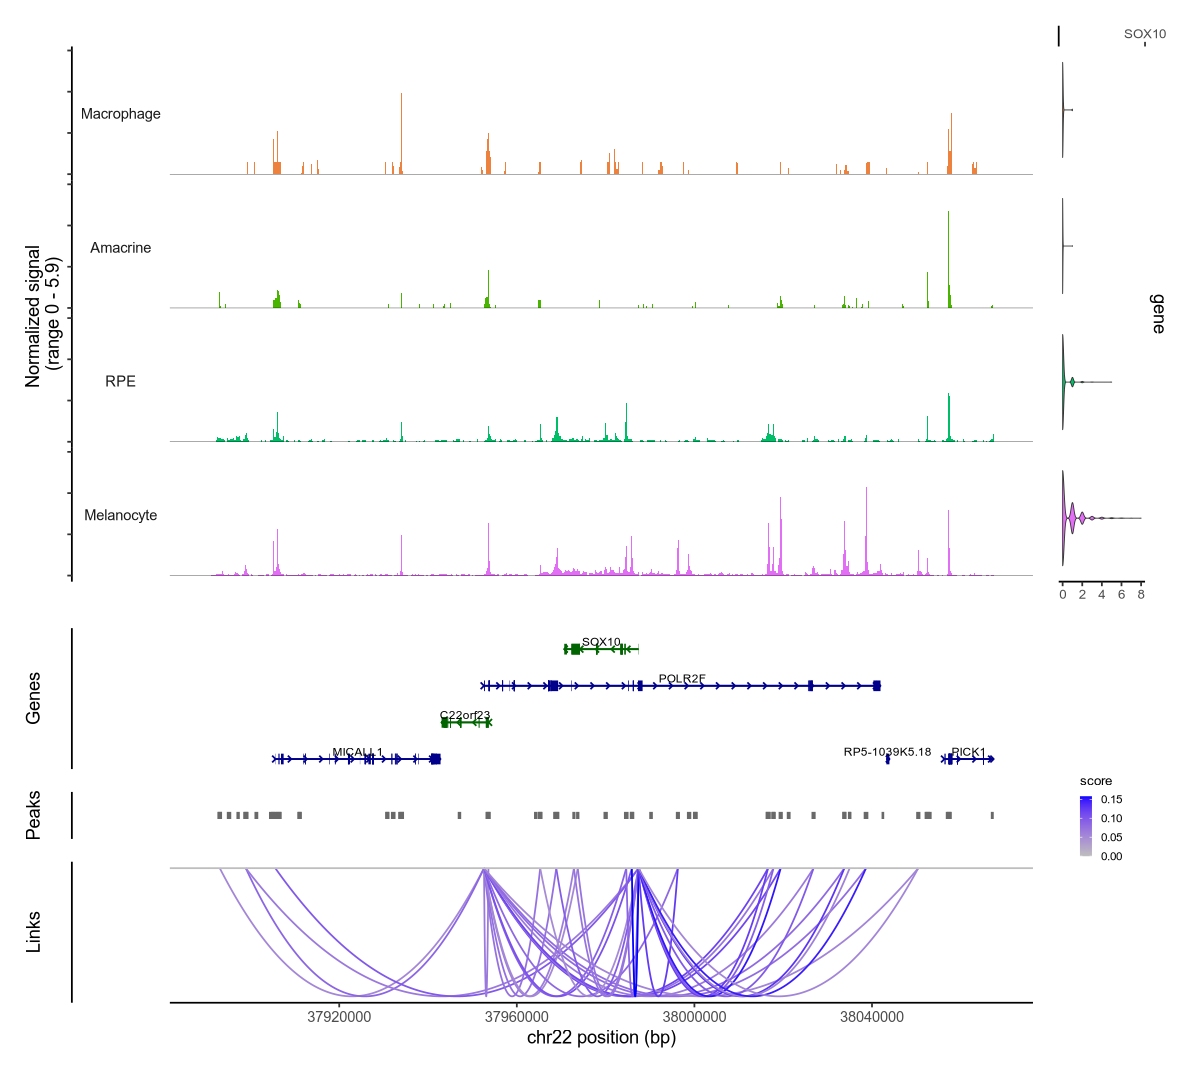

In [974]:
idents.plot <- c('RPE', 'Melanocyte', 'Macrophage', "Amacrine")

p3 <- CoveragePlot(
  object = all_atac,
  region= 'SOX10',
  features = "SOX10",
  expression.assay = "RNA",
  idents = idents.plot,
  extend.upstream = 80000,
  extend.downstream =80000 , 
  #region.highlight ='chr19-6509080-6510210'
)
p3

In [ ]:
library(svglite)


p=p3 #whatever plot

svglite(filename = paste0('figures/links.svg'), # put your path and name of choice
            width = 5,height = 5,standalone = T,system_fonts = 'Arial',bg = 'transparent',scaling=0.6)    # here you define which font and size of pliot
plot(p) # plot your plot in the graphic device
dev.off() # close the graphic device and it saves your figure :-)

Warning message:
"Removed 70 rows containing missing values or values outside the scale range
(`geom_segment()`)."


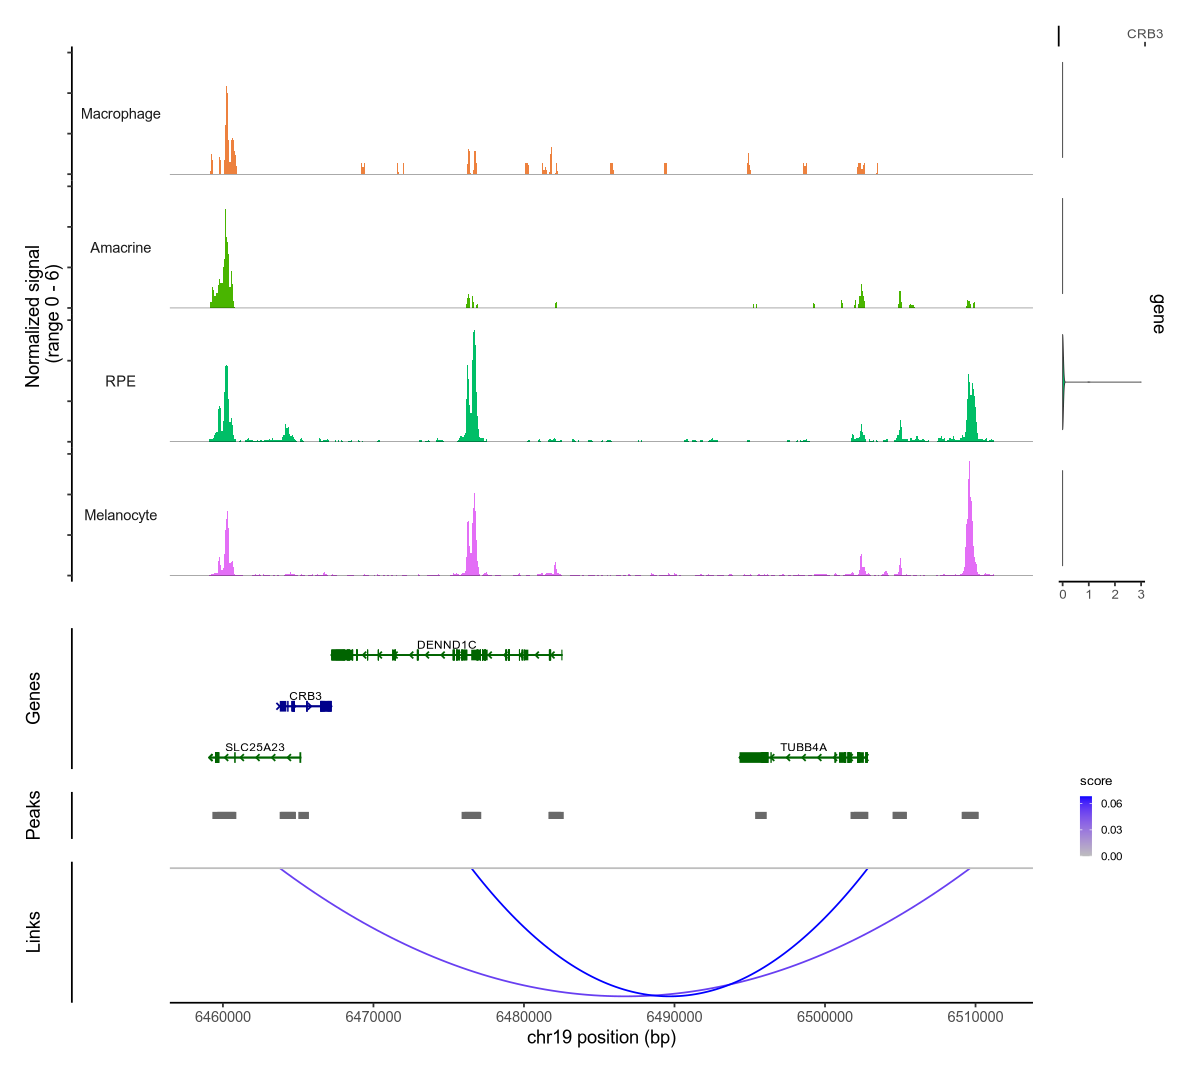

In [955]:
idents.plot <- c('RPE', 'Melanocyte', 'Macrophage', "Amacrine")

p3 <- CoveragePlot(
  object = all_atac,
  region= 'chr19-6509080-6510210',
  features = "CRB3",
  expression.assay = "RNA",
  idents = idents.plot,
  extend.upstream = 50000,
  extend.downstream =1000 , 
  #region.highlight ='chr19-6509080-6510210'
)
p3

Warning message:
"Removed 2 rows containing missing values or values outside the scale range
(`geom_segment()`)."


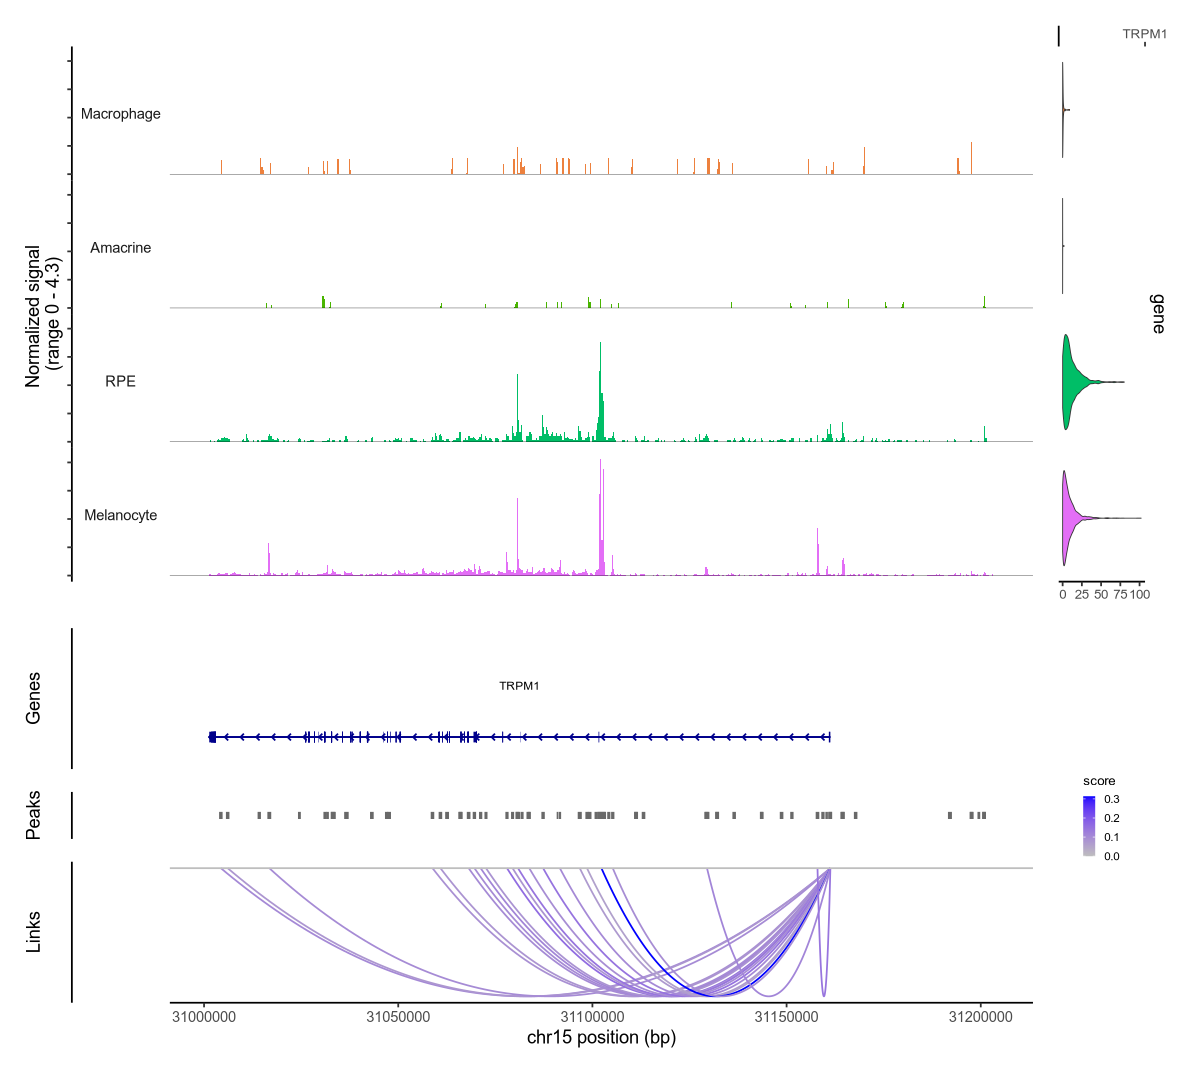

In [937]:
idents.plot <- c('RPE', 'Melanocyte', 'Macrophage', "Amacrine")

p3 <- CoveragePlot(
  object = all_atac,
  region= 'chr15-31101293-31103342',
  features = "TRPM1",
  expression.assay = "RNA",
  idents = idents.plot,
  extend.upstream = 100000,
  extend.downstream =100000 , 
  #region.highlight ='chr19-6509080-6510210'
)
p3

Warning message:
"Removed 25 rows containing missing values or values outside the scale range
(`geom_segment()`)."


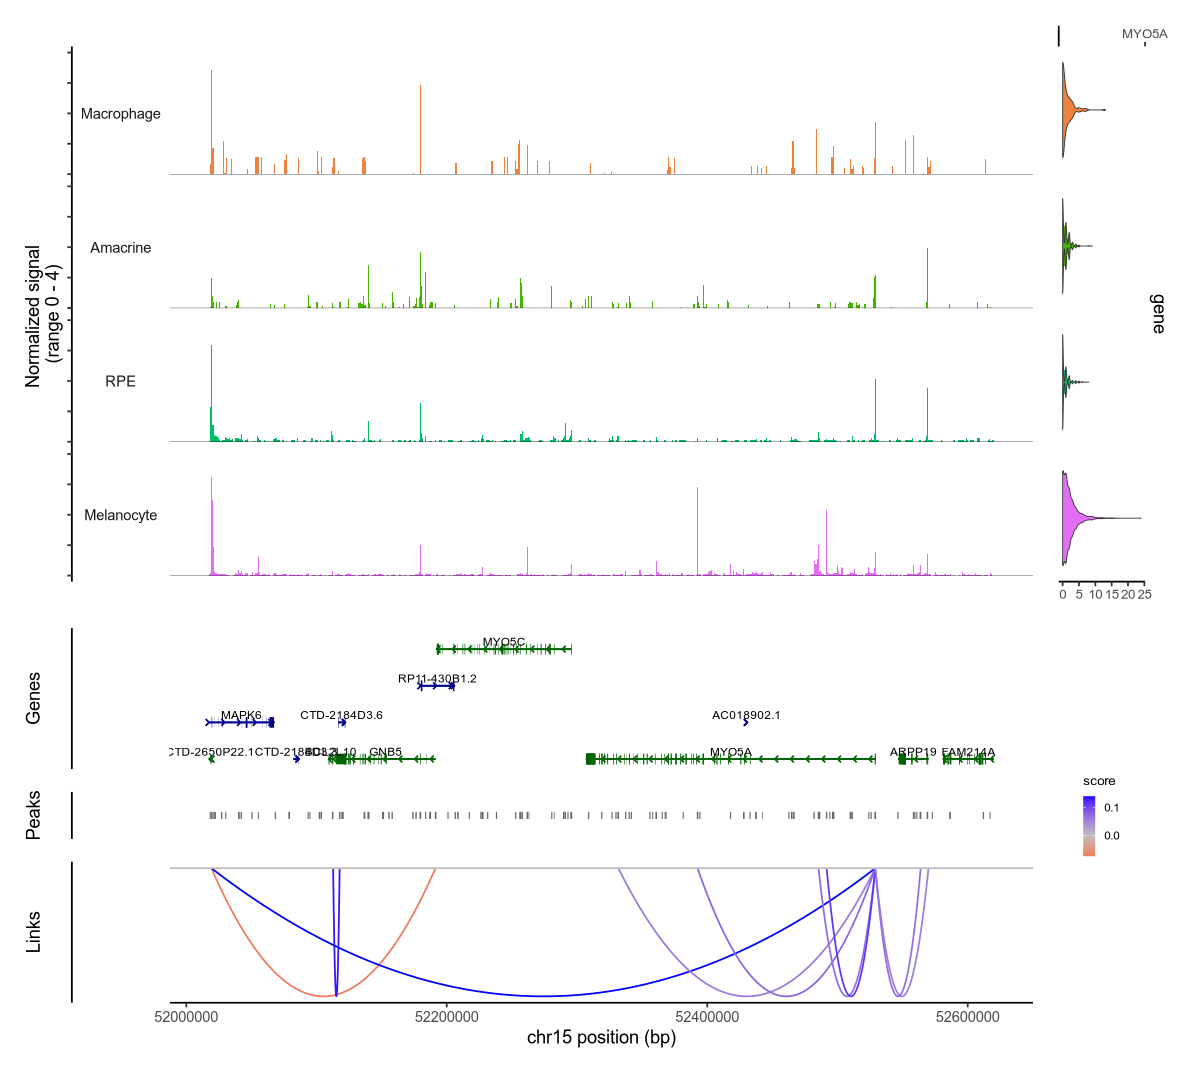

In [914]:
idents.plot <- c('RPE', 'Melanocyte', 'Macrophage', "Amacrine")

p3 <- CoveragePlot(
  object = all_atac,
  region= 'chr15-52018520-52019990',
  features = "MYO5A",
  expression.assay = "RNA",
  idents = idents.plot,
  extend.upstream = 1000,
  extend.downstream = 600000, 
  #region.highlight ='chr19-6509080-6510210'
)
p3

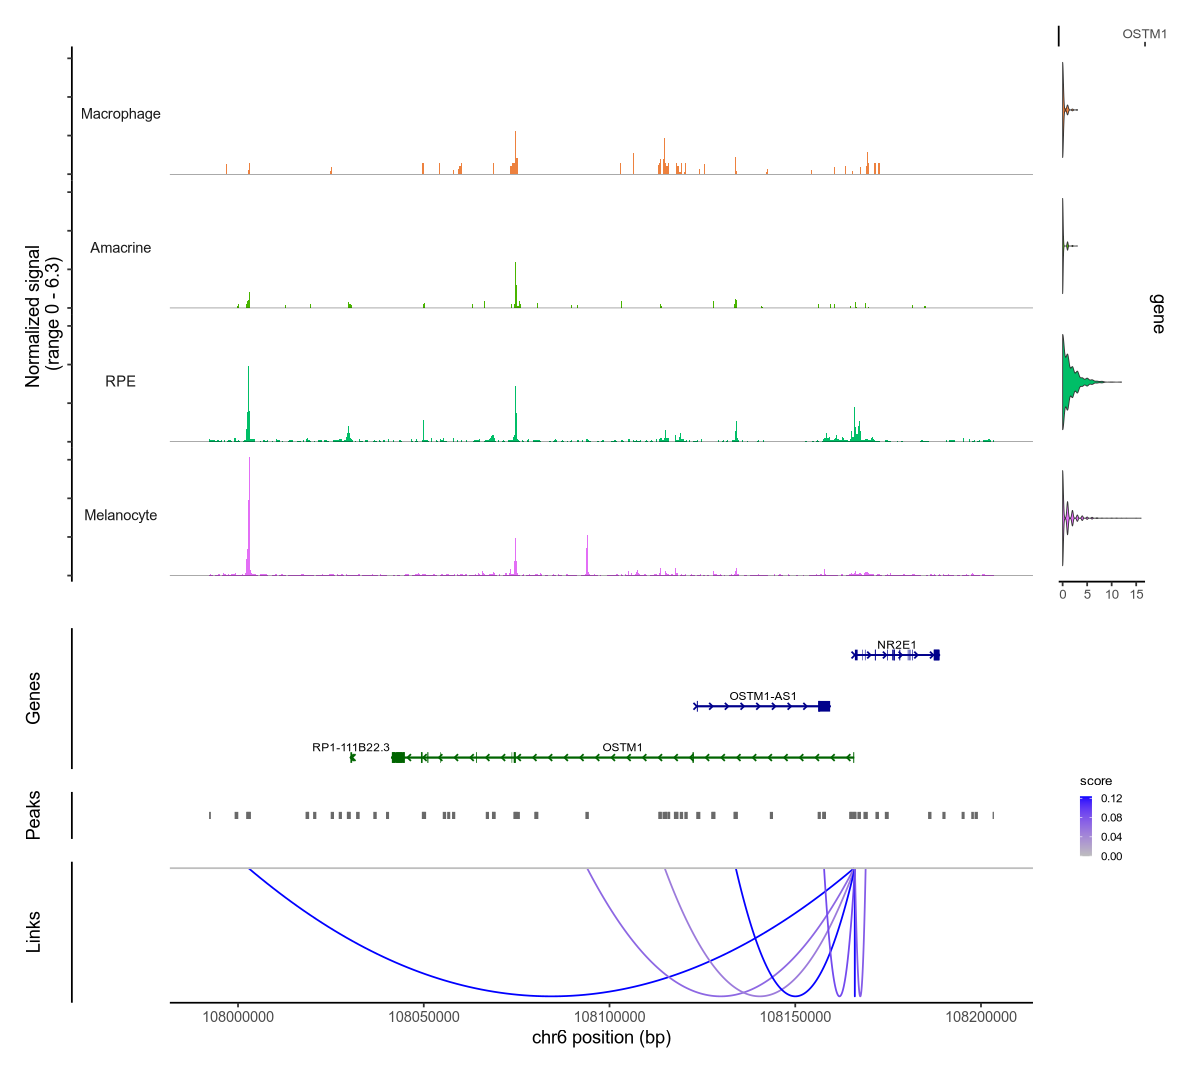

In [938]:
idents.plot <- c('RPE', 'Melanocyte', 'Macrophage', "Amacrine")

p3 <- CoveragePlot(
  object = all_atac,
  region= 'chr6-108002208-108003434',
  features = "OSTM1",
  expression.assay = "RNA",
  idents = idents.plot,
  extend.upstream = 10000,
  extend.downstream = 200000, 
  #region.highlight ='chr19-6509080-6510210'
)
p3

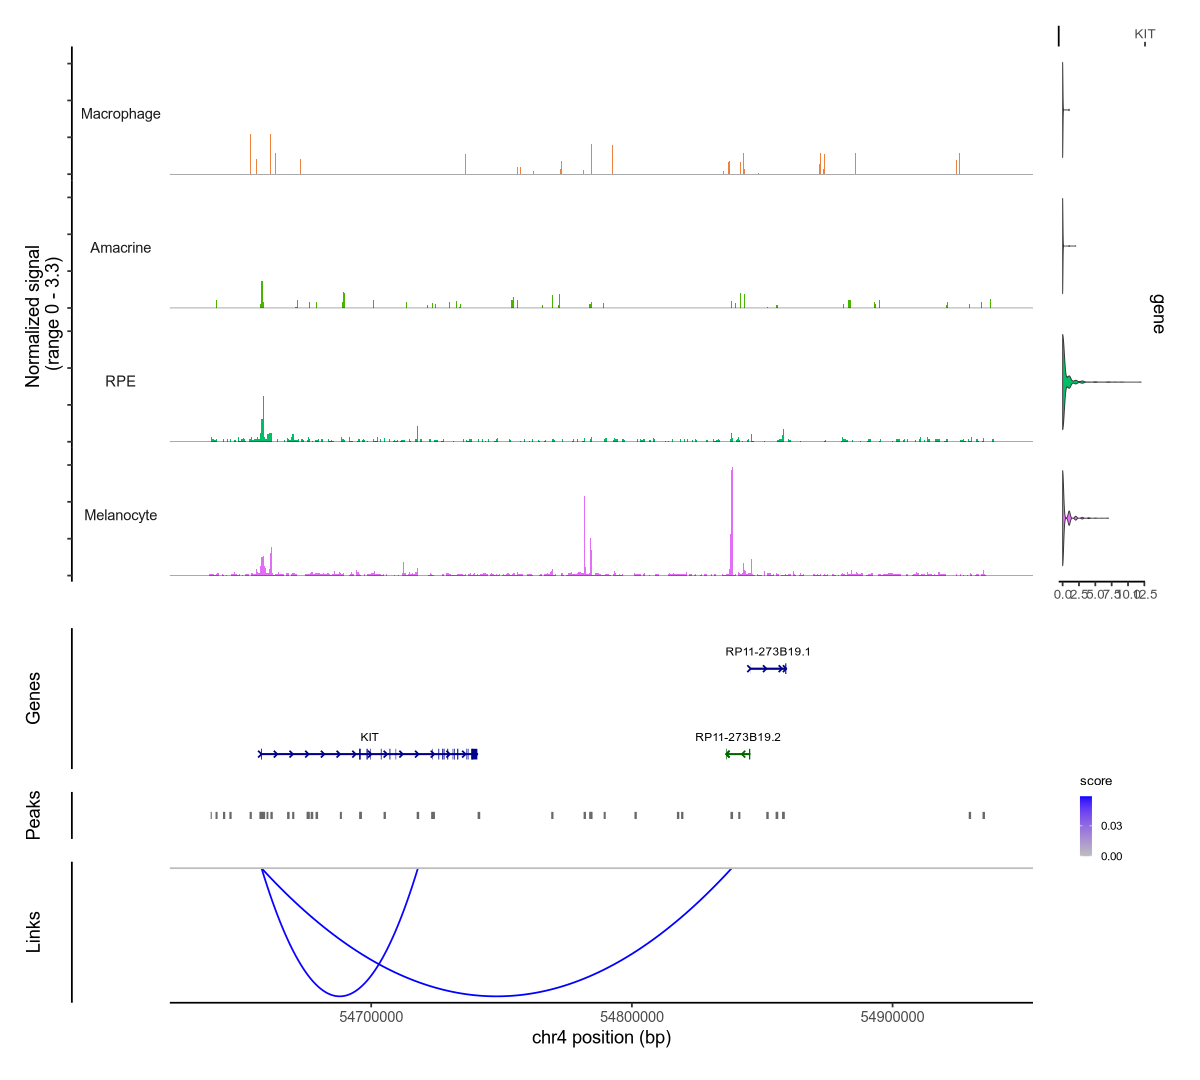

In [854]:
idents.plot <- c('RPE', 'Melanocyte', 'Macrophage', "Amacrine")

p2 <- CoveragePlot(
  object = all_atac,
  region= 'chr4-54837807-54838808',
  features = "KIT",
  expression.assay = "RNA",
  idents = idents.plot,
  extend.upstream = 200000,
  extend.downstream = 100000, 
  #region.highlight ='chr19-6509080-6510210'
)
p2

## volcano plot of shared differntially accesible chromatin

In [464]:
da_peak

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
chr4-139858096-139859254   0.000000e+00 6.013857   0.134 0.002  0.000000e+00
chr5-65535142-65536305     0.000000e+00 5.745702   0.120 0.002  0.000000e+00
chr1-165467352-165468626   0.000000e+00 5.593416   0.130 0.003  0.000000e+00
chr7-99357843-99359048     0.000000e+00 5.566672   0.156 0.003  0.000000e+00
chr13-110092590-110093550  0.000000e+00 5.553425   0.167 0.004  0.000000e+00
chr11-88151570-88152610    0.000000e+00 5.369549   0.130 0.003  0.000000e+00
chr6-113823948-113824973   0.000000e+00 5.295742   0.134 0.003  0.000000e+00
chr8-129315937-129317064   0.000000e+00 5.238177   0.135 0.004  0.000000e+00
chr11-57874588-57875673    0.000000e+00 5.141639   0.131 0.004  0.000000e+00
chr5-160458667-160459827   0.000000e+00 5.016256   0.135 0.003  0.000000e+00
chr2-95333320-95334703     0.000000e+00 4.699622   0.140 0.005  0.000000e+00
chr13-94478731-94480357    0.000000e+00 4.646095   0.131 0.004  0.000000e+00
chr8-20253296-20255534     0.000000e+00 4.596344   0.127 0.004  0.000000e+00
chr17-68380871-68381900    0.000000e+00 4.559636   0.136 0.006  0.000000e+00
chr17-81384850-81386229    0.000000e+00 4.537863   0.152 0.005  0.000000e+00
chr2-222290268-222291997   0.000000e+00 4.513837   0.154 0.005  0.000000e+00
chr10-29555704-29556704    0.000000e+00 4.381201   0.135 0.006  0.000000e+00
chr6-109793580-109794840   0.000000e+00 4.342197   0.162 0.006  0.000000e+00
chr8-129551733-129552723   0.000000e+00 4.312351   0.162 0.006  0.000000e+00
chr1-9441249-9442401       0.000000e+00 4.311268   0.151 0.006  0.000000e+00
chr15-79978207-79979328    0.000000e+00 4.176649   0.157 0.007  0.000000e+00
chr6-108002208-108003434   0.000000e+00 3.922313   0.199 0.009  0.000000e+00
chr15-31100550-31103515    0.000000e+00 3.514463   0.247 0.012  0.000000e+00
chr12-58893216-58894582    0.000000e+00 3.326867   0.236 0.022  0.000000e+00
chr19-1168564-1170985      0.000000e+00 3.289469   0.164 0.012  0.000000e+00
chr3-112293081-112294394   0.000000e+00 3.228242   0.170 0.013  0.000000e+00
chr4-54837807-54838808    1.444455e-305 5.377073   0.120 0.003 4.953760e-301
chr3-45612753-45613822    1.240767e-304 4.630206   0.126 0.004 4.255212e-300
chr2-121567755-121568712  1.745563e-301 5.241213   0.120 0.003 5.986409e-297
chr11-16147858-16148975   2.447495e-297 4.726236   0.121 0.004 8.393686e-293
⋮                         ⋮             ⋮          ⋮     ⋮     ⋮            
chr8-38176036-38177227    0.9436689     -0.1412196 0.102 0.098 1            
chr16-29898727-29900990   0.9446998     -0.1034868 0.105 0.102 1            
chr11-46700046-46701289   0.9470579     -0.1028163 0.109 0.106 1            
chr4-2755714-2756970      0.9474588     -0.1125820 0.111 0.108 1            
chr3-57692393-57693513    0.9477356     -0.1459652 0.102 0.099 1            
chr4-169009539-169010802  0.9487626     -0.1421640 0.111 0.107 1            
chr22-31107162-31108493   0.9535200     -0.1028040 0.135 0.132 1            
chr10-89701002-89702089   0.9576858     -0.1284951 0.105 0.102 1            
chr9-124770788-124771977  0.9608009     -0.1161207 0.135 0.130 1            
chr2-24971369-24972489    0.9660137     -0.1257358 0.159 0.152 1            
chr8-125428991-125430846  0.9662199     -0.1421165 0.224 0.208 1            
chr3-119702348-119703444  0.9665465     -0.1359350 0.118 0.114 1            
chr15-101276801-101278257 0.9698486     -0.1038488 0.118 0.115 1            
chr8-141000679-141001894  0.9710317     -0.1137377 0.113 0.110 1            
chr4-76213166-76214363    0.9755084     -0.1542263 0.120 0.115 1            
chr17-7840911-7843214     0.9760659     -0.1287366 0.197 0.184 1            
chr22-46149168-46152183   0.9802906     -0.1053815 0.200 0.192 1            
chr8-43139867-43141128    0.9813291     -0.1598002 0.126 0.122 1            
chr9-127784899-127786313  0.9815903     -0.1645545 0.128 0.123 1            
chr19-49817088-49818953   0.9839586     -0.3335415 0.147 0.137 1            
chr14-73758911-7376101

In [471]:
da_peak_orig=da_peak

In [479]:
# Add a column to the data frame to specify if they are UP- or DOWN- regulated (log2fc respectively positive or negative)<br /><br /><br />
da_peak$diffexpressed <- "NO"
# if log2Foldchange > 0.6 and pvalue < 0.05, set as "UP"<br /><br /><br />
da_peak$diffexpressed[da_peak$avg_log2FC > 2 & da_peak$p_val_adj < 0.05] <- "UP"
# if log2Foldchange < -0.6 and pvalue < 0.05, set as "DOWN"<br /><br /><br />
da_peak$diffexpressed[da_peak$avg_log2FC < -2 & da_peak$p_val_adj < 0.05] <- "DOWN"
# Explore a bit<br /><br /><br />
head(da_peak[order(da_peak$p_val_adj) & da_peak$diffexpressed == 'DOWN', ])


p_val         avg_log2FC pct.1 pct.2 p_val_adj   
chr5-88659441-88661694   4.657833e-100 -2.890279  0.017 0.152 1.597404e-95
chr7-129778418-129782588  2.512237e-80 -2.254741  0.021 0.137 8.615718e-76
chr3-50190716-50193949    4.463422e-67 -2.517138  0.013 0.108 1.530731e-62
chr6-83708239-83709686    3.257372e-66 -2.773982  0.012 0.104 1.117116e-61
chr8-144331485-144332841  1.815899e-64 -2.367146  0.015 0.108 6.227627e-60
                         diffexpressed
chr5-88659441-88661694   DOWN         
chr7-129778418-129782588 DOWN         
chr3-50190716-50193949   DOWN         
chr6-83708239-83709686   DOWN         
chr8-144331485-144332841 DOWN

In [480]:
head(da_peak[order(da_peak$p_val_adj) & da_peak$diffexpressed == 'UP', ])

p_val avg_log2FC pct.1 pct.2 p_val_adj diffexpressed
chr4-139858096-139859254  0     6.013857   0.134 0.002 0         UP           
chr5-65535142-65536305    0     5.745702   0.120 0.002 0         UP           
chr1-165467352-165468626  0     5.593416   0.130 0.003 0         UP           
chr7-99357843-99359048    0     5.566672   0.156 0.003 0         UP           
chr13-110092590-110093550 0     5.553425   0.167 0.004 0         UP           
chr11-88151570-88152610   0     5.369549   0.130 0.003 0         UP

In [497]:
da_peak$coords<- rownames(da_peak)
head(da_peak)

p_val avg_log2FC pct.1 pct.2 p_val_adj diffexpressed
chr4-139858096-139859254  0     6.013857   0.134 0.002 0         UP           
chr5-65535142-65536305    0     5.745702   0.120 0.002 0         UP           
chr1-165467352-165468626  0     5.593416   0.130 0.003 0         UP           
chr7-99357843-99359048    0     5.566672   0.156 0.003 0         UP           
chr13-110092590-110093550 0     5.553425   0.167 0.004 0         UP           
chr11-88151570-88152610   0     5.369549   0.130 0.003 0         UP           
                          coords                   
chr4-139858096-139859254  chr4-139858096-139859254 
chr5-65535142-65536305    chr5-65535142-65536305   
chr1-165467352-165468626  chr1-165467352-165468626 
chr7-99357843-99359048    chr7-99357843-99359048   
chr13-110092590-110093550 chr13-110092590-110093550
chr11-88151570-88152610   chr11-88151570-88152610

In [526]:
da_peak$coords<- rownames(da_peak)
# Create a new column "delabel" to de, that will contain the name of the top 30 differentially expressed genes (NA in case they are not)
da_peak$delabel <- ifelse(da_peak$coords %in% head(da_peak[order(da_peak$p_val_adj), "coords"], 10), da_peak$coords, NA)


In [589]:
unique(da_peak$diffexpressed)

[1] "UP"   "NO"   "DOWN"

In [590]:
set.seed(123)  # Set seed for reproducibility

# Identify differentially expressed genes (e.g., upregulated or downregulated)
diff_genes <- da_peak$coords[da_peak$diffexpressed != "NO"]

# Randomly select 10 differentially expressed genes
random_genes <- sample(diff_genes, min(10, length(diff_genes)), replace = FALSE)

# Assign labels to selected genes, others get NA
da_peak$delabel <- ifelse(da_peak$coords %in% random_genes, da_peak$coords, NA)


Warning message:
"Removed 4616 rows containing missing values or values outside the scale range
(`geom_text_repel()`)."


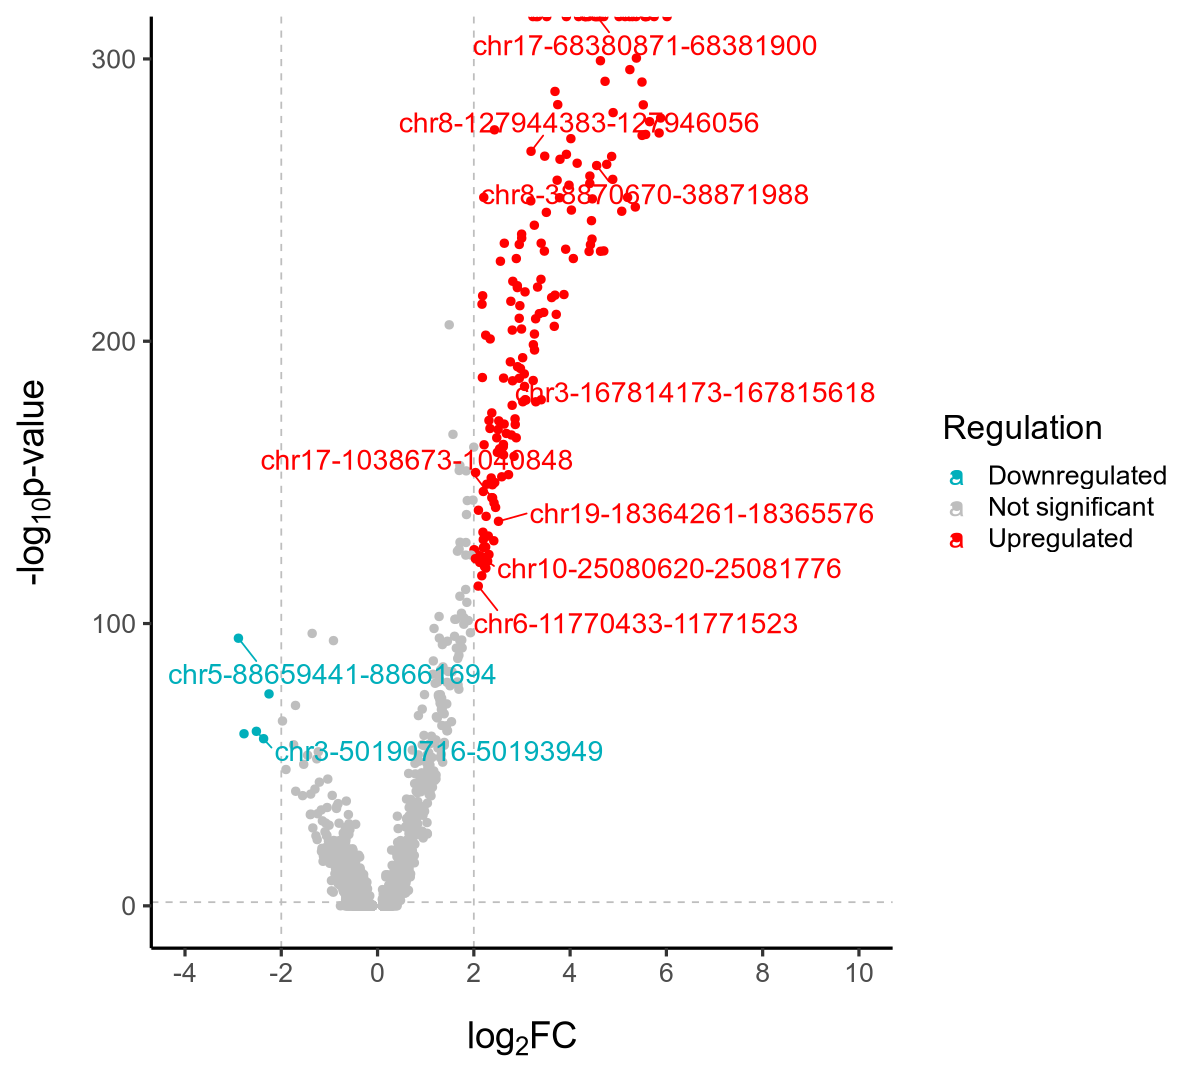

In [607]:
g <- ggplot(data = da_peak, aes(x = avg_log2FC, y = -log10(p_val_adj), col = diffexpressed, label = delabel)) +
  geom_vline(xintercept = c(-2, 2), col = "gray", linetype = 'dashed') +
  geom_hline(yintercept = -log10(0.05), col = "gray", linetype = 'dashed') +
  geom_point(size = 2) +
  scale_color_manual(values = c("#00AFBB", "grey", "Red"), # to set the colours of our variable
                     labels = c("Downregulated", "Not significant", "Upregulated")) +
  coord_cartesian(ylim = c(0, 300), xlim = c(-4, 10)) + # since some genes can have minuslog10padj of inf, we set these limits
  labs(color = 'Regulation', #legend_title, 
       x = expression("log"[2]*"FC"), y = expression("-log"[10]*"p-value")) + 
  scale_x_continuous(breaks = seq(-10, 10, 2)) + # to customise the breaks in the x axis
  # to set the labels in case we want to overwrite the categories from the dataframe (UP, DOWN, NO)# Plot title 
  geom_text_repel(max.overlaps = Inf, nudge_x = 0.5, min.segment.length = 0.5, box.padding = 0.7, force=10, force_pull=0.5, size=6)
g

In [600]:
library(svglite)


p=g #whatever plot

svglite(filename = paste0('figures/volcano_DARs.svg'), # put your path and name of choice
            width = 5,height = 4,standalone = T,system_fonts = 'Arial',bg = 'transparent',scaling=0.6)    # here you define which font and size of pliot
plot(p) # plot your plot in the graphic device
dev.off() # close the graphic device and it saves your figure :-)

Warning message:
"Removed 4616 rows containing missing values or values outside the scale range
(`geom_text_repel()`)."


pdf 
  2